# $\color{darkblue}{\text{Kalender, Smiley, Årstall, Måned og Ukenummer}}$

In [ ]:
# Install necessary library https://www.webfx.com/tools/emoji-cheat-sheet/
!pip install emoji

# Import necessary libraries
import emoji
import unicodedata

# Function to get flag emoji using unicodedata
def get_flag_emoji(country_code):
    return ''.join([unicodedata.lookup(f'REGIONAL INDICATOR SYMBOL LETTER {char}') for char in country_code.upper()])

# Get Norwegian flag emoji
norwegian_flag = get_flag_emoji('NO')
print(norwegian_flag)  # 🇳🇴

# Use emoji library to emojize text
result = emoji.emojize(f'Python er helt konge :grinning_face:, :grinning_face_with_smiling_eyes:, {norwegian_flag}')
print(result)  # 'Python er helt konge 😀, 😁, 🇳🇴'

# Use emoji library to demojize text
result = emoji.demojize('Python er👍')
print(result)  # 'Python er :thumbs_up:'

In [ ]:
import calendar
from datetime import date

def display_calendar():
    year = int(input("Skriv år: "))
    month = int(input("Skriv måned (1-12): "))

    cal = calendar.TextCalendar(calendar.MONDAY)
    
    # Print the month calendar
    month_calendar = cal.formatmonth(year, month)
    print(month_calendar)

    # Print week numbers
    print("Ukenumre:")
    month_weeks = cal.monthdayscalendar(year, month)
    for week in month_weeks:
        # Find the first day of the week that is not 0 (which means no day)
        first_day = next((day for day in week if day != 0), None)
        if first_day:
            week_number = date(year, month, first_day).isocalendar()[1]
            print(f"Uke {week_number}: {week}")

display_calendar()

# $\color{red}{\text{Kapittel 1 - Prosent, brøk og grunnleggende regning}}$

In [ ]:
#1 Grunnleggende regning
# Addisjon, subtraksjon, multiplikasjon og divisjon

# Addisjon
addition_1 = 70 + 50
addition_2 = 700 + 500

# Subtraksjon
subtraction_1 = 120 - 50
subtraction_2 = 1200 - 500

# Multiplikasjon
multiplication_1 = 42.35 * 10
multiplication_2 = 348 * 1000

# Divisjon
division_1 = 225 / 100
division_2 = 7.75 / 1000

# Utskrift av resultatene
print(f"70 kr + 50 kr = {addition_1:.0f} kr")
print(f"700 kr + 500 kr = {addition_2:.0f} kr")
print(f"120 kr - 50 kr = {subtraction_1:.0f} kr")
print(f"1200 kr - 500 kr = {subtraction_2:.0f} kr")
print(f"42.35 * 10 = {multiplication_1:.1f}")
print(f"348 * 1000 = {multiplication_2:.0f}")
print(f"225 / 100 = {division_1:.2f}")
print(f"7.75 / 1000 = {division_2:.5f}")

In [ ]:
# 1 Grunnleggende regning: 1.5 Regne med brøk
import ipywidgets as widgets
from IPython.display import display, clear_output
from fractions import Fraction
import math
import re
import ast
import operator

# GUI-komponenter
num_terms = widgets.IntSlider(value=2, min=2, max=6, description="Antall ledd:")
confirm_button = widgets.Button(description="OK")
input_container = widgets.VBox()
calculate_button = widgets.Button(description="Beregn")
output = widgets.Output()

term_inputs = []
operator_inputs = []

# Evaluer komplekse uttrykk i brøker
def eval_expr(expr):
    expr = expr.replace('^', '**')
    expr = re.sub(r'√(\d+)', r'math.sqrt(\1)', expr)
    expr = expr.replace('sqrt', 'math.sqrt')

    ops = {
        ast.Add: operator.add,
        ast.Sub: operator.sub,
        ast.Mult: operator.mul,
        ast.Div: operator.truediv,
        ast.Pow: operator.pow,
        ast.USub: operator.neg
    }

    def _eval(node):
        if isinstance(node, ast.Expression):
            return _eval(node.body)
        elif isinstance(node, ast.BinOp):
            left = _eval(node.left)
            right = _eval(node.right)
            res = ops[type(node.op)](left, right)
            return Fraction(str(res)).limit_denominator(10**6)
        elif isinstance(node, ast.UnaryOp):
            operand = _eval(node.operand)
            return ops[type(node.op)](operand)
        elif isinstance(node, ast.Call):
            if isinstance(node.func, ast.Attribute) and node.func.attr == 'sqrt':
                val = math.sqrt(float(_eval(node.args[0])))
                return Fraction(str(val)).limit_denominator(10**6)
            else:
                raise TypeError("Ugyldig funksjon")
        elif isinstance(node, ast.Constant):
            return Fraction(str(node.value))
        elif isinstance(node, ast.Num):
            return Fraction(str(node.n))
        else:
            raise TypeError(f"Ugyldig uttrykk: {node}")

    parsed = ast.parse(expr, mode='eval')
    return _eval(parsed.body)

# Opprett felt for ledd
def create_inputs(_):
    global term_inputs, operator_inputs
    term_inputs = []
    operator_inputs = []
    children = []

    for idx in range(num_terms.value):
        term_type = widgets.Dropdown(options=["Heltall", "Desimaltall", "Brøk", "Kompleks brøk"], description=f"Ledd {idx+1}:")
        sign = widgets.Dropdown(options=['+', '-'], description="Fortegn:")

        int_input = widgets.IntText(description="Heltall")
        float_input = widgets.FloatText(description="Desimal")
        br_num = widgets.IntText(description="Teller")
        br_den = widgets.IntText(description="Nevner", value=1)
        k_num_expr = widgets.Text(description="Telleruttrykk")
        k_den_expr = widgets.Text(description="Nevneruttrykk")

        container = widgets.VBox()

        # Lager separat funksjon for å unngå referanseproblem
        def make_updater(container_ref, type_widget, sign_widget, i_widget, f_widget, bn_widget, bd_widget, kn_widget, kd_widget):
            def update_term_fields(change=None):
                if type_widget.value == "Heltall":
                    container_ref.children = [sign_widget, type_widget, i_widget]
                elif type_widget.value == "Desimaltall":
                    container_ref.children = [sign_widget, type_widget, f_widget]
                elif type_widget.value == "Brøk":
                    container_ref.children = [sign_widget, type_widget, bn_widget, bd_widget]
                elif type_widget.value == "Kompleks brøk":
                    container_ref.children = [sign_widget, type_widget, kn_widget, kd_widget]
            return update_term_fields

        updater = make_updater(container, term_type, sign, int_input, float_input, br_num, br_den, k_num_expr, k_den_expr)
        term_type.observe(updater, names="value")
        updater()

        term_inputs.append((sign, term_type, int_input, float_input, br_num, br_den, k_num_expr, k_den_expr))
        children.append(container)

        if idx < num_terms.value - 1:
            op = widgets.Dropdown(options=['+', '-', '*', '/'], description=f"Operator {idx+1}:")
            operator_inputs.append(op)
            children.append(op)

    children.append(calculate_button)
    children.append(output)
    input_container.children = children

# Konverter et ledd til Fraction
def to_fraction(sign, typ, i, f, bn, bd, kn_expr, kd_expr):
    if typ == "Heltall":
        val = Fraction(i)
    elif typ == "Desimaltall":
        val = Fraction(str(f)).limit_denominator()
    elif typ == "Brøk":
        if bd == 0:
            raise ZeroDivisionError("Nevner kan ikke være 0")
        val = Fraction(bn, bd)
    elif typ == "Kompleks brøk":
        teller = eval_expr(kn_expr)
        nevner = eval_expr(kd_expr)
        if nevner == 0:
            raise ZeroDivisionError("Nevner kan ikke være 0")
        val = teller / nevner
    else:
        raise ValueError(f"Ukjent type: {typ}")
    return val if sign == '+' else -val

# Kalkuler hele uttrykket
def calculate(_):
    with output:
        output.clear_output()
        try:
            sign, typ, i, f, bn, bd, kn_expr, kd_expr = term_inputs[0]
            result = to_fraction(sign.value, typ.value, i.value, f.value, bn.value, bd.value, kn_expr.value, kd_expr.value)
            expr_str = f"({result})"

            for idx, op_widget in enumerate(operator_inputs):
                op = op_widget.value
                sign, typ, i, f, bn, bd, kn_expr, kd_expr = term_inputs[idx + 1]
                next_val = to_fraction(sign.value, typ.value, i.value, f.value, bn.value, bd.value, kn_expr.value, kd_expr.value)
                expr_str += f" {op} ({next_val})"

                if op == '+':
                    result += next_val
                elif op == '-':
                    result -= next_val
                elif op == '*':
                    result *= next_val
                elif op == '/':
                    if next_val == 0:
                        raise ZeroDivisionError("Kan ikke dele på null")
                    result /= next_val

            desimal = round(float(result), 2)

            if abs(result.numerator) > result.denominator:
                heltall = result.numerator // result.denominator
                rest = abs(result.numerator) % result.denominator
                blandet = f"{heltall} {rest}/{result.denominator}" if rest else str(heltall)
            else:
                blandet = str(result)

            print(f"Uttrykk: {expr_str}")
            print(f"Forenklet brøk: {result}")
            print(f"Blandet tall: {blandet}")
            print(f"Desimaltall: {desimal}")

        except Exception as e:
            print(f"Feil: {e}")

# Koble knapper
confirm_button.on_click(create_inputs)
calculate_button.on_click(calculate)

# Startvisning
display(widgets.HBox([num_terms, confirm_button]))
display(input_container)

In [ ]:
# Omgjøringskalkulator mellom desimaltall, brøk og prosent
from decimal import Decimal, getcontext
from math import gcd

getcontext().prec = 10  # Sett presisjon for desimaler

def hovedmeny():
    print("Velkommen til omgjøringskalkulator mellom desimaltall, brøk og prosent ")
    print("Trykk 'q' når som helst for å avslutte programmet og trykk enter.\n")
    print("Hva vil du beregne?")
    print("1. Prosent til desimaltall og brøk")
    print("2. Brøk til desimaltall og prosent")
    print("3. Desimaltall til brøk og prosent")

def beregn_prosentandel(delen: float, hele: float) -> float:
    if hele == 0:
        raise ValueError("Hele kan ikke være null.")
    return (delen / hele) * 100

def decimal_to_fraction_and_percent(digits: str):
    try:
        n = Decimal(digits)
    except InvalidOperation:
        print("Ugyldig desimaltall.")
        return

    exponent = len(digits.split('.')[1]) if '.' in digits else 0
    numerator = int(n * 10**exponent)
    denominator = 10**exponent
    percent = float(n * 100)
    factor = gcd(numerator, denominator)
    num = numerator // factor
    den = denominator // factor

    print(f"Desimaltallet er {round(n, 3)}")
    print(f"Brøken er {num} / {den}")
    print(f"Prosenten er {round(percent, 3)}%\n")

def percent_to_decimal_and_fraction(percent: float):
    decimal = percent / 100
    digits = str(decimal)
    decimal_to_fraction_and_percent(digits)

def fraction_to_decimal_and_percent(numerator: int, denominator: int):
    if denominator == 0:
        print("Nevneren kan ikke være null.")
        return
    decimal = Decimal(numerator) / Decimal(denominator)
    percent = float(decimal * 100)

    print(f"Desimaltallet er {round(decimal, 3)}")
    print(f"Prosenten er {round(percent, 3)}%\n")

def main():
    while True:
        hovedmeny()
        choice = input("Velg et alternativ (1/2/3): ").strip().lower()
        if choice == 'q':
            print("Programmet avsluttes.")
            break
        elif choice == '1':
            percent = float(input("Skriv inn prosentverdien: "))
            percent_to_decimal_and_fraction(percent)
        elif choice == '2':
            numerator = int(input("Skriv inn telleren til brøken, altså det øverste tallet: "))
            denominator = int(input("Skriv inn nevneren til brøken, altså det nederste tallet: "))
            fraction_to_decimal_and_percent(numerator, denominator)
        elif choice == '3':
            digits = input("Skriv inn ett desimaltall, husk punktum, for å konvertere til brøk og prosent: ")
            decimal_to_fraction_and_percent(digits)
        else:
            print("Ugyldig valg. Vennligst prøv igjen.")
        
        restart = input("Vil du starte på nytt? (ja/nei): ").strip().lower()
        if restart == 'q':
            print("Programmet avsluttes.")
            break
        elif restart != 'ja':
            break

if __name__ == "__main__":
    main()

In [ ]:
# 1 Prosent: 1.1 Prosent og prosentdel
# Finn % av ett tall. Formel: p % av ett tall = p/100 * tallet
while True:
    user_input = input("Skriv inn prosent (eller 'q' for å avslutte): ")
    if user_input.lower() == 'q':
        print("Avslutter programmet.")
        break
    try:
        prosent = float(user_input)
        hele_tallet = float(input("Skriv inn hele tallet: "))
        prosentdelen = prosent / 100 * hele_tallet
        print(f"{prosent}% av {hele_tallet} er {round(prosentdelen, 2)}")
    except ValueError:
        print("Ugyldig input. Vennligst skriv inn tallverdier.")

In [ ]:
# Hvor mange prosent delen av ett tall er av det hele tallet er, feks 10 er ...% av 30
from dataclasses import dataclass

@dataclass
class Prosentandel:
    delen: float
    hele: float

    def beregn(self) -> float:
        if self.hele == 0:
            raise ValueError("Hele kan ikke være null.")
        return (self.delen / self.hele) * 100

def main():
    print("Velkommen til programmet som regner ut hvor mange prosent ett tall er av ett annet tall")
    print("Trykk 'q' når som helst for å avslutte programmet.\n")

    while True:
        delen_input = input("Skriv inn delen av tallet (eller 'q' for å avslutte): ").strip().lower()
        if delen_input == 'q':
            print("Programmet avsluttes.")
            break

        hele_input = input("Skriv inn det hele tallet (eller 'q' for å avslutte): ").strip().lower()
        if hele_input == 'q':
            print("Programmet avsluttes.")
            break

        try:
            delen = float(delen_input)
            hele = float(hele_input)
            prosentandel = Prosentandel(delen=delen, hele=hele)
            prosent = prosentandel.beregn()
            print(f"{prosentandel.delen} er {prosent:.2f}% av {prosentandel.hele}.")
        except ValueError as e:
            print(e)
        except Exception as e:
            print(f"Ugyldig input: {e}")

if __name__ == "__main__":
    main()

In [ ]:
# Regel 1. Del av tallet = (Hele tallet ∙ Prosenten) / 100
def beregn_hele_tallet(prosent, kroner):
    return kroner * 100 / prosent

def beregn_prosent(hele_tallet, kroner):
    return (kroner / hele_tallet) * 100

def beregn_del_av_tallet(hele_tallet, prosent):
    return hele_tallet * prosent / 100

def hovedprogram():
    print("Velkommen til kalkulatoren for: Del av tallet = (Hele tallet ∙ Prosenten) / 100")
    print("Trykk 'q' når som helst for å avslutte programmet og trykk enter.\n")
    print("Hva ønsker du å beregne?")
    
    print("1: Hele tallet")
    print("2: Prosent")
    print("3: Del av tallet")
    
    while True:
        valg = input("Skriv inn nummeret på det du ønsker å beregne (1, 2, eller 3): ")
        
        if valg.lower() == 'q':
            print("Avslutter programmet. Ha en fin dag!")
            break
        
        if valg == "1":
            try:
                prosent = float(input("Skriv inn prosentverdien: "))
                kroner = float(input("Skriv inn del av hele tallet: "))
                hele_tallet = beregn_hele_tallet(prosent, kroner)
                print(f"Hele tallet er: {hele_tallet:.2f}\n")
            except ValueError:
                print("Ugyldig input. Vennligst skriv inn gyldige tall.")
        
        elif valg == "2":
            try:
                hele_tallet = float(input("Skriv inn hele tallet: "))
                kroner = float(input("Skriv inn del av tallet: "))
                prosent = beregn_prosent(hele_tallet, kroner)
                print(f"Prosentverdien er: {prosent:.2f} %\n")
            except ValueError:
                print("Ugyldig input. Vennligst skriv inn gyldige tall.")
        
        elif valg == "3":
            try:
                hele_tallet = float(input("Skriv inn hele tallet: "))
                prosent = float(input("Skriv inn prosentverdien: "))
                del_av_tallet = beregn_del_av_tallet(hele_tallet, prosent)
                print(f"Del av tallet er: {del_av_tallet:.2f}\n")
            except ValueError:
                print("Ugyldig input. Vennligst skriv inn gyldige tall.")
        
        else:
            print("Ugyldig valg. Vennligst velg 1, 2, eller 3.")

# Kjør hovedprogrammet
hovedprogram()

In [ ]:
# Finn endringen i prosentpoeng mellom to tall
while True:
    user_input = input("Skriv inn startprosent (eller 'q' for å avslutte): ")
    if user_input.lower() == 'q':
        print("Avslutter programmet.")
        break
    try:
        startprosent = float(user_input)
        sluttprosent = float(input("Skriv inn sluttprosent: "))
        prosentpoeng = sluttprosent - startprosent
        prosent = prosentpoeng / startprosent * 100
        print(f"Endringen i prosentpoeng er: {round(prosentpoeng, 2)}")
        print(f"Endringen i prosent er: {round(prosent, 2)}%")
    except ValueError:
        print("Ugyldig input. Vennligst skriv inn tallverdier.")

In [ ]:
# Regel 2. Endringen i prosent = (Ny verdi – Opprinnelig verdi)/(Opprinnelig verdi) ∙ 100 %
def beregn_prosentendring(ny_verdi=None, opprinnelig_verdi=None, endring_i_prosent=None):
    try:
        if endring_i_prosent is not None and opprinnelig_verdi is not None:
            ny_verdi = opprinnelig_verdi * (1 + endring_i_prosent / 100)
            return ny_verdi
        elif ny_verdi is not None and opprinnelig_verdi is not None:
            endring_i_prosent = ((ny_verdi - opprinnelig_verdi) / opprinnelig_verdi) * 100
            return endring_i_prosent
        elif ny_verdi is not None and endring_i_prosent is not None:
            opprinnelig_verdi = ny_verdi / (1 + endring_i_prosent / 100)
            return opprinnelig_verdi
        else:
            return "Ugyldig input. Vennligst oppgi to av de tre verdiene."
    except ZeroDivisionError:
        return "Opprinnelig verdi kan ikke være null."
    except Exception as e:
        return f"En feil oppstod: {e}"

def hovedmeny():
    print("Velkommen til kalkulatoren for: Endringen i prosent = (Ny verdi – Opprinnelig verdi)/(Opprinnelig verdi) ∙ 100 %")
    print("Trykk 'q' når som helst for å avslutte programmet og trykk enter.\n")
    print("Hva vil du beregne?")
    
    print("1: Endringen i prosent")
    print("2: Ny verdi")
    print("3: Opprinnelig verdi")
    
    valg = input("Velg et alternativ (1, 2, 3): ")
    return valg
def hovedprogram():
    while True:
        valg = hovedmeny()
        
        if valg.lower() == 'q':
            print("Avslutter programmet. Ha en fin dag!")
            break
        
        if valg == "1":
            try:
                ny_verdi = float(input("Oppgi ny verdi: "))
                if ny_verdi == 'q':
                    print("Avslutter programmet. Ha en fin dag!")
                    break
                opprinnelig_verdi = float(input("Oppgi opprinnelig verdi: "))
                prosentendring = beregn_prosentendring(ny_verdi=ny_verdi, opprinnelig_verdi=opprinnelig_verdi)
                print(f"Endringen i prosent: {prosentendring:.2f} %\n")
            except ValueError:
                print("Ugyldig input. Vennligst skriv inn gyldige tall.")
        
        elif valg == "2":
            try:
                opprinnelig_verdi = float(input("Oppgi opprinnelig verdi: "))
                if opprinnelig_verdi == 'q':
                    print("Avslutter programmet. Ha en fin dag!")
                    break
                endring_i_prosent = float(input("Oppgi endringen i prosent: "))
                ny_verdi = beregn_prosentendring(opprinnelig_verdi=opprinnelig_verdi, endring_i_prosent=endring_i_prosent)
                print(f"Ny verdi: {ny_verdi:.2f}\n")
            except ValueError:
                print("Ugyldig input. Vennligst skriv inn gyldige tall.")
        
        elif valg == "3":
            try:
                ny_verdi = float(input("Oppgi ny verdi: "))
                if ny_verdi == 'q':
                    print("Avslutter programmet. Ha en fin dag!")
                    break
                endring_i_prosent = float(input("Oppgi endringen i prosent: "))
                opprinnelig_verdi = beregn_prosentendring(ny_verdi=ny_verdi, endring_i_prosent=endring_i_prosent)
                print(f"Opprinnelig verdi: {opprinnelig_verdi:.2f}\n")
            except ValueError:
                print("Ugyldig input. Vennligst skriv inn gyldige tall.")
        
        else:
            print("Ugyldig valg. Vennligst velg enten 1, 2 eller 3.")

if __name__ == "__main__":
    hovedprogram()

In [ ]:
# Regel 3.1 Vekstfaktor - Prosentvis økning. VF = 1 + Prosenten som desimaltall
def beregn_vekstfaktor(prosent):
    """
    Beregner vekstfaktoren basert på en prosentvis økning.
    
    Args:
    prosent (float): Prosentvis økning
    
    Returns:
    float: Vekstfaktoren
    """
    return 1 + prosent / 100

def main():
    print("Dette programmet regner ut vekstfaktoren ved en økning på en bestemt prosent.")
    try:
        prosent = float(input("Skriv inn denne prosenten: "))
        vekstfaktor = beregn_vekstfaktor(prosent)
        print(f"Vekstfaktoren ved en økning på {prosent:.2f} % er {vekstfaktor:.2f}.")
    except ValueError:
        print("Vennligst skriv inn et gyldig tall for prosenten.")

if __name__ == "__main__":
    main()

Vekstfaktoren ved en økning på 34.0 % er 1.34.


In [ ]:
# Regel 3.2 Vekstfaktor - Prosentvis nedgang. VF = 1 - Prosenten som desimaltall
def beregn_nedgangsfaktor(prosent):
    """
    Beregner vekstfaktoren basert på en prosentvis nedgang.
    
    Args:
    prosent (float): Prosentvis nedgang
    
    Returns:
    float: Nedgangsfaktoren, avrundet til tre desimaler
    """
    nedgangsfaktor = 1 - prosent / 100
    return round(nedgangsfaktor, 3)

def main():
    print("Dette programmet regner ut vekstfaktoren ved en nedgang på en bestemt prosent.")
    try:
        prosent = float(input("Skriv inn denne prosenten: "))
        nedgangsfaktor = beregn_nedgangsfaktor(prosent)
        print(f"Vekstfaktoren ved en nedgang på {prosent:.2f} prosent er {nedgangsfaktor:.2f}.")
    except ValueError:
        print("Vennligst skriv inn et gyldig tall for prosenten.")

if __name__ == "__main__":
    main()

Vekstfaktoren ved en nedgang på 23.0 prosent er 0.77.


In [ ]:
# Regel 3. Ny verdi = Opprinnelig verdi * Vekstfaktor
import sys  # for exit() hvis ønskelig

def beregn_verdi(opprinnelig_verdi=None, vekstfaktor=None, ny_verdi=None):
    if opprinnelig_verdi is not None and vekstfaktor is not None:
        return opprinnelig_verdi * vekstfaktor
    elif ny_verdi is not None and vekstfaktor is not None:
        return ny_verdi / vekstfaktor
    elif ny_verdi is not None and opprinnelig_verdi is not None:
        return ny_verdi / opprinnelig_verdi
    else:
        return None

def få_input(prompt):
    verdi_input = input(prompt)
    if verdi_input.strip().lower() == 'q':
        print("Programmet avsluttes.")
        return None
    try:
        return float(verdi_input)
    except ValueError:
        print("Ugyldig tall. Prøv igjen.")
        return få_input(prompt)

def hovedprogram():
    print("Velkommen til kalkulatoren for:  Ny verdi = Opprinnelig verdi * Vekstfaktor")
    print("Formel: Ny verdi = Opprinnelig verdi * Vekstfaktor")
    print("Skriv 'q' for å avslutte og trykk enter.\n")

    print("Hva vil du finne?")
    print("1: Ny verdi")
    print("2: Opprinnelig verdi")
    print("3: Vekstfaktor")

    valg = input("Skriv 1, 2 eller 3: ").strip()
    if valg.lower() == 'q':
        print("Programmet avsluttes.")
        return

    if valg == '1':
        opprinnelig_verdi = få_input("Oppgi opprinnelig verdi: ")
        if opprinnelig_verdi is None:
            return
        vekstfaktor = få_input("Oppgi vekstfaktor: ")
        if vekstfaktor is None:
            return
        ny_verdi = beregn_verdi(opprinnelig_verdi, vekstfaktor)
        print(f"\nNy verdi = {ny_verdi:.2f}")

    elif valg == '2':
        ny_verdi = få_input("Oppgi ny verdi: ")
        if ny_verdi is None:
            return
        vekstfaktor = få_input("Oppgi vekstfaktor: ")
        if vekstfaktor is None:
            return
        opprinnelig_verdi = beregn_verdi(None, vekstfaktor, ny_verdi)
        print(f"\nOpprinnelig verdi = {opprinnelig_verdi:.2f}")

    elif valg == '3':
        opprinnelig_verdi = få_input("Oppgi opprinnelig verdi: ")
        if opprinnelig_verdi is None:
            return
        ny_verdi = få_input("Oppgi ny verdi: ")
        if ny_verdi is None:
            return
        vekstfaktor = beregn_verdi(opprinnelig_verdi, None, ny_verdi)
        prosent_endring = (vekstfaktor - 1) * 100
        print(f"\nVekstfaktor = {vekstfaktor:.3f} ({prosent_endring:+.1f} % endring)")

    else:
        print("Ugyldig valg. Vennligst start programmet på nytt.")

if __name__ == "__main__":
    hovedprogram()

In [ ]:
#  Regel 4. Ny verdi = Opprinnelig verdi * Vekstfaktor^n hvor n er tiden + løsning av en ukjent i formelen = ett tall 
import math

def spør(prompt):
    svar = input(prompt)
    if svar.lower() == 'q':
        print("Du valgte å avslutte programmet.")
        return None
    return svar

def main():
    print("Dette programmet regner ut den nye verdien på et tall som skal øke eller minke med en viss prosent over tid.")
    print("Du kan skrive 'q' når som helst for å avslutte programmet.\n")

    svar = spør("Dersom tallet skal øke, skriv 'a'. Dersom tallet skal minke, skriv 'm': ")
    if svar is None:
        return
    svar = svar.lower()
    while svar not in ['a', 'm']:
        print("Du skrev inn verken 'a' eller 'm'.")
        svar = spør("Dersom tallet skal øke, skriv 'a'. Dersom tallet skal minke, skriv 'm': ")
        if svar is None:
            return
        svar = svar.lower()

    valg = spør("Vil du beregne ny verdi (n), gammel verdi (g), vekstfaktor (v), tid (t) eller løse for en ukjent verdi (x)? ")
    if valg is None:
        return
    valg = valg.lower()

    if valg == "n":
        beregn_ny_verdi(svar)
    elif valg == "g":
        beregn_gammel_verdi(svar)
    elif valg == "v":
        beregn_vekstfaktor(svar)
    elif valg == "t":
        beregn_tid(svar)
    elif valg == "x":
        løs_ukjent(svar)
    else:
        print("Ugyldig valg")

def beregn_ny_verdi(svar):
    tall = spør("Skriv inn den opprinnelige verdien: ")
    if tall is None: return
    prosent = spør("Skriv inn prosenten tallet skal endres med: ")
    if prosent is None: return
    tid = spør("Skriv inn tiden i antall år: ")
    if tid is None: return

    tall = float(tall)
    prosent = float(prosent)
    tid = float(tid)
    
    vekstfaktor = 1 + prosent / 100 if svar == "a" else 1 - prosent / 100
    ny_verdi = tall * (vekstfaktor ** tid)
    print(f"Den nye verdien etter {tid:.2f} år er {ny_verdi:.2f}")

def beregn_gammel_verdi(svar):
    ny_verdi = spør("Skriv inn den nye verdien: ")
    if ny_verdi is None: return
    prosent = spør("Skriv inn prosenten tallet skal endres med: ")
    if prosent is None: return
    tid = spør("Skriv inn tiden i antall år: ")
    if tid is None: return

    ny_verdi = float(ny_verdi)
    prosent = float(prosent)
    tid = float(tid)
    
    vekstfaktor = 1 + prosent / 100 if svar == "a" else 1 - prosent / 100
    gammel_verdi = ny_verdi / (vekstfaktor ** tid)
    print(f"Den opprinnelige verdien var {gammel_verdi:.2f}")

def beregn_vekstfaktor(svar):
    gammel_verdi = spør("Skriv inn den opprinnelige verdien: ")
    if gammel_verdi is None: return
    ny_verdi = spør("Skriv inn den nye verdien: ")
    if ny_verdi is None: return
    tid = spør("Skriv inn tiden i antall år: ")
    if tid is None: return

    gammel_verdi = float(gammel_verdi)
    ny_verdi = float(ny_verdi)
    tid = float(tid)
    
    vekstfaktor = (ny_verdi / gammel_verdi) ** (1 / tid)
    prosent = (vekstfaktor - 1) * 100 if svar == "a" else (1 - vekstfaktor) * 100
    print(f"Vekstfaktoren er {vekstfaktor:.4f}, som tilsvarer en prosentvis endring på {prosent:.2f}%")

def beregn_tid(svar):
    gammel_verdi = spør("Skriv inn den opprinnelige verdien: ")
    if gammel_verdi is None: return
    ny_verdi = spør("Skriv inn den nye verdien: ")
    if ny_verdi is None: return
    prosent = spør("Skriv inn prosenten tallet skal endres med: ")
    if prosent is None: return

    gammel_verdi = float(gammel_verdi)
    ny_verdi = float(ny_verdi)
    prosent = float(prosent)
    
    vekstfaktor = 1 + prosent / 100 if svar == "a" else 1 - prosent / 100
    tid = math.log(ny_verdi / gammel_verdi) / math.log(vekstfaktor)
    print(f"Tiden det tar for verdien å endres fra {gammel_verdi:.2f} til {ny_verdi:.2f} er {tid:.2f} år")

def løs_ukjent(svar):
    print("\nSkriv inn verdiene for tre av variablene. Skriv 'x' for den ukjente.")

    prosent_eller_vekst = spør("Vil du bruke prosent (p) eller vekstfaktor (v)? ")
    if prosent_eller_vekst is None:
        return
    prosent_eller_vekst = prosent_eller_vekst.lower()
    while prosent_eller_vekst not in ['p', 'v']:
        prosent_eller_vekst = spør("Ugyldig valg. Skriv 'p' for prosent eller 'v' for vekstfaktor: ")
        if prosent_eller_vekst is None:
            return
        prosent_eller_vekst = prosent_eller_vekst.lower()

    n_verdi = spør("Ny verdi: ")
    if n_verdi is None: return
    g_verdi = spør("Opprinnelig verdi: ")
    if g_verdi is None: return
    faktor_input = spør("Prosent/vekstfaktor: ")
    if faktor_input is None: return
    tid = spør("Tid (år): ")
    if tid is None: return

    try:
        if faktor_input.lower() == 'x':
            faktor_er_ukjent = True
        else:
            faktor_er_ukjent = False
            if prosent_eller_vekst == 'p':
                prosent = float(faktor_input)
                vekstfaktor = 1 + prosent / 100 if svar == 'a' else 1 - prosent / 100
            else:
                vekstfaktor = float(faktor_input)

        if n_verdi.lower() == 'x':
            g = float(g_verdi)
            t = float(tid)
            n = g * (vekstfaktor ** t)
            print(f"Ny verdi = {n:.2f}")
        elif g_verdi.lower() == 'x':
            n = float(n_verdi)
            t = float(tid)
            g = n / (vekstfaktor ** t)
            print(f"Opprinnelig verdi = {g:.2f}")
        elif faktor_er_ukjent:
            n = float(n_verdi)
            g = float(g_verdi)
            t = float(tid)
            vekstfaktor = (n / g) ** (1 / t)
            prosent = (vekstfaktor - 1) * 100 if svar == "a" else (1 - vekstfaktor) * 100
            print(f"Vekstfaktor = {vekstfaktor:.4f} (tilsvarer {prosent:.2f}% {'økning' if svar == 'a' else 'reduksjon'})")
        elif tid.lower() == 'x':
            n = float(n_verdi)
            g = float(g_verdi)
            t = math.log(n / g) / math.log(vekstfaktor)
            print(f"Tid = {t:.2f} år")
        else:
            print("Du må skrive 'x' for én av variablene.")
    except Exception as e:
        print(f"Det oppstod en feil: {e}")

# Start programmet
main()

# $\color{green}{\text{Kapittel 2 - Potenser og Røtter}}$

In [ ]:
# Funksjon for å konvertere et tall til standardform
def til_standardform(tall):
    return "{:.2e}".format(tall)

# Gitte verdier
a = 2.86e+09
b = 91
c = 10

# Beregn produktet
produkt = a * b

# Konverter produktet til standardform
standardform_produkt = til_standardform(produkt)

# Print resultatet og forklaringen
print(f"Produktet av {a} og {b} og {c} i standardform blir {standardform_produkt} kg ris iløpet av 10 år")
print('Notasjonen "2.60e+12" er en måte å representere tall på i vitenskapelig notasjon. Det betyr (2.60 × 10^12), som er lik 2600 milliarder.')

In [ ]:
# Oppgave 2.222 Tredje roten av ett positivt heltall
a = input("Skriv inn et positivt tall: ")
a = float(a)
svar = a**(1/3)
print(svar)

In [ ]:
# Oppgave 10 - Repetisjonsoppgaver kapittel 2
a = 1
while a < 10:
  svar = a**(1/2)
  a = a + 1
  print(svar)

In [ ]:
# Positive og negative eksponenter
print(10**1)
print(10**2)
print(10**3)

print(10**0)

print(10**-1)
print(10**-2)
print(10**-3)

In [ ]:
# Mange svar for funksjonen (kvadratrøtter) husk å skrive funksjonen lik 0. Feks x^2 = 2 blir her: x^2-2 = 0
import sympy 
from sympy import symbols 
from sympy.solvers import solve 

x = symbols('x') 

eq = input('Enter equation: 0 = ')

solution = solve(eq,x)
for s in solution:
    print("x = ", s)

In [ ]:
# Løs for x-verdi kode. Sqrt betyr kvadratrot
import sympy 
from sympy import symbols 
from sympy.solvers import solve 

x = symbols('x') 

# Put the equation here
eq = x**2 - 2

solve(eq,x)

In [ ]:
#løser for x. Funksjonen blir satt lik 0. Dette vil printe en liste med løsninger for x
import sympy 
from sympy import symbols 
from sympy.solvers import solve 

x = symbols('x') 

# Put the equation here
eq = 2*x - 4

print("x = ", solve(eq,x))

In [ ]:
# Regner ut en likning på høyre og venstre side av = tegnet
import sympy
from sympy import symbols, Eq
from sympy.solvers import solve

# Define the variable
x = symbols('x')

# Define the equation
equation = Eq(2*x**2 + 4, 4*x + 2) # Definer høyre og venstre side av = tegnet

# Solve the equation
solutions = solve(equation, x)

print("x =", solutions)

In [ ]:
# Definer en funksjon
def f(x):
    return 6-0.2*x

print("f(0) =", f(30))

In [ ]:
# Fra en funksjon regn ut overtidslønn og lønn
def L(x,y):
    return 160*x+240*y
    

print("Når Anna jobber 52 timer med vanlig timelønn og 50 timer med overtidslønn, tjener Anna totalt L(52,50) =", L(52,50),"kr denne uken")

In [ ]:
#Tabell med (x,y) verdier

x = 5
y = 4*x + 3 # Funksjonen 

print("Når x-verdien er", x,", er y-verdien lik",y)

print("x \t y") 

for x in range(11):
    y = 4*x + 3  # Funksjonen
    print(x, "\t", y)

In [ ]:
# En annen måte å lage en tabell med (x,y) verdier

def f(x):
   y = 4*x + 3
   return y

print("Når x-verdien er", 5,", er f(x) - verdien:", f(5)) 

# Next, a loop
for x in range(11):
    print("Når x-verdien er", x, "er f(x) - verdien:\t", f(x)) 

In [ ]:
# Funksjon for å konvertere et tall til standardform
def til_standardform(tall):
    return "{:.2e}".format(tall)

# Gitte verdier
frekvens = 4.0 * 10**14  # Hz
bolgelengde = 7.5 * 10**-7  # m

# Beregn lysfarten
lysfart = frekvens * bolgelengde

# Konverter lysfarten til standardform
standardform_lysfart = til_standardform(lysfart)

print(f"Lysfarten er {standardform_lysfart} m/s.")

In [ ]:
# Funksjon for å konvertere et tall til standardform
def til_standardform(tall):
    return "{:.2e}".format(tall)

# Gitte verdier
fart = 1.2 * 10**6  # m/s
hubbles_konstant = 2.27 * 10**-18  # s^-1

# Beregn avstanden
avstand = fart / hubbles_konstant

# Konverter avstanden til standardform
standardform_avstand = til_standardform(avstand)

print(f"Avstanden til galaksen er {standardform_avstand} meter ifølge Hubbles lov.")

In [ ]:
# Funksjon for å konvertere et tall til standardform
def til_standardform(tall):
    return "{:.2e}".format(tall)

# Beregn uttrykket 2e7 * 4e5 / (4e-2)^2
resultat = 2e7 * 4e5 / (4e-2)**2

# Konverter resultatet til standardform
standardform_resultat = til_standardform(resultat)

print(f"Resultatet av uttrykket i standardform er {standardform_resultat}.")

In [ ]:
# Plotter ett punkt i ett koordinatssystem
import matplotlib.pyplot as plt

xmin = -10
xmax = 10
ymin = -10
ymax = 10

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis
plt.grid()

plt.plot([5],[4], 'ro')

plt.show()

In [ ]:
# Plotter mange punkter etter hverandre
import matplotlib.pyplot as plt

xmin = -10
xmax = 10
ymin = -10
ymax = 10

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis
plt.grid()

for x in range(10):
    y = 0.5*x + 1
    plt.plot([x],[y], 'ro')

plt.show()

In [ ]:
# Plotter fortsatt mange punkter etter hverandre
import matplotlib.pyplot as plt

xmin = -10
xmax = 10
ymin = -10
ymax = 10

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis
plt.grid()

print("x \t y")
for x in range(xmin, xmax+1):
    y = 0.5*x + 1
    plt.plot([x],[y], 'ro')
    print(x,"\t",y)

plt.show()

In [ ]:
# Lager en rett linje
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = -10
ymax = 10
points = 2*(xmax-xmin) 
x = np.linspace(xmin, xmax, points)

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis
plt.grid()

y = 2*x +1
plt.plot(x,y, 'red')

plt.show()

In [ ]:
# Forholdet mellom en kule og en terning
import math

# Funksjon for å beregne volumet av ei kule med diameter a
def volum_av_kule(diameter):
    radius = diameter / 2
    volum = (4/3) * math.pi * (radius**3)
    return volum

# Funksjon for å beregne volumet av en terning med sidekanter a
def volum_av_terning(sidekant):
    volum = sidekant**3
    return volum

# Funksjon for å beregne forholdet mellom volumet av ei kule og volumet av en terning
def beregn_forhold(diameter):
    volum_kule = volum_av_kule(diameter)
    volum_terning = volum_av_terning(diameter)
    forhold = volum_kule / volum_terning
    return forhold

# Gitt diameter a
a = 1  # Du kan endre denne verdien til et hvilket som helst positivt tall

# Beregn forholdet
forhold = beregn_forhold(a)

print(f"Forholdet mellom volumet av ei kule med diameter {a} og volumet av en terning med sidekanter {a} er {forhold:.2f}.")

# $\color{orange}{\text{Kapittel 3 - Figurer / Formler og likninger/ Proporsjonale størrelser}}$

In [ ]:
# Program som regner ut fart, avstand og tid ved å spørre brukeren om 2 av disse
from decimal import Decimal, getcontext
from math import gcd

getcontext().prec = 10  # Sett presisjon for desimaler

def konverter_til_sekunder(tid, enhet):
    enheter = {
        "år": 365 * 24 * 3600,
        "måneder": 30 * 24 * 3600,
        "uker": 7 * 24 * 3600,
        "dager": 24 * 3600,
        "timer": 3600,
        "minutter": 60,
        "sekunder": 1
    }
    return tid * enheter.get(enhet, None)

def konverter_til_meter(avstand, enhet):
    enheter = {
        "km": 1000,
        "m": 1,
        "cm": 0.01,
        "mm": 0.001,
        "mil": 1609.34,
        "nautiske mil": 1852
    }
    return avstand * enheter.get(enhet, None)

def konverter_til_hastighet(hastighet, enhet):
    enheter = {
        "km/t": 1000 / 3600,
        "m/s": 1,
        "mil/t": 1609.34 / 3600,
        "knop": 1852 / 3600
    }
    return hastighet * enheter.get(enhet, None)

def beregn_manglende_verdi(avstand=None, tid=None, hastighet=None):
    if avstand is not None and tid is not None:
        return avstand / tid  # Hastighet
    elif avstand is not None and hastighet is not None:
        return avstand / hastighet  # Tid
    elif tid is not None and hastighet is not None:
        return tid * hastighet  # Avstand
    return None

def be_om_tall(prompt):
    while True:
        try:
            return float(input(prompt).strip())
        except ValueError:
            print("Ugyldig inndata. Vennligst skriv inn et tall.")

def be_om_enhet(prompt, gyldige_enheter):
    while True:
        enhet = input(prompt).strip().lower()
        if enhet in gyldige_enheter:
            return enhet
        print(f"Ugyldig enhet. Gyldige alternativer: {', '.join(gyldige_enheter)}")

def be_om_input():
    avstand, tid, hastighet = None, None, None
    
    choice = input("Hva vil du beregne? (1: strekning, 2: fart, 3: tid, q: avslutt): ").strip().lower()
    if choice == 'q':
        print("Programmet avsluttes.")
        return None, None, None
    
    if choice == '1':
        tid = be_om_tall("Oppgi tiden: ")
        tid_enhet = be_om_enhet("Er tiden i år, måneder, uker, dager, timer, minutter eller sekunder? ", ["år", "måneder", "uker", "dager", "timer", "minutter", "sekunder"])
        tid = konverter_til_sekunder(tid, tid_enhet)
        
        hastighet = be_om_tall("Oppgi hastigheten: ")
        hastighet_enhet = be_om_enhet("Er hastigheten i km/t, m/s, mil/t eller knop? ", ["km/t", "m/s", "mil/t", "knop"])
        hastighet = konverter_til_hastighet(hastighet, hastighet_enhet)
        
    elif choice == '2':
        avstand = be_om_tall("Oppgi strekningen: ")
        avstand_enhet = be_om_enhet("Er strekningen i km, m, cm, mm, mil eller nautiske mil? ", ["km", "m", "cm", "mm", "mil", "nautiske mil"])
        avstand = konverter_til_meter(avstand, avstand_enhet)
        
        tid = be_om_tall("Oppgi tiden: ")
        tid_enhet = be_om_enhet("Er tiden i år, måneder, uker, dager, timer, minutter eller sekunder? ", ["år", "måneder", "uker", "dager", "timer", "minutter", "sekunder"])
        tid = konverter_til_sekunder(tid, tid_enhet)
        
    elif choice == '3':
        avstand = be_om_tall("Oppgi strekningen: ")
        avstand_enhet = be_om_enhet("Er strekningen i km, m, cm, mm, mil eller nautiske mil? ", ["km", "m", "cm", "mm", "mil", "nautiske mil"])
        avstand = konverter_til_meter(avstand, avstand_enhet)
        
        hastighet = be_om_tall("Oppgi hastigheten: ")
        hastighet_enhet = be_om_enhet("Er hastigheten i km/t, m/s, mil/t eller knop? ", ["km/t", "m/s", "mil/t", "knop"])
        hastighet = konverter_til_hastighet(hastighet, hastighet_enhet)
        
    return avstand, tid, hastighet

def hovedprogram():
    while True:
        avstand, tid, hastighet = be_om_input()
        if avstand is None and tid is None and hastighet is None:
            break
        
        if [avstand, tid, hastighet].count(None) > 1:
            print("Du må oppgi minst to av verdiene: avstand, tid eller hastighet.")
            continue
        
        resultat = beregn_manglende_verdi(avstand, tid, hastighet)
        if resultat is None:
            print("Noe gikk galt. Sjekk inndataene dine og prøv igjen.")
            continue
        
        if avstand is None:
            print(f"Strekningen er {resultat:.2f} meter.")
        elif tid is None:
            print(f"Tiden er {resultat:.2f} sekunder.")
        elif hastighet is None:
            print(f"Hastigheten er {resultat:.2f} m/s, {(resultat * 3600 / 1000):.2f} km/t, {(resultat * 3600 / 1609.34):.2f} mil/t eller {(resultat * 3600 / 1852):.2f} knop.")

if __name__ == "__main__":
    hovedprogram()

In [ ]:
# Omgjøring mellom Celsius, Farenheit og Kelvin
def celsius_to_fahrenheit(tempC):
    return 1.8 * tempC + 32

def celsius_to_kelvin(tempC):
    return tempC + 273.15

def kelvin_to_celsius(tempK):
    return tempK - 273.15

def fahrenheit_to_celsius(tempF):
    return (tempF - 32) / 1.8

def konverter_temperatur():
    while True:
        print("Velkommen til temperaturkonvertering!")
        print("Velg en enhet for konvertering:")
        print("1. Celsius (C)")
        print("2. Kelvin (K)")
        print("3. Fahrenheit (F)")
        print("Trykk 'q' for å avslutte programmet.\n")

        choice = input("Velg et alternativ (1/2/3/q): ").strip().lower()
        if choice == 'q':
            print("Programmet avsluttes.")
            break

        try:
            temperatur = float(input("Hva er temperaturen? "))
        except ValueError:
            print("Ugyldig temperatur. Vennligst oppgi et tall.")
            continue

        if choice == '1':
            tempF = celsius_to_fahrenheit(temperatur)
            tempK = celsius_to_kelvin(temperatur)
            resultat = f"{temperatur} °C er lik {round(tempF, 1)} °F og {round(tempK, 2)} K"
        elif choice == '2':
            tempC = kelvin_to_celsius(temperatur)
            tempF = celsius_to_fahrenheit(tempC)
            resultat = f"{temperatur} K er lik {round(tempC, 2)} °C og {round(tempF, 1)} °F"
        elif choice == '3':
            tempC = fahrenheit_to_celsius(temperatur)
            tempK = celsius_to_kelvin(tempC)
            resultat = f"{temperatur} °F er lik {round(tempC, 2)} °C og {round(tempK, 2)} K"
        else:
            resultat = "Ugyldig valg. Vennligst oppgi 1, 2 eller 3."

        print(resultat)

if __name__ == "__main__":
    konverter_temperatur()

In [ ]:
# Oppgave 3.32 Summen av de første partallene
partall = 2
n = 1
sum = 0

while n <= 50:
  sum += partall
  print("Summen av de", n, "første partallene er", sum)
  n += 1
  partall += 2

In [ ]:
# Eksempel s. 68-69 med funksjon
def main():
    x1 = 5
    print(f"Her om dagen så jeg {x1} svarte katter krysse veien")

    def f(x):
        return 6 - 0.2 * x

    print(f"f(30) = {f(30):.2f}")

if __name__ == "__main__":
    main()

In [ ]:
# Oppgave 10 Våren 2025 heldagsprøve
def K(V, L):
    return (V * 100) / (L**3)

def determine_form(K_factor):
    if K_factor < 0.9:
        return "Tynn fisk og dårlig form"
    elif 0.9 <= K_factor < 1:
        return "Normal kondisjon"
    elif 1 <= K_factor < 1.2:
        return "Meget fin kondisjon"
    else:
        return "Helt eksepsjonelt"

def main():
    V = 295  # weight in grams
    L = 33   # length in centimeters
    Kondisjon_faktor = K(V, L)
    form = determine_form(Kondisjon_faktor)
    
    print(f" a) Når ørreten veier {V} gram og lengden er {L} centimeter, er K-faktoren {Kondisjon_faktor:.2f} og formen er '{form}'.")

def calculate_weight(K_factor, length):
    return (K_factor * (length ** 3)) / 100

# Gitte verdier
K_factor = 0.90
length = 42

# Beregn vekten
weight = calculate_weight(K_factor, length)

print(f" b) Når ørreten har en K-verdi på {K_factor} og lengden er {length} centimeter, er vekten på fisken {weight:.2f} gram.")

def calculate_length(weight, K_factor):
    return ((weight * 100) / K_factor) ** (1/3)

# Gitte verdier
weight = 1600  # vekt i gram (1,6 kg)
K_factor_min = 1.0
K_factor_max = 1.2

# Beregn de mulige lengdene
length_min = calculate_length(weight, K_factor_max)
length_max = calculate_length(weight, K_factor_min)

print(f" c) Når ørreten veier {weight} gram og K-verdien er mellom {K_factor_min} og {K_factor_max}, kan lengden være mellom {length_min:.1f} cm og {length_max:.1f} cm.")

if __name__ == "__main__":
    main()

In [ ]:
# Eksempel s. 69
def L(x, y):
    return 160 * x + 240 * y

def main():
    timer_vanlig = 52
    timer_overtid = 50
    total_lonn = L(timer_vanlig, timer_overtid)
    print(f"Når Anna jobber {timer_vanlig} timer med vanlig timelønn og {timer_overtid} timer med overtidslønn, tjener Anna totalt {total_lonn:.2f} kr denne uken")

if __name__ == "__main__":
    main()

In [ ]:
# Formelregning
from sympy import symbols, Eq, parse_expr, Symbol, simplify, S, Number as SympyNumber
from sympy.core.relational import Relational
from sympy.solvers import solve
from sympy.solvers.inequalities import solve_univariate_inequality
from sympy.parsing.sympy_parser import standard_transformations, implicit_multiplication_application

# Kompatibilitet for RelationalOp
try:
    from sympy.core.relational import RelationalOp
except ImportError:
    RelationalOp = Relational # For eldre SymPy-versjoner

# Konfigurasjon for parser
transformations = standard_transformations + (implicit_multiplication_application,)

# Hjelpeordbok for symboler som kan kollidere med SymPy-konstanter
_RESERVED_NAMES_AS_SYMBOLS = {name: Symbol(name) for name in ["E", "I", "N", "O", "Q", "S"]}

# -------------------- Hjelpefunksjoner for Parsing --------------------
def custom_parse_expr(expr_str, local_dict_override=None, **kwargs):
    """
    Parser et uttrykk og sikrer at visse navn (E, I, N, O, Q, S)
    behandles som symboler, med mindre annet er spesifisert.
    Bruker standard 'transformations'.
    """
    effective_local_dict = _RESERVED_NAMES_AS_SYMBOLS.copy()
    if local_dict_override: # For tilfeller der vi IKKE vil overstyre (f.eks. verdiparsing)
        effective_local_dict.update(local_dict_override)
    
    if 'transformations' not in kwargs:
        kwargs['transformations'] = transformations
        
    return parse_expr(expr_str, local_dict=effective_local_dict, **kwargs)

# -------------------- Kjernefunksjoner --------------------

def parse_ligning(expr_str):
    """Parser et uttrykk pa formen 'venstre = hoyre' til en sympy-ligning."""
    venstre, hoyre = expr_str.split('=', maxsplit=1)
    return Eq(custom_parse_expr(venstre.strip()),
              custom_parse_expr(hoyre.strip()))

def løs_uttrykk(uttrykk_str):
    """Loser en ligning, ulikhet eller system av ligninger."""
    try:
        if ';' in uttrykk_str:
            ligninger = [parse_ligning(eq.strip()) for eq in uttrykk_str.split(';')]
            return solve(ligninger, dict=True)

        is_potential_inequality = any(op in uttrykk_str for op in ['<', '>', '<=', '>='])
        is_assignment_like = '=' in uttrykk_str and not any(op in uttrykk_str for op in ['<=', '>=', '!=', '=='])


        if is_potential_inequality and not is_assignment_like:
            if " & " in uttrykk_str or " | " in uttrykk_str:
                 return "X Sammensatte ulikheter med '&' eller '|' stottes ikke direkte. Prov en ulikhet."
            
            if '==' in uttrykk_str: 
                pass
            else:
                ulikhet = custom_parse_expr(uttrykk_str) 
                if not isinstance(ulikhet, (Relational, RelationalOp)):
                    return f"X Uttrykket '{uttrykk_str}' er ikke en gyldig ulikhetsstruktur."
                variabler = sorted(list(ulikhet.free_symbols), key=lambda s: s.name)
                if not variabler:
                    simplified_truth_value = simplify(ulikhet)
                    if simplified_truth_value == S.true: return S.Reals
                    if simplified_truth_value == S.false: return S.EmptySet
                    return f"Symbolsk konstant ulikhet: {ulikhet}"
                hoved_var = variabler[0]
                return solve_univariate_inequality(ulikhet, hoved_var, relational=False)

        if '==' in uttrykk_str:
             lhs, rhs = uttrykk_str.split('==', 1)
             ligning = Eq(custom_parse_expr(lhs.strip()), custom_parse_expr(rhs.strip()))
        elif '=' not in uttrykk_str: 
            parsed_lhs = custom_parse_expr(uttrykk_str)
            ligning = Eq(parsed_lhs, 0)
        else: 
            ligning = parse_ligning(uttrykk_str)
        
        return solve(ligning, dict=True)
    except Exception as e:
        return f"X Feil under losning: {e}"

def evaluer_uttrykk(uttrykk_str, kjente_verdier, symbolsk=True):
    """Evaluerer et uttrykk (eller hoyreside av en likning) med gitte verdier."""
    try:
        expr_to_parse = uttrykk_str
        if '=' in uttrykk_str and '==' not in uttrykk_str :
            parts = uttrykk_str.split('=', maxsplit=1)
            if not (parts[0].endswith('<') or parts[0].endswith('>') or parts[0].endswith('!')):
                 _, hoyre_side_str = parts
                 expr_to_parse = hoyre_side_str.strip()

        parsed_uttrykk = custom_parse_expr(expr_to_parse)
        
        subs_dict = {}
        for s in parsed_uttrykk.free_symbols:
            if s.name in kjente_verdier:
                subs_dict[s] = kjente_verdier[s.name]

        evaluert_uttrykk = parsed_uttrykk.subs(subs_dict)

        is_numeric_evaluable = hasattr(evaluert_uttrykk, 'is_Number') and evaluert_uttrykk.is_Number
        if not is_numeric_evaluable: 
             is_numeric_evaluable = hasattr(evaluert_uttrykk, 'is_number') and evaluert_uttrykk.is_number
        if not is_numeric_evaluable:
            is_numeric_evaluable = isinstance(evaluert_uttrykk, SympyNumber) or not evaluert_uttrykk.free_symbols

        if not symbolsk and is_numeric_evaluable:
            resultat = evaluert_uttrykk.evalf()
        else:
            resultat = evaluert_uttrykk
        
        return resultat
    except Exception as e:
        return f"X Feil under evaluering: {e}"

def løs_for_variabel(uttrykk_str, mål_variabel_navn, kjente_verdier):
    """Loser en ukjent gitt kjente verdier."""
    try:
        eq_str = uttrykk_str.split(';')[0].strip()
        
        if '==' in eq_str:
            lhs, rhs = eq_str.split('==', 1)
            ligning = Eq(custom_parse_expr(lhs.strip()), custom_parse_expr(rhs.strip()))
        elif '=' in eq_str:
            ligning = parse_ligning(eq_str) 
        else:
            ligning = Eq(custom_parse_expr(eq_str.strip()),0)

        mål_symbol = Symbol(mål_variabel_navn)
        
        subs_for_eq = {}
        for s in ligning.free_symbols:
            if s.name in kjente_verdier and s.name != mål_variabel_navn:
                 subs_for_eq[s] = kjente_verdier[s.name]

        substituert_ligning = ligning.subs(subs_for_eq)
        
        if mål_symbol not in substituert_ligning.free_symbols:
            if hasattr(substituert_ligning, 'lhs') and hasattr(substituert_ligning, 'rhs'):
                simplified_eq_check = simplify(substituert_ligning.lhs - substituert_ligning.rhs)
                if simplified_eq_check == 0: 
                    return f"Ligningen er alltid sann for de gitte verdiene. '{mål_variabel_navn}' kan vaere hva som helst (eller ikke relevant)."
                elif not substituert_ligning.free_symbols: 
                     return "Ligningen er usann/en selvmotsigelse for de gitte verdiene. Ingen losning."
            return f"Variabelen '{mål_variabel_navn}' finnes ikke i ligningen etter substitusjon, eller ligningen er ikke avhengig av den."

        return solve(substituert_ligning, mål_symbol)
    except Exception as e:
        return f"X Feil under isolering: {e}"

def hent_kjente_verdier():
    """Spor brukeren om variableverdier i formatet x=3, y=pi/2."""
    raw_input_str = input("Skriv inn kjente verdier (f.eks. x=3, y=pi/2, z=sqrt(2)):\n> ")

    try:
        verdier = {}
        if raw_input_str.strip() == "": return verdier
        for item in raw_input_str.split(','):
            key_val_pair = item.strip().split('=', maxsplit=1)
            if len(key_val_pair) != 2:
                print(f"Advarsel: Ugyldig format for '{item.strip()}'. Hopper over.")
                continue
            key, val_str = key_val_pair
            key = key.strip()
            val_str = val_str.strip()

            try:
                parsed_val = parse_expr(val_str, transformations=transformations, evaluate=True, local_dict={})
            except SyntaxError: 
                try:
                    parsed_val = float(val_str) 
                except ValueError:
                    try:
                        parsed_val = int(val_str) 
                    except ValueError:
                        print(f"Advarsel: Kunne ikke parse verdien '{val_str}' for '{key}'. Hopper over.")
                        continue
            
            is_num_type = isinstance(parsed_val, (int, float))
            is_sympy_num_obj = hasattr(parsed_val, 'is_Number') and parsed_val.is_Number
            if not is_sympy_num_obj: 
                is_sympy_num_obj = hasattr(parsed_val, 'is_number') and parsed_val.is_number
            
            if is_num_type and not is_sympy_num_obj : 
                 verdier[key] = SympyNumber(parsed_val)
            else: 
                verdier[key] = parsed_val
        return verdier
    except Exception as e:
        print(f"Advarsel: Ugyldig format for kjente verdier ({e}). Prov igjen med f.eks. x=3, y=pi/2.")
        return hent_kjente_verdier()

# -------------------- Hovedprogram --------------------
def main():
    print("Formel- og uttrykksloser med SymPy")
    print("Skriv 'q' nar som helst for a avslutte programmet.\n")

    if not hasattr(SympyNumber, 'is_Number') and hasattr(SympyNumber, 'is_number'):
        SympyNumber.is_Number = property(lambda self: self.is_number)
    elif not hasattr(SympyNumber, 'is_Number'): 
         SympyNumber.is_Number = property(lambda self: isinstance(self, SympyNumber))


    while True:
        uttrykk_str_input = input("Skriv inn et uttrykk, en ligning, ulikhet, eller system (separert med ';'):\n> ")
        if uttrykk_str_input.lower() == 'q':
            print("Avslutter programmet. Ha en fin dag!")
            break

        handling = input("Velg handling:\n1 = Evaluer uttrykk\n2 = Los ligning(er)/ulikhet\n3 = Isoler en variabel\n(q for a avslutte)\n> ")
        if handling.lower() == 'q':
            print("Avslutter programmet. Ha en fin dag!")
            break

        if handling == '1':
            verdier_input = hent_kjente_verdier()
            resultat = evaluer_uttrykk(uttrykk_str_input, verdier_input, symbolsk=False)
            
            if isinstance(resultat, str) and resultat.startswith("X"): print(resultat)
            elif hasattr(resultat, 'evalf'): 
                try:
                    num_val = resultat.evalf() 
                    if hasattr(num_val, 'is_Integer') and num_val.is_Integer:
                        print(f"Resultat: {int(num_val)}")
                    elif (hasattr(num_val, 'is_Float') and num_val.is_Float) or \
                         (hasattr(num_val, 'is_Rational') and num_val.is_Rational) or \
                         (hasattr(num_val, 'as_real_imag')): 
                        try:
                            py_float_val = float(num_val)
                            if py_float_val == int(py_float_val): 
                                print(f"Resultat: {int(py_float_val)}")
                            else:
                                print(f"Resultat: {py_float_val:.2f}") 
                        except (TypeError, ValueError, OverflowError): 
                             print(f"Resultat: {num_val}") 
                    else: 
                        print(f"Resultat: {num_val}")

                except (TypeError, AttributeError, ValueError): 
                    print(f"Resultat: {resultat}") 
            else: 
                print(f"Resultat: {resultat}")


        elif handling == '2':
            resultat = løs_uttrykk(uttrykk_str_input)
            print("Losning(er):", resultat)

        elif handling == '3':
            verdier_input = hent_kjente_verdier()
            mål_input = input("Hvilken variabel onsker du a isolere/lose for?\n> ")
            resultat = løs_for_variabel(uttrykk_str_input, mål_input, verdier_input)
            
            if isinstance(resultat, str) and resultat.startswith("X"): print(resultat)
            elif isinstance(resultat, str): print(f"Info: {resultat}") 
            elif isinstance(resultat, list):
                if not resultat: print(f"Ingen losning funnet for {mål_input}.")
                elif len(resultat) == 1: print(f"Isolert losning for {mål_input}: {resultat[0]}")
                else: print(f"Isolerte losninger for {mål_input}: {resultat}")
            else: print(f"Uventet resultat: {resultat}")
        else:
            print("Advarsel: Ugyldig valg. Prov igjen.")
        print("\n----------------------------\n")

if __name__ == "__main__":
    main()

In [ ]:
# Lar deg løse en likning/formel ved å sette inn det du vil til venstre for = tegnet og det du vil til høyre for = tegnet
# https://magdalon.wordpress.com/2019/06/11/python-del-3-matematikk / - matte uttrykk på python språk 
# (kvadratrot av 9 = sqrt(9) / pi = pi / 2 opphøyd i 3 = 2e3 / 3-de roten av 8 = 8**(1/3))
# NB ikke bruk stor I i en likning, bruk liten i
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

def solve_equation(left_side, right_side, symbols_to_solve_for):
    try:
        left_expr = sp.sympify(left_side)
        right_expr = sp.sympify(right_side)
    except sp.SympifyError:
        print("Kunne ikke tolke ett eller begge uttrykkene. Kontroller parenteser og skrivemåte.")
        return None, None, None, None

    equation = sp.Eq(left_expr, right_expr)

    try:
        # Løs for den/de spesifikke symbolene hvis gitt, ellers alle
        if symbols_to_solve_for:
             # Konverter til liste hvis det er et enkelt symbol for konsistens
            if not isinstance(symbols_to_solve_for, (list, tuple)):
                symbols_to_solve_for = [symbols_to_solve_for]
            solution = sp.solve(equation, *symbols_to_solve_for, dict=True)
        else: # Hvis ingen spesifikke symboler er gitt for løsning, prøv å løse for alle frie symboler
              # Dette er kanskje ikke alltid ønskelig, men beholdes for nå
            solution = sp.solve(equation, equation.free_symbols, dict=True)

        return equation, left_expr, right_expr, solution
    except Exception as e:
        print(f"En feil oppstod under løsning: {e}")
        return None, None, None, None

def evaluate_expression(expression_str, values):
    try:
        expr = sp.sympify(expression_str)
    except sp.SympifyError:
        print(f"Kunne ikke tolke uttrykket '{expression_str}'. Vennligst prøv igjen.")
        return None
    try:
        # Sikre at alle symboler i uttrykket har fått verdier
        undefined_symbols = expr.free_symbols - set(values.keys())
        if undefined_symbols:
            print(f"Kan ikke evaluere uttrykket '{expression_str}'. Mangler verdier for: {undefined_symbols}")
            return None

        result = expr.subs(values)
        # print(f"Evaluating expression: {expression_str} with values: {values} gives result: {result}") # Fjerner for mindre støy
        if result == sp.S.Zero and not expr.is_zero: # Sjekk om resultatet er null, men ikke fordi uttrykket selv var null
            print(f"Resultatet av '{expression_str}' med verdiene {values} er null.")
            # Returner 0, da det er et gyldig resultat
        return result
    except Exception as e:
        print(f"En feil oppstod under evaluering av '{expression_str}': {e}")
        return None

def plot_equation(left_expr, right_expr, var, solution_points=None):
    x_vals_neg = np.linspace(-10, -0.01, 500) # Unngå null hvis det er problem
    x_vals_pos = np.linspace(0.01, 10, 500)
    x_vals = np.concatenate((x_vals_neg, x_vals_pos)) # For å håndtere diskontinuiteter bedre
    x_vals = np.sort(np.unique(np.append(x_vals, np.linspace(-10,10,1000)))) # Generell range


    # Prøv å lage funksjoner for plotting
    try:
        f_left = sp.lambdify(var, left_expr, modules=['numpy', {'sqrt': np.lib.scimath.sqrt}])
        f_right = sp.lambdify(var, right_expr, modules=['numpy', {'sqrt': np.lib.scimath.sqrt}])
    except Exception as e:
        print(f"Kunne ikke lage plottbare funksjoner: {e}")
        return

    y_left, y_right = None, None
    try:
        y_left = f_left(x_vals)
    except Exception as e:
        print(f"Kunne ikke evaluere venstre side numerisk for plotting: {e}")
    try:
        y_right = f_right(x_vals)
    except Exception as e:
        print(f"Kunne ikke evaluere høyre side numerisk for plotting: {e}")


    plt.figure(figsize=(10, 6))
    if y_left is not None:
        plt.plot(x_vals, y_left, label=f"Venstre side: ${sp.latex(left_expr)}$", color='blue')
    if y_right is not None:
        plt.plot(x_vals, y_right, label=f"Høyre side: ${sp.latex(right_expr)}$", color='red')

    if solution_points:
        for sol_dict in solution_points:
            if var in sol_dict: # Hvis løsningen er for vår plottvariabel
                try:
                    x_val_sol = float(sol_dict[var])
                    # Evaluer venstre side ved løsningspunktet (eller høyre, bør være likt)
                    y_val_sol = float(left_expr.subs(var, x_val_sol).evalf())
                    plt.plot(x_val_sol, y_val_sol, 'ko', markersize=7, label=f"Løsning: ({x_val_sol:.2g}, {y_val_sol:.2g})")
                    plt.annotate(f"({x_val_sol:.2g}, {y_val_sol:.2g})", (x_val_sol, y_val_sol), textcoords="offset points", xytext=(5,5))
                except (TypeError, ValueError, AttributeError) as e:
                    # Kan skje hvis løsningen er symbolsk eller kompleks
                    print(f"Kunne ikke plotte løsningspunkt {sol_dict[var]}: {e}")
                    pass # Ignorer plotting av dette punktet

    plt.title(f"Grafisk fremstilling: ${sp.latex(left_expr)} = {sp.latex(right_expr)}$")
    plt.xlabel(str(var))
    plt.ylabel("Verdi")
    plt.grid(True)
    plt.legend()
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5) # Vertikal akse ved x=0
    plt.ylim(np.nanmin(y_left if y_left is not None else y_right)-1, np.nanmax(y_left if y_left is not None else y_right)+1) # Juster y-grenser
    plt.show()

def get_symbols_from_input(prompt_message):
    while True:
        symbols_input = input(prompt_message).strip()
        if symbols_input.lower() == 'q':
            print("Avslutter...")
            exit()
        if not symbols_input:
            print("Ingen symboler oppgitt. Prøv igjen eller skriv 'q' for å avslutte.")
            continue
        try:
            # Viktig: sympy.symbols() returnerer ett symbol hvis én streng, tuple med symboler hvis flere.
            parsed_symbols = sp.symbols(symbols_input)
            if isinstance(parsed_symbols, sp.Symbol): # Hvis bare ett symbol ble skrevet inn
                return (parsed_symbols,) # Returner som en tuple for konsistens
            return parsed_symbols
        except Exception as e:
            print(f"Kunne ikke tolke symbolene '{symbols_input}'. Feil: {e}. Prøv igjen.")


def prompt_float(prompt_msg):
    while True:
        value_str = input(prompt_msg).strip()
        if value_str.lower() == 'q':
            print("Avslutter...")
            exit()
        try:
            return float(value_str)
        except ValueError:
            print("Ugyldig tallverdi. Prøv igjen eller skriv 'q' for å avslutte.")

def main():
    print("=== Ligningsløser, evaluator og graftegner ===")
    while True:
        left_side_str = input("\nSkriv inn venstre side av likningen (eller 'q' for å avslutte): ").strip()
        if left_side_str.lower() == 'q':
            print("Avslutter...")
            break

        right_side_str = input("Skriv inn høyre side av likningen: ").strip()
        if right_side_str.lower() == 'q':
            print("Avslutter...")
            break

        # Få tak i alle symboler som er brukt i likningssidene for senere bruk
        try:
            temp_left_expr = sp.sympify(left_side_str)
            temp_right_expr = sp.sympify(right_side_str)
            equation_symbols = tuple(temp_left_expr.free_symbols.union(temp_right_expr.free_symbols))
            if not equation_symbols:
                print("Likningen ser ikke ut til å inneholde noen variabler.")
            else:
                print(f"Variabler gjenkjent i likningen: {', '.join(map(str, equation_symbols))}")
        except sp.SympifyError:
            print("Kunne ikke tolke likningen for å hente symboler. Fortsetter...")
            equation_symbols = () # Tom tuple

        # Velg variabel for plotting hvis mulig
        main_var_for_plot = None
        if len(equation_symbols) == 1:
            main_var_for_plot = equation_symbols[0]
        elif equation_symbols: # Mer enn ett symbol
            print("Grafisk fremstilling støtter kun én fri variabel i likningen.")
            plot_choice = input(f"Ønsker du å velge én variabel for plotting blant {equation_symbols}? (ja/nei): ").strip().lower()
            if plot_choice == 'ja':
                var_to_plot_str = input(f"Hvilken variabel vil du plotte med hensyn på ({', '.join(map(str, equation_symbols))}): ").strip()
                try:
                    main_var_for_plot = sp.Symbol(var_to_plot_str)
                    if main_var_for_plot not in equation_symbols:
                        print(f"{main_var_for_plot} er ikke en gyldig variabel i likningen. Ingen graf.")
                        main_var_for_plot = None
                except:
                    print("Ugyldig variabelnavn for plotting.")
                    main_var_for_plot = None


        # Løs den opprinnelige ligningen for variabler (om mulig)
        # For å løse for en spesifikk variabel, må den spesifiseres.
        # Her løser vi generelt, SymPy returnerer løsninger for variabler den kan isolere.
        initial_equation, initial_left_expr, initial_right_expr, initial_solutions = solve_equation(left_side_str, right_side_str, equation_symbols)

        if initial_equation is None:
            continue # Feil med parsing av ligning

        print(f"\nOpprinnelig likning: {sp.pretty(initial_equation)}")

        if initial_solutions:
            print("Generelle løsning(er) for likningen:")
            if isinstance(initial_solutions, list) and all(isinstance(sol, dict) for sol in initial_solutions):
                 for i, sol_dict in enumerate(initial_solutions, 1):
                    formatted_sol = ', '.join(
                        f"{var} = {val.evalf(4) if not val.free_symbols else val}"
                        for var, val in sol_dict.items()
                    )
                    print(f"  Løsningssett {i}: {formatted_sol}")
            elif isinstance(initial_solutions, dict): # Enkelt løsningssett
                 formatted_sol = ', '.join(
                        f"{var} = {val.evalf(4) if not val.free_symbols else val}"
                        for var, val in initial_solutions.items()
                    )
                 print(f"  Løsningssett: {formatted_sol}")
            else: # Andre formater fra solve (f.eks. liste av uttrykk hvis én variabel løses)
                # Dette skjer hvis solve_equation ble kalt med ett spesifikt symbol å løse for
                # og det ikke er en dict-løsning.
                print(f"  Løsning(er) funnet: {initial_solutions}")


            if main_var_for_plot and initial_solutions:
                 # Vi trenger løsningspunkter hvor main_var_for_plot har en numerisk verdi
                plot_solutions = []
                if isinstance(initial_solutions, list) and all(isinstance(sol, dict) for sol in initial_solutions):
                    for sol_dict in initial_solutions:
                        if main_var_for_plot in sol_dict and not sol_dict[main_var_for_plot].free_symbols:
                            plot_solutions.append(sol_dict) # Legg til hele dicten
                # (Kan utvides for andre solution formats om nødvendig)
                plot_equation(initial_left_expr, initial_right_expr, main_var_for_plot, plot_solutions)
        else:
            print("Ingen generell algebraisk løsning funnet for variablene i likningen.")
            if main_var_for_plot: # Prøv å plotte selv om ingen eksplisitt løsning ble funnet
                print("Prøver likevel å plotte sidene av likningen.")
                plot_equation(initial_left_expr, initial_right_expr, main_var_for_plot)


        # Del for å sette inn verdier og løse/evaluere
        if input("\nVil du sette inn verdier i likningen for å løse for en gjenværende variabel, eller evaluere sidene? (ja/nei): ").strip().lower() == 'ja':
            if not equation_symbols:
                print("Kan ikke fortsette, ingen variabler i den opprinnelige likningen.")
                continue

            values_for_eq = {}
            print("Oppgi verdier for variablene i likningen:")
            for sym_obj in equation_symbols:
                if input(f"  Vil du gi en verdi for '{sym_obj}'? (ja/nei): ").strip().lower() == 'ja':
                    values_for_eq[sym_obj] = prompt_float(f"    Skriv inn verdien for '{sym_obj}': ")

            missing_vars_in_eq = [sym for sym in equation_symbols if sym not in values_for_eq]

            if len(missing_vars_in_eq) == 1:
                var_to_find = missing_vars_in_eq[0]
                print(f"\nPrøver å løse for '{var_to_find}' i likningen '{sp.pretty(initial_equation)}' med gitte verdier...")
                try:
                    eq_with_substitutions = initial_equation.subs(values_for_eq)
                    print(f"Likning etter substitusjon: {sp.pretty(eq_with_substitutions)}")
                    solutions_for_missing = sp.solve(eq_with_substitutions, var_to_find)
                    if solutions_for_missing:
                        print(f"Løsning(er) for '{var_to_find}':")
                        for sol_val in solutions_for_missing:
                            if not sol_val.free_symbols: # Numerisk løsning
                                print(f"  {var_to_find} = {sol_val.evalf(4)}")
                            else: # Symbolsk løsning
                                print(f"  {var_to_find} = {sol_val}")
                    else:
                        print(f"Ingen løsning funnet for '{var_to_find}' i likningen {sp.pretty(eq_with_substitutions)}.")
                except Exception as e:
                    print(f"En feil oppstod under løsning for '{var_to_find}': {e}")

            elif not missing_vars_in_eq: # Alle variabler i likningen har fått verdier
                print("\nAlle variabler i likningen har fått verdier. Evaluerer sidene:")
                try:
                    eval_left = initial_left_expr.subs(values_for_eq)
                    eval_right = initial_right_expr.subs(values_for_eq)
                    print(f"  Verdi av venstre side ({initial_left_expr}): {eval_left.evalf(4)}")
                    print(f"  Verdi av høyre side ({initial_right_expr}): {eval_right.evalf(4)}")
                    if eval_left.equals(eval_right):
                        print("  Likningen er SANN med de gitte verdiene.")
                    else:
                        # Sammenlign numerisk hvis uttrykkene er komplekse
                        if sp.Abs(eval_left - eval_right).evalf() < 1e-9: # Toleranse for flyttall
                             print("  Likningen er SANN (numerisk) med de gitte verdiene.")
                        else:
                            print("  Likningen er USANN med de gitte verdiene.")
                except Exception as e:
                    print(f"Kunne ikke evaluere sidene av likningen: {e}")
            else: # Flere enn én manglende variabel
                print(f"\nKan ikke løse automatisk for gjenværende variabler ({', '.join(map(str, missing_vars_in_eq))}) når mer enn én mangler verdi.")

        # Spør om brukeren vil evaluere et helt separat uttrykk
        if input("\nVil du evaluere et separat, frittstående uttrykk? (ja/nei): ").strip().lower() == 'ja':
            expression_str_separate = input("Skriv inn det separate uttrykket som skal evalueres: ").strip()
            if expression_str_separate.lower() == 'q':
                print("Avslutter...")
                break
            if not expression_str_separate:
                print("Ingen uttrykk oppgitt.")
            else:
                try:
                    expr_to_eval_separate = sp.sympify(expression_str_separate)
                    symbols_in_separate_expr = tuple(expr_to_eval_separate.free_symbols)
                    if not symbols_in_separate_expr:
                        print(f"Uttrykket '{expr_to_eval_separate}' inneholder ingen variabler. Verdi: {expr_to_eval_separate.evalf(4)}")
                    else:
                        print(f"Variabler i det separate uttrykket: {', '.join(map(str, symbols_in_separate_expr))}")
                        values_for_separate_expr = {}
                        for sym_sep in symbols_in_separate_expr:
                            if input(f"  Vil du gi en verdi for '{sym_sep}' i dette uttrykket? (ja/nei): ").strip().lower() == 'ja':
                                values_for_separate_expr[sym_sep] = prompt_float(f"    Skriv inn verdien for '{sym_sep}': ")
                        
                        eval_res_separate = evaluate_expression(expression_str_separate, values_for_separate_expr)
                        if eval_res_separate is not None:
                            if not eval_res_separate.free_symbols:
                                print(f"  Resultat av '{expression_str_separate}': {eval_res_separate.evalf(4)}")
                            else:
                                print(f"  Resultat av '{expression_str_separate}' (fortsatt symbolsk): {eval_res_separate}")
                except sp.SympifyError:
                     print(f"Kunne ikke tolke det separate uttrykket: '{expression_str_separate}'")


if __name__ == "__main__":
    main()

In [ ]:
# Løs for x-verdi kode. Sqrt betyr kvadratrot
import sympy as sp

def main():
    sp.init_printing()  # Aktiver LaTeX-utskrift
    x = sp.symbols('x')
    
    # Definer ligningen her
    eq = x**2 - 2
    
    # Løs ligningen
    løsning = sp.solve(eq, x)
    
    # Skriv ut ligningen og løsningen på en lesbar måte
    print("Løsningen for ligningen:")
    print(eq)
    print("er x =")
    sp.pprint(løsning)

if __name__ == "__main__":
    main()

In [ ]:
# Søyle, sektor og linjediagram, Farger : https://matplotlib.org/stable/gallery/color/named_colors.html
import matplotlib.pyplot as plt

# Liste med navn og frekvenser
navn = ["1963", "1973", "1983", "1993", "2003", "2013", "2023"]                  # Bytt ut med dine verdier/tall
frekvenser = [24, 23.4, 24.7, 26, 27.9, 28.6, 30.3]                             # Bytt ut med dine verdier/tall

# Fargevalg
farger = ['yellow','coral','green','blue','red','orange']

# Beregn totalfrekvensen
total = sum(frekvenser)

# Beregn andelene (i prosent) for hver sektor
andelene = [100 * frek / total for frek in frekvenser]

# Kakediagram
plt.figure()
plt.pie(andelene, labels=navn, autopct='%1.1f%%', colors=farger)
plt.title("Frekvenser av navn")                                                     # Endre overskrift
plt.axis('equal')                                                                  
plt.show()

# Søylediagram
plt.figure()
plt.bar(navn, frekvenser, color=farger)
plt.title("Frekvenser av navn")                                                     # Endre overskrift
plt.xlabel("Navn")                                                                 # x-akse navn
plt.ylabel("Frekvens")                                                            # y-akse navn
plt.ylim(ymin=0)
plt.show()

# Linjediagram
plt.figure()
plt.plot(navn, frekvenser, marker='o', color='#ff7f0e')
plt.title("Mors fødealder fra 1963 til 2023")                                   # Endre overskrift
plt.xlabel("Årstall")                                                           # x-akse navn
plt.ylabel("Mors fødealder")                                                    # y-akse navn
plt.ylim(ymin=0)
plt.show()

In [ ]:
# Figurtall - bare legg inn antall figurnummerene i koden under her og trykk kjør koden med shift + enter eller play knappen :)
import numpy as np
from scipy.optimize import curve_fit
import warnings
from scipy.optimize import OptimizeWarning

# Eksempel på noen ulike figurtall du kan endre verdiene på
figurtall = [1,3,6,10]                                             # Endre disse tallene så det matcher antallet for de ulike figurnummerne :)

def lineær_funksjon(x, a, b):
    return a * x + b

def kvadratisk_funksjon(x, a, b, c):
    return a * x**2 + b * x + c

def fjerdegrads_funksjon(x, a, b, c, d, e):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

def femtegrads_funksjon(x, a, b, c, d, e, f):
    return a * x**5 + b * x**4 + c * x**3 + d * x**2 + e * x + f

def sjettegrads_funksjon(x, a, b, c, d, e, f, g):
    return a * x**6 + b * x**5 + c * x**4 + d * x**3 + e * x**2 + f * x + g

def potens_funksjon(x, a, b):
    return a * x**b

def eksponential_funksjon(x, a, b):
    return a * np.exp(b * x)

def best_fitting_function(figurtall):
    x_data = np.arange(1, len(figurtall) + 1)
    y_data = np.array(figurtall)

    models = [
        (lineær_funksjon, "f(n) = {:.2f}n + {:.2f}"),
        (kvadratisk_funksjon, "f(n) = {:.2f}n^2 + {:.2f}n + {:.2f}"),
        (fjerdegrads_funksjon, "f(n) = {:.2f}n^4 + {:.2f}n^3 + {:.2f}n^2 + {:.2f}n + {:.2f}"),
        (femtegrads_funksjon, "f(n) = {:.2f}n^5 + {:.2f}n^4 + {:.2f}n^3 + {:.2f}n^2 + {:.2f}n + {:.2f}"),
        (sjettegrads_funksjon, "f(n) = {:.2f}n^6 + {:.2f}n^5 + {:.2f}n^4 + {:.2f}n^3 + {:.2f}n^2 + {:.2f}n + {:.2f}"),
        (potens_funksjon, "f(n) = {:.2f}n^{:.2f}"),
        (eksponential_funksjon, "f(n) = {:.2f}e^{:.2f}n")
    ]

    best_model = None
    best_rss = np.inf
    best_params = None
    best_equation = ""

    for func, equation in models:
        try:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", category=OptimizeWarning)
                popt, _ = curve_fit(func, x_data, y_data)
                y_fit = func(x_data, *popt)
                rss = np.sum((y_data - y_fit) ** 2)

                if np.all(np.diff(y_fit) >= 0):
                    if rss < best_rss:
                        best_rss = rss
                        best_model = func
                        best_params = popt
                        best_equation = equation.format(*popt)

        except Exception as e:
            print(f"Feil med modell {func.__name__}: {e}")
            continue

    return best_model, best_params, best_equation

# Finn den beste tilpassede funksjonen
funksjon, params, funksjon_str = best_fitting_function(figurtall)

if funksjon:
    print(f"Den beste tilpassede funksjonen er: {funksjon_str}")
    # (Endre disse verdiene)
    n_values = [5, 6, 20]                                                           # Endre disse tallene for figurnummerene du ønsker å finne
    for figurnummer in n_values:
        figurverdi = funksjon(figurnummer, *params)
        print(f"Figurtallet for figur {figurnummer} er: {int(round(figurverdi))}")
else:
    print("Kunne ikke gjenkjenne en passende funksjon.")

In [ ]:
# Søyle, Sektor og linjediagram men med 2 sett med frekvenser
import matplotlib.pyplot as plt
import numpy as np

# Liste med navn og frekvenser
navn = ["test", "B", "C", "D", "E"]                                             # forandre disse verdiene
frekvenser_1 = [3, 6, 5, 5, 3]                                                  # forandre disse verdiene
frekvenser_2 = [7, 9, 6, 7, 12]                                                 # forandre disse verdiene

# Fargevalg
farger = ['red', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Beregn summen av frekvensene
total_frekvens_1 = sum(frekvenser_1)
total_frekvens_2 = sum(frekvenser_2)

# Kakediagram
plt.pie([total_frekvens_1, total_frekvens_2], labels=['Frekvenser 1', 'Frekvenser 2'], autopct='%1.1f%%', colors=farger)
plt.title("Sum av frekvenser 1 og frekvenser 2")                         # Endre overskrift
plt.axis('equal')
plt.show()

# Søylediagram
bredde = 0.4  # Bredde på hver søyle
x_pos = np.arange(len(navn))  # x-koordinater for hver søyle

plt.bar(x_pos, frekvenser_2, width=bredde, color='blue', label='Frekvenser 2')
plt.bar(x_pos, frekvenser_1, width=bredde, bottom=frekvenser_2, color='red', label='Frekvenser 1')

plt.title("Frekvenser av navn")                                                         # Endre overskrift
plt.xlabel("Navn")                                                                      # Endre x-aksen navn
plt.ylabel("Frekvens")                                                                  # Endre y-aksen navn
plt.xticks(x_pos, navn)
plt.legend()
plt.ylim(0, 16)  # Setter y-aksen fra 0 til 16
plt.show()

# Linjediagram
plt.plot(navn, frekvenser_1, marker='o', color='#ff7f0e', label='Frekvenser 1')
plt.plot(navn, frekvenser_2, marker='o', color='#1f77b4', label='Frekvenser 2')

plt.title("Frekvenser av navn")                                                         # Endre overskrift
plt.xlabel("Navn")                                                                      # Endre x-aksen navn
plt.ylabel("Frekvens")                                                                  # Endre y-aksen navn
plt.legend()
plt.ylim(ymin=0)
plt.show()

# Calculate relative frequencies
relative_frekvenser_1 = [f / total_frekvens_1 for f in frekvenser_1]
relative_frekvenser_2 = [f / total_frekvens_2 for f in frekvenser_2]

# Calculate cumulative frequencies
cumulative_frekvenser_1 = np.cumsum(relative_frekvenser_1)
cumulative_frekvenser_2 = np.cumsum(relative_frekvenser_2)

# Create a table
table_data = list(zip(navn, [str(f) for f in frekvenser_1], [str(f) for f in frekvenser_2],
                      [f'{f:.2f}%' for f in relative_frekvenser_1], [f'{f:.2f}%' for f in relative_frekvenser_2],
                      [f'{f:.2f}%' for f in cumulative_frekvenser_1], [f'{f:.2f}%' for f in cumulative_frekvenser_2]))
table_data.append(('', '', '', f'{sum(relative_frekvenser_1):.2f}%', f'{sum(relative_frekvenser_2):.2f}%',
                  f'{sum(cumulative_frekvenser_1):.2f}%', f'{sum(cumulative_frekvenser_2):.2f}%'))  # Add the row for sum

table_columns = ['Navn', 'Frekvenser 1', 'Frekvenser 2', 'Relative Frekvenser 1', 'Relative Frekvenser 2',
                  'Kumulativ Frekvenser 1', 'Kumulativ Frekvenser 2']

# Create the plot
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Plot the table
table = plt.table(cellText=table_data, colLabels=table_columns, loc='center', cellLoc='center', fontsize=14)
table.scale(1, 1.2)  # Scale the table to increase the row height

# Remove the axis
plt.axis('off')

# Set a title for the table
plt.title("Tabell over frekvenser og relative frekvenser", fontsize=16, y=0.7)  # Adjust the y position of the title


# Show the plot
plt.show()

In [ ]:
# Proporsjonale størrelser
def are_proportional(list_a, list_b):
    if len(list_a) != len(list_b):
        return False, None  # Listene må være av samme lengde

    # Sjekk for null for å unngå deling med null
    for b in list_b:
        if b == 0:
            return False, None

    # Beregn proporsjonalitetskonstanten fra det første paret
    k = list_a[0] / list_b[0]

    # Sjekk om forholdet er konstant for alle elementer
    for a, b in zip(list_a, list_b):
        if a / b != k:
            return False, None

    return True, k

# Bytt ut tallene under med dine tall
list_a = [0.5, 1.5, 3, 5]                                                  # forandre disse verdiene til din oppgave
list_b = [11, 33, 66, 110]                                                  # forandre disse verdiene til din oppgave

result, k = are_proportional(list_b, list_a)
if result:
    print(f"Listene er proporsjonale med proporsjonalitetskonstanten: {k}")
else:
    print("Listene er ikke proporsjonale.")

In [ ]:
# Omvendt proporsjonale størrelser
def are_inverse_proportional(list_a, list_b):
    if len(list_a) != len(list_b):
        return False, None  # Listene må være av samme lengde

    # Sjekk for null for å unngå deling med null
    for b in list_b:
        if b == 0:
            return False, None

    # Beregn produktet av det første paret
    k = list_a[0] * list_b[0]

    # Sjekk om produktet er konstant for alle elementer
    for a, b in zip(list_a, list_b):
        if a * b != k:
            return False, None

    return True, k

# Bytt ut tallene under med dine tall
list_a = [1, 2, 3]                                                                      # forandre disse verdiene til din oppgave
list_b = [6, 3, 2]                                                                      # forandre disse verdiene til din oppgave

result, k = are_inverse_proportional(list_a, list_b)
if result:
    print(f"Listene er omvendt proporsjonale med proporsjonalitetskonstanten: {k}")
else:
    print("Listene er ikke omvendt proporsjonale.")

# $\color{grey}{\text{Kapittel 4 - Statistikk}}$

In [1]:
# Finne median, gjennomsnitt, modus (altså typetall), variasjonsbredden, antallet tall i listen (frekvensen) 
# og standardavviket til en liste med tall
from statistics import median, mean, mode, stdev, StatisticsError

# Liste med tallverdier
liste = [9, 14, 5, 9, 7, 5, 27, 12, 3, 8, 14, 4, 10, 2, 6]               # Endre tallene i frekvenstabellen

# Beregner medianen og gjennomsnittet
medianen = round(median(liste), 2)
gjennomsnittet = round(mean(liste), 2)

# Forsøker å beregne typetallet og håndterer tilfeller der det ikke finnes et unikt typetall
try:
    typetallet = round(mode(liste), 2)
except StatisticsError:
    typetallet = "Ingen unik modus"

# Beregner variasjonsbredden
variasjonsbredden = max(liste) - min(liste)

# Beregner standardavviket
standardavviket = round(stdev(liste), 0)

# Beregner antallet tall i listen
antall_tall = len(liste)

# Skriver ut resultatene
print("Medianen er", medianen)
print("Gjennomsnittet er", gjennomsnittet)
print("Typetallet er", typetallet)
print("Variasjonsbredden er", variasjonsbredden)
print("Standardavviket er", standardavviket)
print("Antallet tall i listen er", antall_tall)

Medianen er 8
Gjennomsnittet er 9
Typetallet er 9
Variasjonsbredden er 25
Standardavviket er 6.0
Antallet tall i listen er 15


--- Resultater fra analysen ---
Gjennomsnittet er: 1.89
Typetallet er: 0
--------------------------------


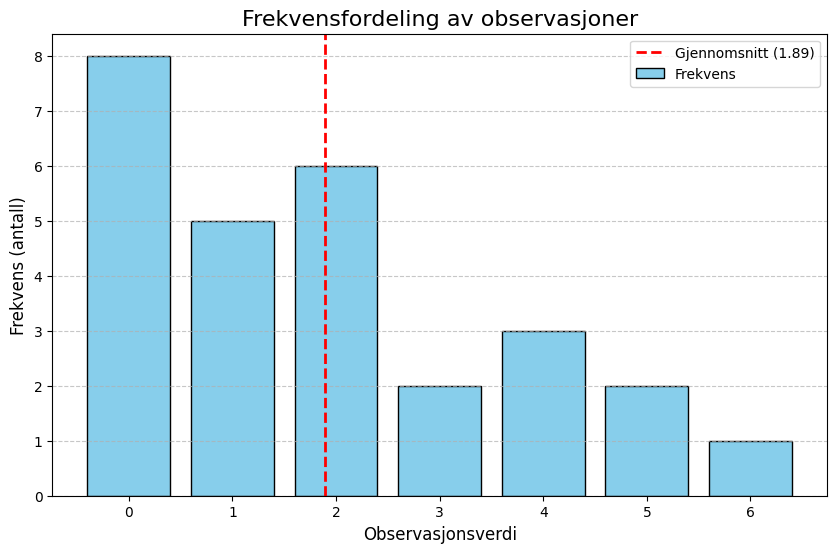

In [6]:
# -*- coding: utf-8 -*-

# 0. IMPORTERE NØDVENDIGE BIBLIOTEKER
# statistics for å beregne gjennomsnitt og typetall
from statistics import mean, mode
# matplotlib.pyplot for å lage plott og grafer
import matplotlib.pyplot as plt

# 1. DEFINER FREKVENSTABELLEN
# Dette er den eneste delen du trenger å endre for din oppgave.
# Format: [(observasjonsverdi, frekvens), ...]
frekvenstabell = [(0, 8), (1, 5), (2, 6), (3, 2), (4, 3), (5, 2), (6, 1)]

# 2. UTVIDE FREKVENSTABELLEN TIL EN FULLSTENDIG DATALISTE
# Vi lager en liste der hver observasjon legges til så mange ganger som frekvensen tilsier.
# Eksempel: (0, 8) blir til åtte 0-ere i listen.
data_liste = []
for observasjon, frekvens in frekvenstabell:
    data_liste += frekvens * [observasjon]

# (Valgfritt) Skriv ut den fulle listen for å se resultatet
# print("Fullstendig dataliste:", data_liste)

# 3. BEREGNE STATISTISKE MÅL
gjennomsnitt = mean(data_liste)
typetall = mode(data_liste)

# 4. SKRIVE UT RESULTATENE TIL KONSOLLEN
print("--- Resultater fra analysen ---")
print(f"Gjennomsnittet er: {round(gjennomsnitt, 2)}")
print(f"Typetallet er: {typetall}")
print("--------------------------------")

# 5. VISUALISERE DATAENE MED ET SØYLEDIAGRAM
# Henter ut observasjonene (x-verdiene) og frekvensene (y-verdiene) fra tabellen
observasjoner = [item[0] for item in frekvenstabell]
frekvenser = [item[1] for item in frekvenstabell]

# Lager selve søylediagrammet
plt.figure(figsize=(10, 6)) # Angir en fin størrelse på plottet
plt.bar(observasjoner, frekvenser, color='skyblue', edgecolor='black', label='Frekvens')

# Legger til en vertikal linje for å vise gjennomsnittet
plt.axvline(gjennomsnitt, color='red', linestyle='--', linewidth=2, label=f'Gjennomsnitt ({gjennomsnitt:.2f})')

# Legger til titler og etiketter for å gjøre plottet lett å forstå
plt.title('Frekvensfordeling av observasjoner', fontsize=16)
plt.xlabel('Observasjonsverdi', fontsize=12)
plt.ylabel('Frekvens (antall)', fontsize=12)
plt.xticks(observasjoner) # Sørger for at alle observasjonsverdier vises på x-aksen
plt.legend() # Viser etikettene (f.eks. "Gjennomsnitt")
plt.grid(axis='y', linestyle='--', alpha=0.7) # Legger til et rutenett på y-aksen

# Viser det ferdige plottet
plt.show()

--- Sentralmål fra frekvenstabellen ---
Gjennomsnitt: 3.33
Typetall:     3
Median:       3
---------------------------------------


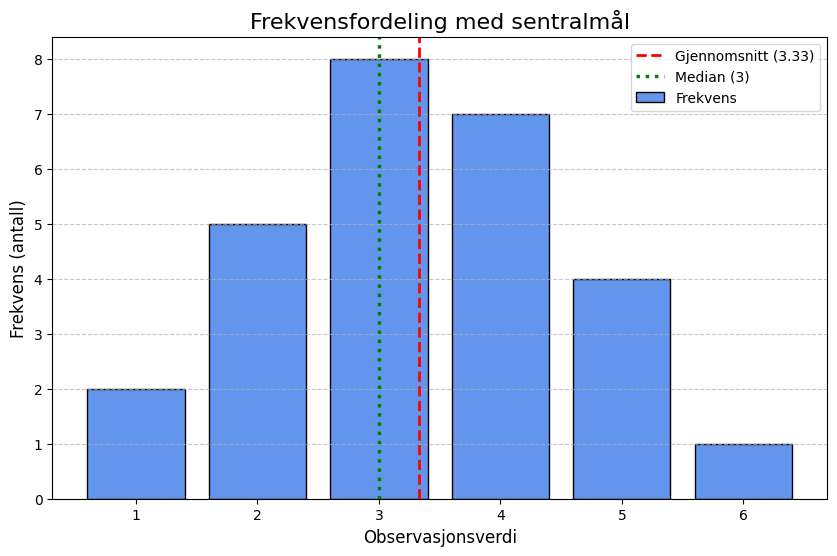

In [7]:
# -*- coding: utf-8 -*-

# 0. IMPORTERE NØDVENDIGE BIBLIOTEKER
# statistics for å beregne sentralmål
from statistics import mean, mode, median
# matplotlib.pyplot for å lage plott og grafer
import matplotlib.pyplot as plt

# 1. DEFINER FREKVENSTABELLEN
# Dette er den eneste delen du trenger å endre for din oppgave.
# Format: [(observasjonsverdi, frekvens), ...]
frekvenstabell = [(1, 2), (2, 5), (3, 8), (4, 7), (5, 4), (6, 1)]

# 2. UTVIDE FREKVENSTABELLEN TIL EN FULLSTENDIG DATALISTE
# Vi lager en liste der hver observasjon legges til så mange ganger som frekvensen tilsier.
data_liste = []
for observasjon, frekvens in frekvenstabell:
    data_liste += frekvens * [observasjon]

# (Valgfritt) Skriv ut den fulle listen for å se resultatet
# print("Fullstendig dataliste:", data_liste)

# 3. BEREGNE SENTRALMÅL (GJENNOMSNITT, TYPETALL OG MEDIAN)
gjennomsnitt = mean(data_liste)
typetall = mode(data_liste)
median_verdi = median(data_liste)

# 4. SKRIVE UT RESULTATENE TIL KONSOLLEN
print("--- Sentralmål fra frekvenstabellen ---")
print(f"Gjennomsnitt: {round(gjennomsnitt, 2)}")
print(f"Typetall:     {typetall}")
print(f"Median:       {median_verdi}")
print("---------------------------------------")

# 5. VISUALISERE DATAENE MED ET SØYLEDIAGRAM
# Henter ut observasjonene (x-verdiene) og frekvensene (y-verdiene)
observasjoner = [item[0] for item in frekvenstabell]
frekvenser = [item[1] for item in frekvenstabell]

# Lager selve søylediagrammet
plt.figure(figsize=(10, 6)) # Angir en fin størrelse på plottet
plt.bar(observasjoner, frekvenser, color='cornflowerblue', edgecolor='black', label='Frekvens')

# Legger til vertikale linjer for å vise sentralmålene
plt.axvline(gjennomsnitt, color='red', linestyle='--', linewidth=2, label=f'Gjennomsnitt ({gjennomsnitt:.2f})')
plt.axvline(median_verdi, color='green', linestyle=':', linewidth=2.5, label=f'Median ({median_verdi})')

# Legger til titler og etiketter for å gjøre plottet lett å forstå
plt.title('Frekvensfordeling med sentralmål', fontsize=16)
plt.xlabel('Observasjonsverdi', fontsize=12)
plt.ylabel('Frekvens (antall)', fontsize=12)
plt.xticks(observasjoner) # Sørger for at alle observasjonsverdier vises på x-aksen
plt.legend() # Viser etikettene (forklaringen av linjer og søyler)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Legger til et rutenett på y-aksen

# Viser det ferdige plottet
plt.show()

In [ ]:
from statistics import mean, pstdev

# Liste med tallverdier
liste = [73, 85, 71, 75, 74, 79, 86, 70, 74, 62, 69]                   # Endre disse tallene

# Beregner variasjonsbredden
variasjonsbredde = max(liste) - min(liste)

# Beregner gjennomsnittet og standardavviket
gjennomsnitt = mean(liste)
standardavvik = pstdev(liste)

# Skriver ut resultatene
print("Variasjonsbredden er", round(variasjonsbredde,2))
print("Gjennomsnittet er", round(gjennomsnitt, 2))
print("Standardavviket er", round(standardavvik, 2))

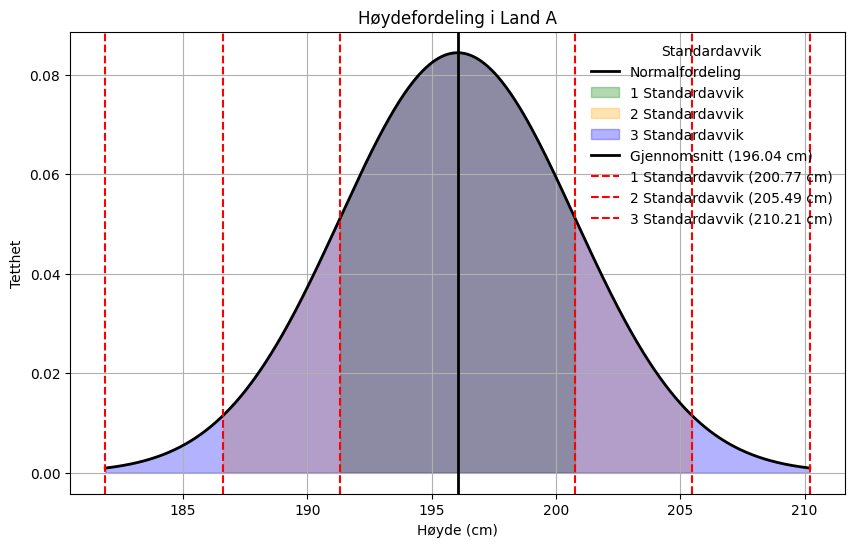

Variasjonsbredden er 11.00
Gjennomsnittet er 196.04
Standardavviket er 4.72

I en normalfordeling vil:
68.27 % av datasettet være under ett standardavvik fra gjennomsnittet.
95.45 % av datasettet være under to standardavvik fra gjennomsnittet.
99.73 % av datasettet være under tre standardavvik fra gjennomsnittet.
99.994 % av datasettet være under fire standardavvik fra gjennomsnittet.
Dataene er ikke normalfordelte (p-verdi <= 0.05).


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, shapiro

# Eksempeldata for høyder i cm
hoyder = [199.2, 188.7, 199.5, 198.2, 198.9, 188.5, 199.3]              # Forandre disse tallene

def beregn_statistikk(data):
    gjennomsnitt = np.mean(data)
    standardavvik = np.std(data)
    variasjonsbredde = max(data) - min(data)
    return gjennomsnitt, standardavvik, variasjonsbredde
def plott_normalfordeling(data, gjennomsnitt, standardavvik):
    x = np.linspace(gjennomsnitt - 3 * standardavvik, gjennomsnitt + 3 * standardavvik, 1000)
    y = norm.pdf(x, gjennomsnitt, standardavvik)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='Normalfordeling', color='black', lw=2)

    # Skravering for 1, 2 og 3 standardavvik
    colors = ['green', 'orange', 'blue']
    for i in range(1, 4):
        plt.fill_between(x, 0, y, where=(x >= gjennomsnitt - i * standardavvik) & (x <= gjennomsnitt + i * standardavvik),
                         color=colors[i-1], alpha=0.3, label=f'{i} Standardavvik')

    # Vertikale linjer for gjennomsnitt og standardavvik
    plt.axvline(gjennomsnitt, color='black', linestyle='-', label=f'Gjennomsnitt ({gjennomsnitt:.2f} cm)', lw=2)
    for i in range(1, 4):
        plt.axvline(gjennomsnitt + i * standardavvik, color='red', linestyle='--', label=f'{i} Standardavvik ({gjennomsnitt + i * standardavvik:.2f} cm)')
        plt.axvline(gjennomsnitt - i * standardavvik, color='red', linestyle='--')

    plt.title("Høydefordeling i Land A")
    plt.xlabel("Høyde (cm)")
    plt.ylabel("Tetthet")
    plt.legend(loc='upper right', frameon=False, title="Standardavvik", fontsize=10)
    plt.grid(True)
    plt.show()

def skriv_ut_statistikk(gjennomsnitt, standardavvik, variasjonsbredde):
    print(f"Variasjonsbredden er {variasjonsbredde:.2f}")
    print(f"Gjennomsnittet er {gjennomsnitt:.2f}")
    print(f"Standardavviket er {standardavvik:.2f}")
    print("\nI en normalfordeling vil:")
    print("68.27 % av datasettet være under ett standardavvik fra gjennomsnittet.")
    print("95.45 % av datasettet være under to standardavvik fra gjennomsnittet.")
    print("99.73 % av datasettet være under tre standardavvik fra gjennomsnittet.")
    print("99.994 % av datasettet være under fire standardavvik fra gjennomsnittet.")

def test_normalfordeling(data):
    stat, p_value = shapiro(data)
    if p_value > 0.05:
        print("Dataene er normalfordelte (p-verdi > 0.05).")
    else:
        print("Dataene er ikke normalfordelte (p-verdi <= 0.05).")

# Beregn statistikk
gjennomsnitt, standardavvik, variasjonsbredde = beregn_statistikk(hoyder)

# Plott normalfordeling
plott_normalfordeling(hoyder, gjennomsnitt, standardavvik)

# Skriv ut statistikk
skriv_ut_statistikk(gjennomsnitt, standardavvik, variasjonsbredde)

# Test om dataene er normalfordelte
test_normalfordeling(hoyder)

Hvis dataene ikke er normalfordelte, betyr det at de ikke følger den typiske "klokkeformen" til en normalfordeling. Dette kan ha flere konsekvenser, avhengig av hva du prøver å oppnå:

Statistiske tester: Mange statistiske tester, som t-test og ANOVA, antar at dataene er normalfordelte. Hvis denne antagelsen ikke holder, kan resultatene fra disse testene være misvisende.

Konfidensintervaller: Konfidensintervaller basert på normalfordeling kan være unøyaktige hvis dataene ikke er normalfordelte.

Regresjonsanalyse: Lineær regresjon antar ofte normalfordelte residualer. Hvis residualene ikke er normalfordelte, kan modellens prediksjoner være upålitelige.

Beskrivende statistikk: Gjennomsnitt og standardavvik er mest meningsfulle for normalfordelte data. For ikke-normalfordelte data kan median og interkvartilavstand være bedre mål.

Transformasjoner: Du kan prøve å transformere dataene (f.eks. log-transformasjon) for å oppnå normalfordeling.

Alternative metoder: Bruk ikke-parametriske tester som ikke krever normalfordeling, som Mann-Whitney U-test eller Kruskal-Wallis test.

Variasjonsbredden for Lag A er 11.0
Gjennomsnittet for Lag A er 196.04
Standardavviket for Lag A er 4.72
Variasjonsbredden for Lag B er 8.0
Gjennomsnittet for Lag B er 189.93
Standardavviket for Lag B er 2.59


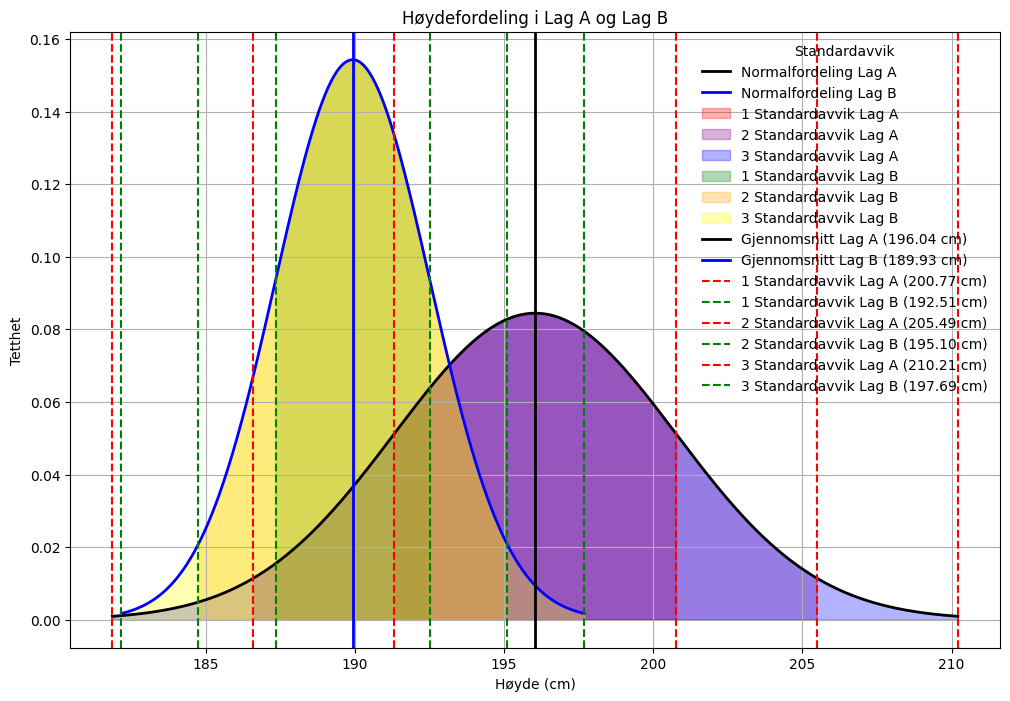


I en normalfordeling vil:
68.27 % av datasettet være under ett standardavvik fra gjennomsnittet.
95.45 % av datasettet være under to standardavvik fra gjennomsnittet.
99.73 % av datasettet være under tre standardavvik fra gjennomsnittet.
99.994 % av datasettet være under fire standardavvik fra gjennomsnittet.


In [9]:
# Beregner standardavviket for en liste med tall med litt andre farger for 2 sett med verdier i samme bilde
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Eksempeldata for høyder i cm for to forskjellige lag
hoyder_lag_a = [199.2, 188.7, 199.5, 198.2, 198.9, 188.5, 199.3]                    # Forandre disse tallene
hoyder_lag_b = [185.2, 190.1, 192.3, 187.5, 193.2, 189.8, 191.4]                    # Forandre disse tallene

# Beregner gjennomsnittet og standardavviket for begge lag
gjennomsnitt_a = np.mean(hoyder_lag_a)
standardavvik_a = np.std(hoyder_lag_a)
gjennomsnitt_b = np.mean(hoyder_lag_b)
standardavvik_b = np.std(hoyder_lag_b)

# Lager X-verdier som går fra -3 til +3 standardavvik fra gjennomsnittet for begge lag
x_a = np.linspace(gjennomsnitt_a - 3 * standardavvik_a, gjennomsnitt_a + 3 * standardavvik_a, 1000)
x_b = np.linspace(gjennomsnitt_b - 3 * standardavvik_b, gjennomsnitt_b + 3 * standardavvik_b, 1000)

# Beregner Y-verdiene for normalfordelingen for begge lag
y_a = norm.pdf(x_a, gjennomsnitt_a, standardavvik_a)
y_b = norm.pdf(x_b, gjennomsnitt_b, standardavvik_b)

# Plotter normalfordelingskurvene
plt.figure(figsize=(12, 8))
plt.plot(x_a, y_a, label='Normalfordeling Lag A', color='black', lw=2)
plt.plot(x_b, y_b, label='Normalfordeling Lag B', color='blue', lw=2)

# Skravering for 1, 2 og 3 standardavvik for Lag A (mer kontrastfylte farger)
plt.fill_between(x_a, 0, y_a, where=(x_a >= gjennomsnitt_a - 1 * standardavvik_a) & (x_a <= gjennomsnitt_a + 1 * standardavvik_a),
                 color='red', alpha=0.3, label='1 Standardavvik Lag A')
plt.fill_between(x_a, 0, y_a, where=(x_a >= gjennomsnitt_a - 2 * standardavvik_a) & (x_a <= gjennomsnitt_a + 2 * standardavvik_a),
                 color='purple', alpha=0.3, label='2 Standardavvik Lag A')
plt.fill_between(x_a, 0, y_a, where=(x_a >= gjennomsnitt_a - 3 * standardavvik_a) & (x_a <= gjennomsnitt_a + 3 * standardavvik_a),
                 color='blue', alpha=0.3, label='3 Standardavvik Lag A')

# Skravering for 1, 2 og 3 standardavvik for Lag B (mer kontrastfylte farger)
plt.fill_between(x_b, 0, y_b, where=(x_b >= gjennomsnitt_b - 1 * standardavvik_b) & (x_b <= gjennomsnitt_b + 1 * standardavvik_b),
                 color='green', alpha=0.3, label='1 Standardavvik Lag B')
plt.fill_between(x_b, 0, y_b, where=(x_b >= gjennomsnitt_b - 2 * standardavvik_b) & (x_b <= gjennomsnitt_b + 2 * standardavvik_b),
                 color='orange', alpha=0.3, label='2 Standardavvik Lag B')
plt.fill_between(x_b, 0, y_b, where=(x_b >= gjennomsnitt_b - 3 * standardavvik_b) & (x_b <= gjennomsnitt_b + 3 * standardavvik_b),
                 color='yellow', alpha=0.3, label='3 Standardavvik Lag B')

# Legger til vertikale linjer for gjennomsnitt og standardavvikene for begge lag
plt.axvline(gjennomsnitt_a, color='black', linestyle='-', label=f'Gjennomsnitt Lag A ({gjennomsnitt_a:.2f} cm)', lw=2)
plt.axvline(gjennomsnitt_b, color='blue', linestyle='-', label=f'Gjennomsnitt Lag B ({gjennomsnitt_b:.2f} cm)', lw=2)
for i in range(1, 4):
    # Linjer til høyre for gjennomsnittet
    plt.axvline(gjennomsnitt_a + i * standardavvik_a, color='red', linestyle='--', label=f'{i} Standardavvik Lag A ({gjennomsnitt_a + i * standardavvik_a:.2f} cm)')
    plt.axvline(gjennomsnitt_b + i * standardavvik_b, color='green', linestyle='--', label=f'{i} Standardavvik Lag B ({gjennomsnitt_b + i * standardavvik_b:.2f} cm)')
    # Linjer til venstre for gjennomsnittet
    plt.axvline(gjennomsnitt_a - i * standardavvik_a, color='red', linestyle='--')
    plt.axvline(gjennomsnitt_b - i * standardavvik_b, color='green', linestyle='--')

# Legger til tittel og etiketter
plt.title("Høydefordeling i Lag A og Lag B")                       # Endre overskriften
plt.xlabel("Høyde (cm)")                                           # Endre x-akse navnet
plt.ylabel("Tetthet")                                              # Endre y-akse navnet

# Justering av legenden for å sikre god lesbarhet
plt.legend(loc='upper right', frameon=False, title="Standardavvik", fontsize=10)

# Beregner variasjonsbredden for begge lag
variasjonsbredde_a = max(hoyder_lag_a) - min(hoyder_lag_a)
variasjonsbredde_b = max(hoyder_lag_b) - min(hoyder_lag_b)

# Skriver ut resultatene
print("Variasjonsbredden for Lag A er", round(variasjonsbredde_a, 2))
print("Gjennomsnittet for Lag A er", round(gjennomsnitt_a, 2))
print("Standardavviket for Lag A er", round(standardavvik_a, 2))
print("Variasjonsbredden for Lag B er", round(variasjonsbredde_b, 2))
print("Gjennomsnittet for Lag B er", round(gjennomsnitt_b, 2))
print("Standardavviket for Lag B er", round(standardavvik_b, 2))

# Viser grafen
plt.grid(True)
plt.show()

# Legger til prosentverdiene under bildet
print("\nI en normalfordeling vil:")
print("68.27 % av datasettet være under ett standardavvik fra gjennomsnittet.")
print("95.45 % av datasettet være under to standardavvik fra gjennomsnittet.")
print("99.73 % av datasettet være under tre standardavvik fra gjennomsnittet.")
print("99.994 % av datasettet være under fire standardavvik fra gjennomsnittet.")

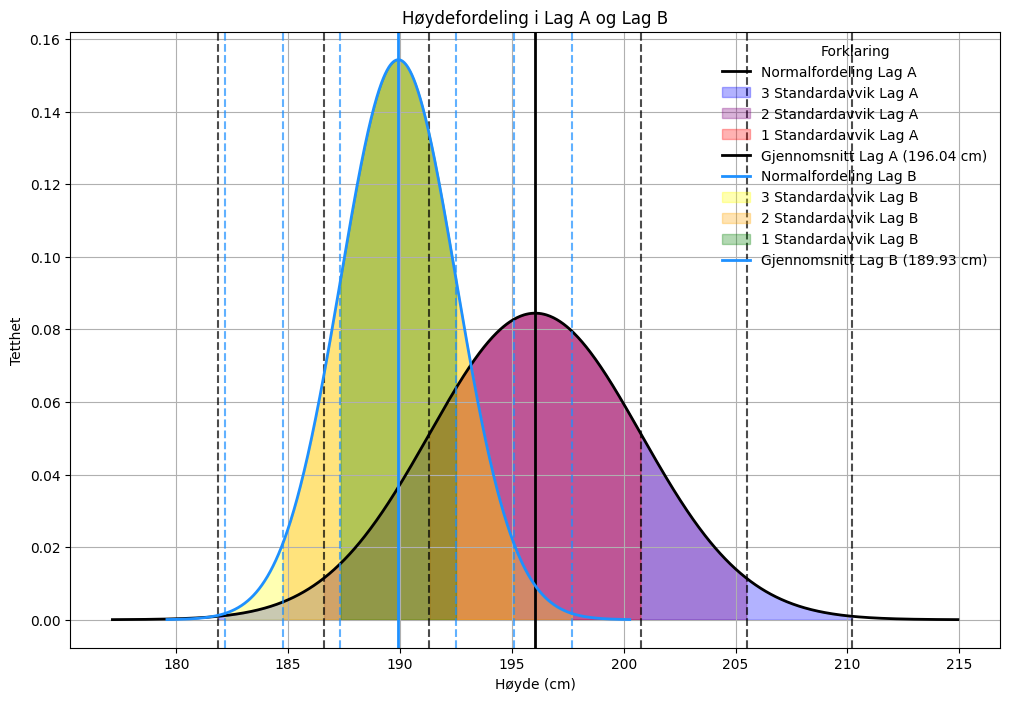


--- Statistisk Oppsummering ---

Resultater for Lag A:
  Variasjonsbredde: 11.00
  Gjennomsnitt:     196.04
  Standardavvik:    4.72

Resultater for Lag B:
  Variasjonsbredde: 8.00
  Gjennomsnitt:     189.93
  Standardavvik:    2.59

I en normalfordeling vil ca.:
  68.3 % av dataene ligge innenfor ett standardavvik fra gjennomsnittet.
  95.5 % av dataene ligge innenfor to standardavvik fra gjennomsnittet.
  99.7 % av dataene ligge innenfor tre standardavvik fra gjennomsnittet.


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import matplotlib.colors as mcolors

def plot_team_distribution(ax, data, name, line_color, fill_colors):
    """
    Beregner og plotter normalfordelingen for ett enkelt lag på en gitt akse.

    Args:
        ax (matplotlib.axes.Axes): Aksen som skal plottes på.
        data (list): Listen med datapunkter (f.eks. høyder).
        name (str): Navnet på laget (f.eks. 'Lag A').
        line_color (str): Fargen på selve normalkurven.
        fill_colors (list): En liste med tre farger for 1, 2 og 3 standardavvik.
    """
    # 1. Beregn statistikk
    mean = np.mean(data)
    std = np.std(data)
    variance_range = np.ptp(data)  # np.ptp() er en snarvei for max(data) - min(data)

    # 2. Forbered data for plotting
    x = np.linspace(mean - 4 * std, mean + 4 * std, 1000)
    y = norm.pdf(x, mean, std)

    # 3. Plot selve normalkurven
    ax.plot(x, y, label=f'Normalfordeling {name}', color=line_color, lw=2)

    # 4. Fyll områder for standardavvik
    # Vi plotter det største området først (3 std) med lavest alpha, deretter mindre oppå.
    for i in range(3, 0, -1):
        ax.fill_between(x, 0, y,
                        where=(x >= mean - i * std) & (x <= mean + i * std),
                        color=fill_colors[i-1],
                        alpha=0.3,
                        label=f'{i} Standardavvik {name}')

    # 5. Plot vertikale linjer
    ax.axvline(mean, color=line_color, linestyle='-', label=f'Gjennomsnitt {name} ({mean:.2f} cm)', lw=2)
    for i in range(1, 4):
        # Linjer for standardavvik (uten egen label for å holde legenden ren)
        ax.axvline(mean + i * std, color=line_color, linestyle='--', alpha=0.7)
        ax.axvline(mean - i * std, color=line_color, linestyle='--', alpha=0.7)

    return {
        "gjennomsnitt": mean,
        "standardavvik": std,
        "variasjonsbredde": variance_range
    }

# --- HOVEDSKRIPT ---

# 1. Definer data og utseende for lagene på ett sted
teams_data = {
    'Lag A': {
        'data': [199.2, 188.7, 199.5, 198.2, 198.9, 188.5, 199.3],
        'line_color': 'black',
        'fill_colors': ['red', 'purple', 'blue']  # Farger for 1, 2, og 3 std
    },
    'Lag B': {
        'data': [185.2, 190.1, 192.3, 187.5, 193.2, 189.8, 191.4],
        'line_color': 'dodgerblue',
        'fill_colors': ['green', 'orange', 'yellow'] # Farger for 1, 2, og 3 std
    }
}

# 2. Sett opp figuren
fig, ax = plt.subplots(figsize=(12, 8))

# 3. Loop gjennom lagene og plot dem
results = {}
for name, properties in teams_data.items():
    results[name] = plot_team_distribution(
        ax=ax,
        data=properties['data'],
        name=name,
        line_color=properties['line_color'],
        fill_colors=properties['fill_colors']
    )

# 4. Tilpass og vis plottet
ax.set_title("Høydefordeling i Lag A og Lag B")
ax.set_xlabel("Høyde (cm)")
ax.set_ylabel("Tetthet")
ax.legend(loc='upper right', frameon=False, title="Forklaring")
ax.grid(True)
plt.show()

# 5. Skriv ut en pen oppsummering av resultatene
print("\n--- Statistisk Oppsummering ---")
for name, stats in results.items():
    print(f"\nResultater for {name}:")
    print(f"  Variasjonsbredde: {stats['variasjonsbredde']:.2f}")
    print(f"  Gjennomsnitt:     {stats['gjennomsnitt']:.2f}")
    print(f"  Standardavvik:    {stats['standardavvik']:.2f}")

# 6. Legg til generell informasjon
print("\nI en normalfordeling vil ca.:")
print("  68.3 % av dataene ligge innenfor ett standardavvik fra gjennomsnittet.")
print("  95.5 % av dataene ligge innenfor to standardavvik fra gjennomsnittet.")
print("  99.7 % av dataene ligge innenfor tre standardavvik fra gjennomsnittet.")

In [ ]:
# Gjennomsnitt, standardavvik, variansen fra en frekvenstabell
from statistics import mean, pstdev, variance

# Frekvenstabell med verdier og deres frekvenser
frekvenstabell = [(0,1), (1,1), (2,16), (3,8), (4,1), (5,0), (6,1), (7,0), (8,0), (9,1)]  # Endre disse tallene å de matcher frekvenstabellen gitt i din oppgave

# Tom liste for å lagre verdiene
liste = []

# Fyller listen med verdier i henhold til deres frekvens
for (x, f) in frekvenstabell:
    liste += f * [x]

# Beregner gjennomsnittet, standardavviket og variansen
gjennomsnitt = mean(liste)
standardavvik = pstdev(liste)
varians = variance(liste)

# Skriver ut resultatene
print("Gjennomsnittet er", round(gjennomsnitt, 2))
print("Standardavviket er", round(standardavvik, 2))
print("Variansen er", round(varians, 2))

In [ ]:
# Gjennomsnitt, standardavvik, variansen ifra en frekvenstabell
from statistics import mean, pstdev, variance

# Frekvenstabell med verdier og deres frekvenser
frekvenstabell = [(4,2), (5,4), (5.5,2), (6,3), (7,11), (7.5,3), (8,2), (9, 1)]  # Endre disse tallene å de matcher frekvenstabellen gitt i din oppgave

# Tom liste for å lagre verdiene
liste = []

# Fyller listen med verdier i henhold til deres frekvens
for (x, f) in frekvenstabell:
    liste += f * [x]

# Beregner gjennomsnittet, standardavviket og variansen
gjennomsnitt = mean(liste)
standardavvik = pstdev(liste)
varians = variance(liste)

# Skriver ut resultatene
print("Gjennomsnittet er", round(gjennomsnitt, 2))
print("Standardavviket er", round(standardavvik, 2))
print("Variansen er", round(varians, 2))

In [ ]:
# Lage histogram, Farger : https://matplotlib.org/stable/gallery/color/named_colors.html
import matplotlib.pyplot as plt

# Definer dataene
intervaller = [0, 10, 15, 20, 30, 50, 70]                   # Intervallgrensene altså [0,10> gir 0 og 10 som intervallgrense
frekvenser = [20, 30, 150, 125, 75, 100]                    # Frekvensene

# Regn ut søylehøyder
soyle_hoyder = []
for i in range(len(frekvenser)):
    intervall_bredde = intervaller[i+1] - intervaller[i]
    soyle_hoyder.append(frekvenser[i] / intervall_bredde)

# Print ut summen av frekvensene
total_frekvenser = sum(frekvenser)
print(f"Totalt antall frekvenser: {total_frekvenser}")

# Plott histogrammet
plt.bar(intervaller[:-1], soyle_hoyder, width=[intervaller[i+1] - intervaller[i] for i in range(len(frekvenser))], align='edge', edgecolor='black', color='rosybrown')

# Sett label på akser og tittel
plt.xlabel('Intervallgrenser - Alderen til medlemmene')                        # Endre x-akse navnet
plt.ylabel('Søylehøyde = Frekvens/Intervallbredde')                            # Alltid Søylehøyde = frekvens/intervallbredde
plt.title('Tur med idrettslaget')                                              # Endre overkskrift

# Vis plottet
plt.show()

In [ ]:
# Finne median og gjennomsnitt i ett klassedelt materiale ofte i forbindelse med ett histogram
import matplotlib.pyplot as plt

# Intervallgrenser og frekvenser
intervaller = [0, 10, 15, 20, 30, 50, 70]               # Intervallgrensene altså [0,10> gir 0 og 10 som intervallgrense
frekvenser = [20, 30, 150, 125, 75, 100]                # Frekvensene

# Finn midtpunktene
midtpunkter = [(intervaller[i] + intervaller[i+1]) / 2 for i in range(len(intervaller)-1)]

# Print ut summen av frekvensene
total_frekvenser = sum(frekvenser)
print(f"Totalt antall frekvenser: {total_frekvenser}")

# Regn ut gjennomsnittet
total = sum([midtpunkter[i] * frekvenser[i] for i in range(len(midtpunkter))])
gjennomsnitt = total / sum(frekvenser)
print("Gjennomsnittet er:", round(gjennomsnitt, 1))

# Regn ut medianen
n = sum(frekvenser)
midten = n / 2
cumulative_freq = 0
median = None
for i in range(len(intervaller)-1):
    cumulative_freq += frekvenser[i]
    if cumulative_freq >= midten:
        # Interpoler for å finne medianen nøyaktig
        if cumulative_freq == midten:
            median = (midtpunkter[i] + midtpunkter[i+1]) / 2
        else:
            median = midtpunkter[i]
        break

# Plot de relative kumulative frekvensene mot intervallgrensene
cumulative_freqs = []
cumulative_freq = 0
for i in range(len(intervaller)-1):
    cumulative_freq += frekvenser[i]
    cumulative_freqs.append(cumulative_freq)

rel_cumulative_freq = [0] + [cf / sum(frekvenser) for cf in cumulative_freqs]
plt.plot(intervaller, rel_cumulative_freq, label='Kumulative frekvenser', color='hotpink', linestyle='solid')
plt.axhline(y=0.5, color='red', linestyle='dashed', label='y = 0.5')

# Finn hvor medianen krysser den blå linjen og marker det punktet
for i in range(len(rel_cumulative_freq)-1):
    if rel_cumulative_freq[i] <= 0.5 and rel_cumulative_freq[i+1] >= 0.5:
        x1, y1 = intervaller[i], rel_cumulative_freq[i]
        x2, y2 = intervaller[i+1], rel_cumulative_freq[i+1]
        m = (y2 - y1) / (x2 - x1)
        x = x1 + (0.5 - y1) / m
        plt.plot(x, 0.5, marker='o', color='red', label='Medianpunkt')
        break

# Legg til en overskrift
plt.title("Tur med idrettslaget")                                    # Endre overskriften
plt.xlabel("Intervallgrenser - alderen til medlemmene")              # Endre x-akse navnet
plt.ylabel("Relative kumulative frekvenser")                         # Endre y-akse navnet
plt.legend()
plt.grid(False)
print("Medianen er:", round(x, 1))
plt.show()

In [ ]:
# Variasjonsbredde, standardavvik, median, gjennomsnitt i ett gruppet materiale
import numpy as np
import matplotlib.pyplot as plt

# Guttene sin spilletid i minutter
guttene_spilletid = np.array([18, 21, 26, 33, 33, 41, 48, 55, 64, 70, 112, 125, 146])    # Endre disse tallene til din oppgave

# a) Variasjonsbredde
variasjonsbredde = np.max(guttene_spilletid) - np.min(guttene_spilletid)
print(f"Variasjonsbredde: {variasjonsbredde} minutter")

# b) Standardavvik
gjennomsnitt = np.average(guttene_spilletid)
standardavvik = np.sqrt(np.average((guttene_spilletid - gjennomsnitt) ** 2))
print(f"Standardavvik: {standardavvik:.2f} minutter")

# c) Sammenligning med jentegjengen
jentegjeng_standardavvik = 60
if standardavvik > jentegjeng_standardavvik:
    sammenligning = "Guttene har større variasjon i spilletiden."
else:
    sammenligning = "Guttene og jentene har omtrent samme variasjon i spilletiden."

print(sammenligning)

# d) Antall elever i undersøkelsen
frekvenser = np.array([6, 41, 223, 113, 47, 8])
antall_elever = np.sum(frekvenser)
print(f"Antall elever: {antall_elever}")

# e) Medianens klasse
klasse_midtpunkter = np.array([10, 30, 50, 70, 90, 125])
median_klasse = klasse_midtpunkter[np.argmax(frekvenser)]
print(f"Medianens klasse: [{median_klasse-10}, {median_klasse+10})")

# f) Gjennomsnitt i det grupperte materialet
gjennomsnitt_gruppert = np.sum(klasse_midtpunkter * frekvenser) / antall_elever
print(f"Gjennomsnitt i det grupperte materialet: {gjennomsnitt_gruppert:.2f} minutter")


In [ ]:
#Søyle, sektor og linjediagram med 2 sett av frekvenser
import matplotlib.pyplot as plt
import numpy as np

# Liste med navn og frekvenser
navn = ["Mandag", "Tirsdag", "Onsdag", "Torsdag", "Fredag"]        # Ukedag
frekvenser1 = [10, 15, 11, 12, 15]                                 # Syklister
frekvenser2 = [7, 9, 6, 7, 12]                                     # Syklister med hjelm

# Fargevalg
farger = ['lemonchiffon','coral','#99ff99','#ffcc99','#c2c2f0']
farger1 = ['blue']
farger2 = ['red']

# Beregn totalfrekvensen for begge sett
total1 = sum(frekvenser1)
total2 = sum(frekvenser2)

# Beregn andelene (i prosent) for hver sektor for begge sett
andelene1 = [100 * frek / total1 for frek in frekvenser1]
andelene2 = [100 * frek / total2 for frek in frekvenser2]

# Kakediagram for første sett
plt.pie(andelene1, labels=navn, autopct='%1.1f%%', colors=farger)
plt.title("Frekvenser av navn - Sett 1")
plt.axis('equal')
plt.show()

# Kakediagram for andre sett
plt.pie(andelene2, labels=navn, autopct='%1.1f%%', colors=farger)
plt.title("Frekvenser av navn - Sett 2")
plt.axis('equal')
plt.show()

# Søylediagram
bar_width = 0.3  # Reduser bredden på søylene
index = np.arange(len(navn)) * 1.5  # Øk avstanden mellom søylene

fig, ax = plt.subplots()
bar1 = ax.bar(index, frekvenser1, bar_width, label='Syklister totalt', color=farger1)
bar2 = ax.bar(index + bar_width + 0.05, frekvenser2, bar_width, label='Syklister med hjelm', color=farger2)  # Legg til mellomrom mellom søylene

ax.set_xlabel('Ukedag')
ax.set_ylabel('Frekvens')
ax.set_title('Syklister totalt og syklister med hjelm')
ax.set_xticks(index + bar_width / 2 + 0.025)
ax.set_xticklabels(navn)
ax.legend()

# Juster y-aksen slik at det høyeste antall frekvenser matcher y-aksen sitt høyeste
max_frekvens = max(max(frekvenser1), max(frekvenser2))
ax.set_ylim(0, max_frekvens + 1)

plt.show()

# Linjediagram for første sett
plt.plot(navn, frekvenser1, marker='o', color='#ff7f0e', label='Sett 1')
plt.plot(navn, frekvenser2, marker='x', color='#1f77b4', label='Sett 2')
plt.title("Frekvenser av navn")                                               # Endre overskrift
plt.xlabel("Navn")                                                            # Endre x-akse navn
plt.ylabel("Frekvens")                                                        # Endre y-akse navn
plt.ylim(ymin=0)
plt.legend()
plt.show()

In [ ]:
# Søylediagram for 2 sett av prosenter og tabell - dataramme
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Lag en data ramme med de gitte dataene
data = {
    'Ukedag': ['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag'],                # Endre tallene så de passer til din oppgave
    'Syklister': [10, 15, 11, 12, 15],
    'Syklister med hjelm': [7, 9, 6, 7, 12]
}

df = pd.DataFrame(data)

# Legg sammen syklister og syklister med hjelm
sum_syklister = df['Syklister'].sum()
sum_syklister_med_hjelm = df['Syklister med hjelm'].sum()

# Legg til en ny rad med totalt, ekskluder NA-verdier
total_row = pd.DataFrame({'Ukedag': ['Totalt'], 'Syklister': [sum_syklister], 'Syklister med hjelm': [sum_syklister_med_hjelm]})
df = pd.concat([df, total_row], ignore_index=True)

# Fyll NaN-verdier med tomme strenger
df = df.fillna('')

# Beregn prosentene av de som sykler med og uten hjelm
df['Prosent med hjelm'] = ((df['Syklister med hjelm'] / df['Syklister']) * 100).round(2)
df['Prosent uten hjelm'] = (((df['Syklister'] - df['Syklister med hjelm']) / df['Syklister']) * 100).round(2)

# Fjern tallene som oppstår til venstre
df.index = [''] * len(df)

# Sentrer alle tallene i dataframen og vis hele dataframen på en oversiktlig måte
styled_df = df.style.set_table_styles(
    [{'selector': 'td', 'props': [('text-align', 'center')]}]
)

display(styled_df)

# Søylediagram
navn = df['Ukedag'][:-1]
prosent_med_hjelm = df['Prosent med hjelm'][:-1]
prosent_uten_hjelm = df['Prosent uten hjelm'][:-1]

bar_width = 0.3  # Reduser bredden på søylene
index = np.arange(len(navn)) * 1.5  # Øk avstanden mellom søylene

fig, ax = plt.subplots()
bar1 = ax.bar(index, prosent_med_hjelm, bar_width, label='Prosent med hjelm', color='blue')
bar2 = ax.bar(index + bar_width + 0.05, prosent_uten_hjelm, bar_width, label='Prosent uten hjelm', color='red')  # Legg til mellomrom mellom søylene

ax.set_xlabel('Ukedag')
ax.set_ylabel('Prosent')
ax.set_title('Antall syklister som bruker hjelm/ikke bruker hjelm i prosent')
ax.set_xticks(index + bar_width / 2 + 0.025)
ax.set_xticklabels(navn)
ax.legend()

# Juster y-aksen slik at den høyeste prosentandelen matcher y-aksen sitt høyeste
max_prosent_med_hjelm = prosent_med_hjelm.max()
max_prosent_uten_hjelm = prosent_uten_hjelm.max()
max_prosent = max(max_prosent_med_hjelm, max_prosent_uten_hjelm)
ax.set_ylim(0, max_prosent + 5)  # Legg til litt margin på toppen

plt.show()

In [ ]:
# Oppgave 2 - Del 2 Eksempelsett Våren 2023
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Tallene er hentet fra diagrammet over
total_2017 = 145
total_2019 = 125
total_2020 = 65
innenlands_2019 = 35
innenlands_2020 = 50
utenlands_2019 = total_2019 - innenlands_2019
utenlands_2020 = total_2020 - innenlands_2020

# Beregning av prosentvis endring
innenlands_endring = (innenlands_2020 - innenlands_2019) / innenlands_2019 * 100
utenlands_endring = (utenlands_2019 - utenlands_2020) / utenlands_2019 * 100

# Verdier for sirkeldiagrammer
utenlands_2017 = total_2017 - 40
innenlands_2017 = 40
utenlands_2021 = 80 - 65
innenlands_2021 = 65

# Utskrift av løsningsforslaget med 2 desimaler
print(f"1. resultat: 2017 var et toppår når det gjelder reiser totalt, med en kostnad på {total_2017:.2f} milliarder kroner.")
print(f"2. resultat: Fra 2019 til 2020 sank summen brukt på reiser totalt fra cirka {total_2019:.2f} milliarder kroner til {total_2020:.2f} milliarder, altså nesten en halvering.")
print(f"3. resultat: I samme periode økte summen brukt på innenlandsreiser, fra cirka {innenlands_2019:.2f} milliarder kroner til {innenlands_2020:.2f} milliarder, en økning på {innenlands_endring:.2f} prosent.")
print(f"4. resultat: Summen brukt på utenlandsreiser falt i samme periode fra {utenlands_2019:.2f} milliarder til {utenlands_2020:.2f} milliarder, en reduksjon på {utenlands_endring:.2f} prosent.")

# Lag en data ramme med de gitte dataene
data = {
    'År': [2017, 2021],
    'Utenlands': [utenlands_2017, utenlands_2021],
    'Innenlands': [innenlands_2017, innenlands_2021]
}

df = pd.DataFrame(data)

# Sentrer alle tallene i dataframen og vis hele dataframen på en oversiktlig måte
styled_df = df.style.set_table_styles(
    [{'selector': 'td', 'props': [('text-align', 'center')]}]
)

# Fjern tallene som oppstår til venstre
df.index = [''] * len(df)

display(styled_df)

print(f"5. resultat: Nedenfor er det laget sirkeldiagrammer over fordelingen av reisetypene i 2017 og 2021.")

# Lag sirkeldiagrammer over fordelingen av reisetypene i 2017 og 2021
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Sirkeldiagram for 2017
axs[0].pie(df.iloc[0, 1:], labels=['Utenlands', 'Innenlands'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
axs[0].set_title('Fordeling av reisetypene i 2017')

# Sirkeldiagram for 2021
axs[1].pie(df.iloc[1, 1:], labels=['Utenlands', 'Innenlands'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
axs[1].set_title('Fordeling av reisetypene i 2021')

plt.show()

# $\color{lightblue}{\text{Kapittel 5 - Lineære funksjoner}}$

In [ ]:
# Stigningstallet til den rette linjen dersom du får vite koordinatene (x1,y1) og (x2, y2)
x1 = 0
y1 = -2
x2 = 1
y2 = 0

slope = (y2 - y1) / (x2 - x1)

print("stigningstall = ", slope)

In [ ]:
# Interaktiv analyse av stigningstall med widgets
# Koden må kjøres i Jupyter Notebook eller JupyterLab
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Funksjon for å beregne stigningstall
def calculate_slope(x1, y1, x2, y2):
    if x2 - x1 == 0:
        return "Udefinert (vertikal linje)"
    return (y2 - y1) / (x2 - x1)

# Funksjon som oppdaterer visningen basert på brukerens valg
def update(x1, y1, x2, y2, show_slope, show_plot, show_labels):
    slope = calculate_slope(x1, y1, x2, y2)
    
    if show_slope:
        print(f"Stigningstall = {slope}")

    if show_plot:
        plt.figure(figsize=(5, 3))
        plt.plot([x1, x2], [y1, y2], marker='o')
        plt.title(f"Linje fra ({x1}, {y1}) til ({x2}, {y2})")
        plt.grid(True)
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)
        
        if show_labels:
            plt.text(x1, y1, f"({x1}, {y1})", fontsize=12, ha='right')
            plt.text(x2, y2, f"({x2}, {y2})", fontsize=12, ha='right')
        
        plt.show()

# Slidere for koordinater
x1_slider = widgets.IntSlider(value=0, min=-10, max=10, description='x1')
y1_slider = widgets.IntSlider(value=-2, min=-10, max=10, description='y1')
x2_slider = widgets.IntSlider(value=1, min=-10, max=10, description='x2')
y2_slider = widgets.IntSlider(value=0, min=-10, max=10, description='y2')

# Avkrysningsbokser for visningsvalg
show_slope_checkbox = widgets.Checkbox(value=True, description='Vis stigningstall')
show_plot_checkbox = widgets.Checkbox(value=True, description='Vis plott')
show_labels_checkbox = widgets.Checkbox(value=True, description='Vis koordinater')

# Kombiner widgets og koble til funksjonen
ui = widgets.VBox([
    x1_slider, y1_slider, x2_slider, y2_slider,
    show_slope_checkbox, show_plot_checkbox, show_labels_checkbox
])

out = widgets.interactive_output(update, {
    'x1': x1_slider,
    'y1': y1_slider,
    'x2': x2_slider,
    'y2': y2_slider,
    'show_slope': show_slope_checkbox,
    'show_plot': show_plot_checkbox,
    'show_labels': show_labels_checkbox
})

# Vis brukergrensesnittet
display(ui, out)

In [ ]:
#Tabell med (x,y) verdier

x = 5
y = 1*x -2 # Funksjonen 

print("Når x-verdien er", x,", er y-verdien lik",y)

print("x \t y") 

for x in range(11):
    y = 1*x -2  # Funksjonen
    print(x, "\t", y)

In [ ]:
# En annen måte å gjøre det samme på som forrige program

def f(x):
   y = 4*x + 3
   return y

print("Når x-verdien er", 5,", er f(x) - verdien:", f(5)) 

# Next, a loop
for x in range(11):
    print("Når x-verdien er", x, "er f(x) - verdien:\t", f(x)) 

In [ ]:
# Øvingsoppgave 5.159 s.325
xstart = 0
xslutt = 10
print("x \t y")
for x in range(xstart, xslutt):
  y = 4*x - 5
  print(x, "\t", y)

In [ ]:
# Lage den rette linjen og lage en graf
import matplotlib.pyplot as plt

# Skriv inn datapunktene (x1,y1) og (x2,y2) du får oppgitt
x1 = 0 # Bytt denne verdien
y1 = 4 # Bytt denne verdien
x2 = 2 # Bytt denne verdien
y2 = 0 # Bytt denne verdien

# Develop the equation y = mx + b
m = (y2 - y1) / (x2 - x1) # Stigningtsallet m
b = y1 - m * x1 # Konstantleddet b
print("y = ", m, "x + ", b)

# For the graph
xmin = -10
xmax = 10
ymin = -10
ymax = 10

# For the line on the graph
y3 = m * xmin + b
y4 = m * xmax + b

# Basic setup for the graph
fig, ax = plt.subplots()
plt.axis([xmin, xmax, ymin, ymax])  # Vindu størrelse
plt.plot([xmin, xmax], [0, 0], 'k')  # svar x akse
plt.plot([0, 0], [ymin, ymax], 'k')  # svart y akse

ax.set_xlabel("x verdier")
ax.set_ylabel("y verdier")
ax.set_title("Grafen til den rette linjen")
ax.grid(True)

# Plot the linear function as a red line
plt.plot([xmin, xmax], [y3, y4], 'b', label=f'y = {m}x + {b}')
plt.legend()
plt.show()

In [ ]:
# Program for å lage rett linje
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

def beregn_koeffisienter(funksjon):
    m, b = funksjon.split('x')
    return float(m), float(b)

def beregn_skjæringspunkt(funksjon1, funksjon2):
    m1, b1 = beregn_koeffisienter(funksjon1)
    m2, b2 = beregn_koeffisienter(funksjon2)
    if m1 == m2:
        return None  # Funksjonene er parallelle og har ingen skjæringspunkt
    x = (b2 - b1) / (m1 - m2)
    y = m1 * x + b1
    return x, y

def plot_funksjoner(funksjoner, data=None):
    x = np.linspace(-10, 10, 400)
    fig, ax = plt.subplots()

    funksjonsnavn = ['f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    for i, funksjon in enumerate(funksjoner):
        m, b = beregn_koeffisienter(funksjon)
        y = m * x + b
        ax.plot(x, y, label=f'{funksjonsnavn[i]}(x) = {m}x + {b}')
        print(f"Skjæringspunktet med y-aksen for funksjon {funksjonsnavn[i]}(x) = {m}x + {b} er (0, {b})")
        if m != 0:
            print(f"Skjæringspunktet med x-aksen for funksjon {funksjonsnavn[i]}(x) = {m}x + {b} er (-{b/m}, 0)")

    if data is not None:
        ax.scatter(*zip(*data), color='red')
        X = np.array([p[0] for p in data]).reshape(-1, 1)
        Y = np.array([p[1] for p in data])
        reg = LinearRegression().fit(X, Y)
        m = reg.coef_[0]
        b = reg.intercept_
        y = m * x + b
        ax.plot(x, y, label=f'r(x) = {m}x + {b}', linestyle='dashed')
        print(f"Regresjonslinjen for dummy dataene er r(x) = {m}x + {b}")

    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    ax.set_xlabel(input("Hva vil du kalle x-aksen? "))
    ax.set_ylabel(input("Hva vil du kalle y-aksen? "))
    ax.set_title(input("Hva vil du kalle plottet? "))
    ax.legend()
    plt.show()

def main():
    funksjonsnavn = ['f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    antall_funksjoner = int(input("Hvor mange funksjoner vil du plotte? "))
    funksjoner = [input(f"Tast inn funksjon {i+1} (i formatet mx+b): ") for i in range(antall_funksjoner)]

    dummy_data = input("Har du noen dummy data du vil legge til? (ja/nei) ")
    if dummy_data.lower() == 'ja':
        data = []
        antall_punkter = int(input("Hvor mange datapunkter vil du legge til? "))
        for i in range(antall_punkter):
            punkt = tuple(map(float, input(f"Tast inn punkt {i+1} (i formatet x,y): ").split(',')))
            data.append(punkt)
    else:
        data = None

    for i in range(len(funksjoner)):
        for j in range(i+1, len(funksjoner)):
            punkt = beregn_skjæringspunkt(funksjoner[i], funksjoner[j])
            if punkt is not None:
                print(f"Skjæringspunktet mellom funksjon {funksjonsnavn[i]}(x) og funksjon {funksjonsnavn[j]}(x) er {punkt}")

    plot_funksjoner(funksjoner, data)

if __name__ == "__main__":
    main()

In [ ]:
# Kode for flere rette linjer i samme koordinatsystem
import matplotlib.pyplot as plt
 
# Funksjon for å beregne ligningen til en linje
def linje_koeffisienter(x1, y1, x2, y2):
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1
    return m, b
 
# Definer grensene for grafen
xmin, xmax = -10, 10
ymin, ymax = -10, 10
 
# Liste over linjepunkter (Legg inn eller fjern)
linjer = [
    (-3, 0, 0, 3),  # Første linje
    (0, -2, 1, 0),  # Andre linje
    (0, 4, 2, 0),  # Tredje linje
 
]
 
# Opprett figur og akse
fig, ax = plt.subplots()
plt.axis([xmin, xmax, ymin, ymax])  # Vinduets størrelse
plt.plot([xmin, xmax], [0, 0], 'k')  # Svart x-akse
plt.plot([0, 0], [ymin, ymax], 'k')  # Svart y-akse
ax.set_xlabel("x verdier")
ax.set_ylabel("y verdier")
ax.set_title("Grafen til rette linjer")
ax.grid(True)
 
# Legg til linjene i plottet
for i, (x1, y1, x2, y2) in enumerate(linjer):
    m, b = linje_koeffisienter(x1, y1, x2, y2)
    print(f"Linje {i+1}: y = {m}x + {b}")
    y3 = m * xmin + b
    y4 = m * xmax + b
    plt.plot([xmin, xmax], [y3, y4], label=f'Linje {i+1}: y = {m:.2f}x + {b:.2f}')
 
# Vis legenden og plottet
plt.legend()
plt.show()

In [ ]:
# Lineær regresjon med dummy data
import numpy as np
import matplotlib.pyplot as plt

# Datasett
x = [0, 2, 4, 6, 8]                          # Bytt ut tallene slik at de passer til din oppgave
y = [132, 148, 172, 197, 223]                # Bytt ut tallene slik at de passer til din oppgave

# Konverter listene til numpy arrays
x = np.array(x)
y = np.array(y)

# Beregn gjennomsnittet av x- og y-verdiene
x_mean = np.mean(x)
y_mean = np.mean(y)

# Beregn variansen til x-verdiene
var_x = np.sum((x - x_mean) ** 2)

# Beregn kovariansen mellom x- og y-verdiene
cov_xy = np.sum((x - x_mean) * (y - y_mean))

# Beregn koeffisientene a og b
a = cov_xy / var_x
b = y_mean - a * x_mean

print ("a verdien er", a)
print ("b verdien er", b)
# Lineær funksjon
def linear_func(x, a, b):
    return a * x + b

# Skriv ut lineær funksjon
print ("y(x) = ax + b")
print("Lineær funksjon: y(x) = {:.2f} * x + {:.1f}".format(a, b))

# Plot datasettet og lineær funksjon
plt.scatter(x, y, label='Data')
plt.plot(x, linear_func(x, a, b), label='Lineær funksjon',color ="r")
plt.xlabel('x')            # Navn på x-aksen
plt.ylabel('y')            # Navn på y-aksen
plt.grid(True)
plt.legend()

# legg til en overskrift
plt.title("Lineær regresjon")

plt.show()

# Finn y-verdien når x = ...
x_val = 15
y_val = b + (a*x_val)
print(f"y-verdi for x={x_val}: {y_val:.2f}")

# Finn x-verdien når y = … 
y_val = 15
x_val = (y_val - b)/a
print(f"x-verdi for y={y_val}: {x_val:.2f}")


In [ ]:
# Graftegning (Rette linjer) ved hjelp av Python og skjæringspunkter
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

def beregn_koeffisienter(funksjon):
    m, b = funksjon.split('x')
    return float(m), float(b)

def beregn_skjæringspunkt(funksjon1, funksjon2):
    m1, b1 = beregn_koeffisienter(funksjon1)
    m2, b2 = beregn_koeffisienter(funksjon2)
    if m1 == m2:
        return None  # Funksjonene er parallelle og har ingen skjæringspunkt
    x = (b2 - b1) / (m1 - m2)
    y = m1 * x + b1
    return x, y

def plot_funksjoner(funksjoner, data=None):
    x = np.linspace(-10, 10, 400)
    fig, ax = plt.subplots()

    funksjonsnavn = ['f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    for i, funksjon in enumerate(funksjoner):
        m, b = beregn_koeffisienter(funksjon)
        y = m * x + b
        ax.plot(x, y, label=f'{funksjonsnavn[i]}(x) = {m}x + {b}')
        print(f"Skjæringspunktet med y-aksen for funksjon {funksjonsnavn[i]}(x) = {m}x + {b} er (0, {b})")
        if m != 0:
            print(f"Skjæringspunktet med x-aksen for funksjon {funksjonsnavn[i]}(x) = {m}x + {b} er (-{b/m}, 0)")

    if data is not None:
        ax.scatter(*zip(*data), color='red')
        X = np.array([p[0] for p in data]).reshape(-1, 1)
        Y = np.array([p[1] for p in data])
        reg = LinearRegression().fit(X, Y)
        m = reg.coef_[0]
        b = reg.intercept_
        y = m * x + b
        ax.plot(x, y, label=f'r(x) = {m}x + {b}', linestyle='dashed')
        print(f"Regresjonslinjen for dummy dataene er r(x) = {m}x + {b}")

    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    ax.set_xlabel(input("Hva vil du kalle x-aksen? "))
    ax.set_ylabel(input("Hva vil du kalle y-aksen? "))
    ax.set_title(input("Hva vil du kalle plottet? "))
    ax.legend()
    plt.show()

def main():
    funksjonsnavn = ['f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    antall_funksjoner = int(input("Hvor mange funksjoner vil du plotte? "))
    funksjoner = [input(f"Tast inn funksjon {i+1} (i formatet mx+b): ") for i in range(antall_funksjoner)]

    dummy_data = input("Har du noen dummy data du vil legge til? (ja/nei) ")
    if dummy_data.lower() == 'ja':
        data = []
        antall_punkter = int(input("Hvor mange datapunkter vil du legge til? "))
        for i in range(antall_punkter):
            punkt = tuple(map(float, input(f"Tast inn punkt {i+1} (i formatet x,y): ").split(',')))
            data.append(punkt)
    else:
        data = None

    for i in range(len(funksjoner)):
        for j in range(i+1, len(funksjoner)):
            punkt = beregn_skjæringspunkt(funksjoner[i], funksjoner[j])
            if punkt is not None:
                print(f"Skjæringspunktet mellom funksjon {funksjonsnavn[i]}(x) og funksjon {funksjonsnavn[j]}(x) er {punkt}")

    plot_funksjoner(funksjoner, data)

if __name__ == "__main__":
    main()


In [ ]:
# Lage den rette linjen og lage en graf
import matplotlib.pyplot as plt

x1 = 2
y1 = 3
x2 = 6
y2 = 8

# Develop the equation y = mx + b
m = (y2 - y1) / (x2 - x1)
b = y1 - m * x1
print("y = ", m, "x + ", b)

# For the graph
xmin = -10
xmax = 10
ymin = -10
ymax = 10

# For the line on the graph
y3 = m * xmin + b
y4 = m * xmax + b

# Basic setup for the graph
fig, ax = plt.subplots()
plt.axis([xmin, xmax, ymin, ymax])  # window size
plt.plot([xmin, xmax], [0, 0], 'b')  # blue x axis
plt.plot([0, 0], [ymin, ymax], 'b')  # blue y axis

ax.set_xlabel("x verdier")
ax.set_ylabel("y verdier")
ax.set_title("En graf")
ax.grid(True)

# Plot the linear function as a red line
plt.plot([xmin, xmax], [y3, y4], 'r', label=f'y = {m}x + {b}')
plt.legend()
plt.show()

In [ ]:
# Stigningstallet til den rette linjen dersom du får vite koordinatene (x1,y1) og (x2, y2)
x1 = 1
y1 = 7
x2 = 2
y2 = 10

slope = (y2 - y1) / (x2 - x1)

print("slope = ", slope)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = -10
ymax = 10
points = 2*(xmax-xmin)
x = np.linspace(xmin, xmax, points)

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

ax.set_xlabel("x verdier")
ax.set_ylabel("y verdier")
ax.set_title("En graf")
ax.grid(True)

ax.set_xticks(np.arange(xmin, xmax, 1))
ax.set_yticks(np.arange(ymin, ymax, 1))

y = 2*x +1
plt.plot(x,y, label='Den rette linjen 2x+1')
plt.plot([5],[6], 'ro', label='Punkt (5,6)')
plt.plot(x,3*x, label='Den rette linjen 3x')
plt.legend()
plt.show()

# $\color{coral}{\text{Kapittel 6 - Matematiske modeller}}$

In [ ]:
# Lineær funksjon; f(x) = ax + b hvor a er stigningstallet og b er konstantleddet 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

# Datasett
x = [0, 40]                                 # Endre tallene så de passer til din oppgave
y = [45, 1845]                              # Endre tallene så de passer til din oppgave

# Konverter listene til numpy arrays
x = np.array(x)
y = np.array(y)

# Beregn gjennomsnittet av x- og y-verdiene
x_mean = np.mean(x)
y_mean = np.mean(y)

# Beregn variansen til x-verdiene
var_x = np.sum((x - x_mean) ** 2)

# Beregn kovariansen mellom x- og y-verdiene
cov_xy = np.sum((x - x_mean) * (y - y_mean))

# Beregn koeffisientene a og b
a = cov_xy / var_x
b = y_mean - a * x_mean

# Lineær funksjon
def calculate_linear_regression(x, a, b):
    return a * x + b

# Skriv ut lineær funksjon med LaTeX-syntaks
latex_str = f"Lineær funksjon: y(x) = {a:.2f} \\cdot x + {b:.2f}"
display(Math(latex_str))

# Skriv ut lineær funksjon uten LaTeX-syntaks
print(f"Lineær funksjon: y(x) = {a:.2f} * x + {b:.2f}")

# Plot datasettet og lineær funksjon
plt.scatter(x, y, label='Inndata')
plt.plot(x, calculate_linear_regression(x, a, b), label='Lineær funksjon', color="r")
plt.xlabel('Antall dager kyllingen lever')                                                      # x-aksen navn
plt.ylabel('Antall gram kyllingen veier')                                                       # y-aksen navn $_2$ betyr 2 nede
plt.legend()
plt.title("Kyllingens liv")                                                                     # Overskrift
plt.grid(False)
plt.show()

print("Vekstfarten/Stigningstallet a er: {:.2f}".format(a))
print("Konstantleddet/skjæringspunktet med y-aksen b er: {:.2f}".format(b))

# Finn y-verdien når x = 60
x_val = 60                                                                   # Forandre x-verdien for å finne tilhørende y-verdi
y_val = b + (a * x_val)
print(f"y-verdi for x={x_val:.2f}: {y_val:.2f}")

# Finn x-verdien når y = 500
y_val = 500                                                                   # Forandre y-verdien for å finne tilhørende x-verdi
x_val = (y_val - b) / a
print(f"x-verdi for y={y_val:.2f}: {x_val:.2f}")

# Beregn R²-verdien
y_pred = calculate_linear_regression(x, a, b)
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - y_mean) ** 2)
r2 = 1 - (ss_res / ss_tot)
print(f"R²-verdi: {r2:.2f}")

In [ ]:
# Eksponentialregresjon
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

# Datasett
x = np.array([0, 1, 2, 3, 4, 5, 6])                                              # Endre tallene så de passer til din oppgave
y = np.array([5335, 7035, 9467, 12780, 17208, 24008])                            # Endre tallene så de passer til din oppgave

# Utfør eksponentiell regresjon ved hjelp av np.polyfit
log_y = np.log(y)
coeffs = np.polyfit(x, log_y, 1)
a = np.exp(coeffs[1])
b = np.exp(coeffs[0])

# Skriv ut eksponentiell funksjon med LaTeX
latex_str = f"Eksponentialfunksjon: f(x) = {a:.1f} \\cdot {b:.3f}^x"
display(Math(latex_str))

# Skriv ut eksponentiell funksjon uten LaTeX
print(f"Eksponentialfunksjon: f(x) = {a:.1f} * {b:.3f}^x")

# Plot datasettet og eksponentiell funksjon
plt.scatter(x, y, label='Inndata')
plt.plot(x, a * b ** x, label='Eksponentiell funksjon', color="r")
plt.xlabel('Antall år etter 2015')                                                       # x-aksen navn
plt.ylabel('Totalt antall besøkende til attraksjoner')                                  # y-aksen navn
plt.legend()
plt.grid(False)
plt.title("Turistbesøk til attraksjoner i nærområdet")                                 # Overskrift
plt.show()

# Beregn vekstfaktor og prosentvis økning/minking
vekstfaktor = b
prosentvis_endring = (vekstfaktor - 1) * 100
print(f"Vekstfaktor b: {vekstfaktor:.3f}")
print(f"Prosentvis endring i hele dataperioden per x-enhet er: {prosentvis_endring:.2f} %")
print(f"Startverdi a er: {a:.1f}")

# Finn y-verdien når x = …
x_val = 0                                                    # Endre denne x verdien for å finne tilhørende y verdi
y_val = a * (b ** x_val)
print(f"y-verdi for x={x_val}: {y_val:.2f}")

# Finn x-verdien når y = ...
y_val = 500                                                  # Endre denne y verdien for å finne tilhørende x verdi
x_val = np.log(y_val/a) / np.log(b)
print(f"x-verdi for y={y_val:.2f}: {x_val:.2f}")

# Definer funksjoner
def power_func(x, a, b):
    return a * (b ** x)

def power_func_derivative(x, a, b):
    return a * b ** x * np.log(b)

# Finn stigningstallet mellom to punkter (rett linje)
x1 = 1                                                     # Endre denne x verdien for å finne stigningstalllet mellom 2 punkter
x2 = 6                                                      # Endre denne x verdien for å finne stigningstalllet mellom 2 punkter

y1 = power_func(x1, a, b)
y2 = power_func(x2, a, b)

m = (y2 - y1) / (x2 - x1)
print("Stigningstallet mellom punktene ({:.2f}, {:.2f}) og ({:.2f}, {:.2f}) er: {:.1f}".format(x1, y1, x2, y2, m))

# Finn stigningstallet til tangenten i et valgt punkt
x3 = 1                                                        # Endre denne x verdien for å finne stigningstallet til tangenten i ett gitt punkt
y3 = power_func(x3, a, b)

m_tangent = power_func_derivative(x3, a, b)
print("Stigningstallet til tangenten i punktet ({}, {:.2f}) er: {:.1f}".format(x3, y3, m_tangent))

# Finn stigningstallet til tangenten i et valgt punkt
x4 = 6                                                       # Endre denne x verdien for å finne stigningstallet til tangenten i ett gitt punkt
y4 = power_func(x4, a, b)

m_tangent = power_func_derivative(x4, a, b)
print("Stigningstallet til tangenten i punktet ({}, {:.2f}) er: {:.1f}".format(x4, y4, m_tangent))

# Beregn R²-verdien
y_pred = a * b ** x
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - (ss_res / ss_tot)
print(f"R²-verdi: {r2:.2f}")

In [ ]:
# Oppgave 6.41 Eksponentialfunksjon på antall innbyggere etter x-antall år og dato
import numpy as np
from datetime import datetime
from IPython.display import display, Math

# Funksjon for å beregne innbyggertallet
def beregn_innbyggertall(start_aar, start_innbyggertall, vekstfaktor, aar):
    x = aar - start_aar
    return start_innbyggertall * (vekstfaktor ** x)

# Funksjon for å beregne innbyggertallet på en bestemt dato
def beregn_innbyggertall_dato(start_aar, start_innbyggertall, vekstfaktor, dato):
    start_dato = datetime(start_aar, 1, 1)
    dager_forskjell = (dato - start_dato).days
    aar_forskjell = dager_forskjell / 365  # Gjennomsnittlig antall dager i et år
    return start_innbyggertall * (vekstfaktor ** aar_forskjell)

# Startår og innbyggertall
start_aar = 2017                                                                            # Start år
start_innbyggertall = 34066                                                                 # Start inbyggertall
vekstfaktor = 1.013                                                                        # Vekstfaktor på 1.3% per år

# Funksjonsuttrykket f(x) med Latex
display(Math(f"f(x) = {start_innbyggertall} \\cdot {vekstfaktor}^x"))  # Forandre utskriften

# Skriv ut funksjonsuttrykket uten LaTeX-syntaks
print(f"Funksjonsuttrykk: f(x) = {start_innbyggertall} * {vekstfaktor}^x")

# Beregn innbyggertallet for en bestemt dato
onsket_dato = datetime(2020, 10, 1)  # Bytt ut med ønsket (år, måned og dato)
innbyggertall_dato = beregn_innbyggertall_dato(start_aar, start_innbyggertall, vekstfaktor, onsket_dato)
dato_str = onsket_dato.strftime('%d. %B %Y').lstrip('0')
print(f"Innbyggertallet {dato_str} var {innbyggertall_dato:.0f}")

In [ ]:
# Polynomregresjon hvor du selv må velge polynomgrad altså: grad 2 for x^2, grad 3 for x^3 osv...
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

# Dummy data
x = np.array([0, 4, 8, 12, 16, 20, 24])                      # Endre tallene så de passer til din oppgave
y = np.array([8, 7, 11, 16, 20, 17, 9])                      # Endre tallene så de passer til din oppgave

# Funksjon for å beregne polynomregresjon og la brukeren velge grad
def polynomial_regression(x, y, n):
    # Beregn polynomkoeffisientene for valgt grad
    coefficients = np.polyfit(x, y, n)
    p = np.poly1d(coefficients)
    
    # Skriv ut polynomfunksjonen med LaTeX-syntaks
    poly_str = " + ".join([f"{coeff:.4f}x^{i}" if i > 0 else f"{coeff:.4f}" for i, coeff in enumerate(coefficients[::-1])])
    poly_str = poly_str.replace("x^1", "x")  # Fjern "x^1"
    poly_str = poly_str.replace("x^0", "")   # Fjern "x^0"
    poly_str = poly_str.replace(" + -", " - ")  # Forhindre feil ved negative koeffisienter
    display(Math(f"Polynomfunksjon: f(x) = {poly_str}"))
    
    # Skriv ut polynomfunksjonen uten LaTeX-syntaks
    print(f"Polynomfunksjon: f(x) = {poly_str}")
    
    return p

# ----------------------------- Lar brukeren selv velge grad på polynomet, endre verdien på n ----------------------------------------------------------
n = 3
# ----------------------------- Lar brukeren selv velge grad på polynomet, endre verdien på n ----------------------------------------------------------

# Beregn polynomregresjon med brukerens valgte grad
p = polynomial_regression(x, y, n)

# Lag et plott av dataene og polynomregresjonen
x_plot = np.linspace(min(x), max(x), 100)
plt.scatter(x, y, label='Inndata')
plt.plot(x_plot, p(x_plot), color='red', label=f'Polynomgrad {n}')

# Sett aksetitler
plt.xlabel("Antall timer etter midnatt")                              # Navn på x-aksen
plt.ylabel("Temperatur i °C")                                         # Navn på y-aksen

# Legg til en overskrift
plt.title("Temperatur i °C en sommerdag")                            # Navn på overskrift
plt.legend()
plt.grid(False)
plt.show()

# Finn y-verdien når x = ...
x_verdi = 16                                                         # Endre denne x verdien for å finne tilhørende y verdi
y_verdi = p(x_verdi)
print(f"y-verdien når x = {x_verdi:.2f} er {y_verdi:.2f}")

# Finn x-verdiene når y = ...
y_verdi = 12                                                         # Endre denne y verdien for å finne tilhørende x verdi

# Funksjon for å finne x-verdi for en gitt y-verdi ved bruk av polynomregresjonsmodellen
def find_x_for_y(p, y_value):
    coefficients = p.coefficients
    coefficients[-1] -= y_value
    roots = np.roots(coefficients)
    
    # Filtrer ut kun de reelle røttene
    real_roots = [root.real for root in roots if np.isreal(root)]
    return real_roots

x_values_for_y = find_x_for_y(p, y_verdi)
print(f"x-verdiene når y = {y_verdi} er {[round(float(x), 2) for x in x_values_for_y]}")

# Finn stigningstallet mellom to punkter (rett linje)
x1 = 1                                                    # Endre denne x verdien for å finne stigningstsallet mellom to x-verdier eller punkter             
x2 = 20                                                   # Endre denne x verdien for å finne stigningstsallet mellom to x-verdier eller punkter 
y1 = p(x1)
y2 = p(x2)

m = (y2 - y1) / (x2 - x1)

print("Stigningstallet mellom punktene ({:.2f}, {:.2f}) og ({:.2f}, {:.2f}) er: {:.2f}".format(x1, y1, x2, y2, m))

# Finn stigningstallet til tangenten i et valgt punkt
x3 = 6                                                 #  Endre denne x-verdien for å finne stigningstallet til tangenten i punktet
y3 = p(x3)

m_tangent = np.polyder(p)(x3)

print("Stigningstallet til tangenten i punktet ({:.2f}, {:.2f}) er: {:.2f}".format(x3, y3, m_tangent))

# Finn nullpunkter innenfor et definert intervall
def find_roots_in_interval(p, interval):
    roots = np.roots(p.coefficients)
    real_roots_in_interval = [root.real for root in roots if np.isreal(root) and interval[0] <= root.real <= interval[1]]
    return real_roots_in_interval

interval = (0, 24)
roots_in_interval = find_roots_in_interval(p, interval)
print(f"Nullpunkter innenfor intervallet {interval} er: {[round(float(root), 2) for root in roots_in_interval]}")

# Finn ekstremalpunkter innenfor et definert intervall
def find_extrema_in_interval(p, interval):
    derivative_coefficients = np.polyder(p).coefficients
    critical_points = np.roots(derivative_coefficients)
    real_critical_points_in_interval = [point.real for point in critical_points if np.isreal(point) and interval[0] <= point.real <= interval[1]]
    extrema_points_in_interval = [(point.real, p(point.real)) for point in real_critical_points_in_interval]
    return extrema_points_in_interval
extrema_in_interval = find_extrema_in_interval(p, interval)
print(f"Ekstremalpunkter innenfor intervallet {interval} er: {[(round(float(point[0]), 2), round(float(point[1]), 2)) for point in extrema_in_interval]}")

# Beregn R²
y_pred = p(x)
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - (ss_res / ss_tot)
print(f"R²-verdi: {r2:.2f}")

In [ ]:
# Potensregresjon med dummy data + stigningstallet til tangenten i ett valgt punkt og mellom to punkter - kode
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

# Datasett
x = [1, 8, 22, 36, 50, 64]                        # Endre tallene så de passer til din oppgave
y = [10, 20, 28, 33, 37, 40]                      # Endre tallene så de passer til din oppgave

# Konverter y-verdiene til logaritmisk form
log_y = np.log10(y)

# Konverter x-verdiene til logaritmisk form
log_x = np.log10(x)

# Beregn gjennomsnittet av de logaritmiske verdiene
log_y_mean = np.mean(log_y)
log_x_mean = np.mean(log_x)

# Beregn variansen til de logaritmiske x-verdiene
var_log_x = np.sum((log_x - log_x_mean) ** 2)

# Beregn kovariansen mellom de logaritmiske x- og y-verdiene
cov_log_xy = np.sum((log_x - log_x_mean) * (log_y - log_y_mean))

# Beregn koeffisientene a og b
b = cov_log_xy / var_log_x
a = 10 ** (log_y_mean - b * log_x_mean)

# Potensfunksjonen
def power_func(x, a, b):
    return a * x ** b

# Derivert potensfunksjon
def power_func_derivative(x, a, b):
    return a * b * x ** (b - 1)

# Skriv ut potensfunksjonen
latex_str = f"Potensfunksjon: f(x) = {a:.2f} \\cdot x^{{{b:.3f}}}"
display(Math(latex_str))
print(f"Potensfunksjon: f(x) = {a:.2f}*x^{b:.3f}")

# Plot datasettet og potensfunksjonen
plt.scatter(x, y, label='Inndata')
plt.plot(x, power_func(np.array(x), a, b), label='Potensfunksjon', color="r")
plt.xlabel('Dager')                                                                      # Navn på x-aksen
plt.ylabel('Antall minutter')                                                            # Navn på y-aksen
plt.legend()
plt.title('Hanne løper sammenhengende')                                                  # Overskriften på grafen
plt.grid(False)
plt.show()

# Finn y-verdien når x = ...
x_verdi = 0
y_verdi = power_func(x_verdi, a, b)
print(f"y-verdien når x = {x_verdi} er {y_verdi:.2f}")

# Finn x-verdien når y = ...
y_verdi = 45                                                                 # Endre dette tallet for å finne x-verdi fra en y verdi
x_verdi = (y_verdi / a) ** (1 / b)
print(f"x-verdien når y = {y_verdi} er {x_verdi:.2f}")

# Finn stigningstallet/gjennomsnitt mellom to punkter (rett linje)
x1 = 1                                                                  # Velg valgfri x verdi for å finne stigningstallet mellom 2 punkter
x2 = 60                                                                 # Velg valgfri x verdi for å finne stigningstallet mellom 2 punkter

y1 = power_func(x1, a, b)
y2 = power_func(x2, a, b)

# Beregn stigningstallet
m = (y2 - y1) / (x2 - x1)

# Skriv ut stigningstallet
print("Stigningstallet mellom punktene ({:.2f}, {:.2f}) og ({:.2f}, {:.2f}) er: {:.2f}".format(x1, y1, x2, y2, m))

# Finn stigningstallet til tangenten i et valgt punkt
x3 = 14                                                            # Endre denne x-verdien for å finne stigningstallet til tangenten i punktet
y3 = power_func(x3, a, b)                               

# Beregn stigningstallet i punktet (x3, y3)
m_tangent = power_func_derivative(x3, a, b)

# Skriv ut stigningstallet
print("Stigningstallet til tangenten i punktet ({}, {:.2f}) er: {:.2f}".format(x3, y3, m_tangent))

# Beregn R^2 (det bestemte koeffisienten)
y_pred = power_func(np.array(x), a, b)  
ss_residual = np.sum((y - y_pred) ** 2) 
ss_total = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_residual / ss_total)

# Skriv ut R^2
print(f"R²-verdi: {r_squared:.2f}")

In [ ]:
# Søyle, sektor og linjediagram med 1 sett med frekvenser, Farger : https://matplotlib.org/stable/gallery/color/named_colors.html
import matplotlib.pyplot as plt

# Liste med navn og frekvenser
navn = ["Eple", "Pære", "Granateple", "Kiwi", "Banan"]        # Endre tallene så de passer til din oppgave
frekvenser = [20, 30, 10, 25, 15]                             # Endre tallene så de passer til din oppgave

# Fargevalg
farger = ['hotpink','coral','yellowgreen','b','g']

# Beregn totalfrekvensen
total = sum(frekvenser)

# Beregn andelene (i prosent) for hver sektor
andelene = [100 * frek / total for frek in frekvenser]

# Kakediagram
plt.pie(andelene, labels=navn, autopct='%1.1f%%', colors=farger)
plt.title("Oversikt over frukt")                                  # Endre overskriften 
plt.axis('equal')
plt.show()

# Søylediagram
plt.bar(navn, frekvenser, color=farger)
plt.title("Frekvenser av navn")                                  # Endre overskriften 
plt.xlabel("Frukt")                                              # Endre x-akse navnet
plt.ylabel("Frekvens")                                           # Endre y-akse navnet
plt.ylim(ymin=0)
plt.show()

# Linjediagram
plt.plot(navn, frekvenser, marker='o', color='#ff7f0e')
plt.title("Frekvenser av navn")                                  # Endre overskriften 
plt.xlabel("Navn")                                               # Endre x-akse navnet
plt.ylabel("Frekvens")                                           # Endre y-akse navnet
plt.ylim(ymin=0)
plt.show()

In [ ]:
# Søyle, sektor og linjediagram med 2 sett med frekvenser + Frekvenstabell med relative og kumulative frekvenser
import matplotlib.pyplot as plt
import numpy as np

# --------------------------------------------------------------------------
# DATA OG FARGEVALG
# --------------------------------------------------------------------------
# Her kan du endre dataene slik at de passer til din oppgave.
navn = ["A", "B", "C", "D", "E"]
frekvenser_1 = [3, 6, 5, 5, 3]
frekvenser_2 = [7, 9, 6, 7, 12]

# Fargevalg for diagrammene
farger_1 = 'red'
farger_2 = 'blue'
farger_sektor = ['#66b3ff', '#99ff99', '#ffcc99', '#ffadad', '#c2c2f0']

# --------------------------------------------------------------------------
# BEREGNINGER
# --------------------------------------------------------------------------
# Beregn sum, relative frekvenser og kumulative frekvenser

# Summer
total_frekvenser_1 = sum(frekvenser_1)
total_frekvenser_2 = sum(frekvenser_2)

# Relative frekvenser (i prosent)
relative_frekvenser_1 = [(f / total_frekvenser_1) * 100 for f in frekvenser_1]
relative_frekvenser_2 = [(f / total_frekvenser_2) * 100 for f in frekvenser_2]

# Kumulative frekvenser (oppsummering)
kumulative_frekvenser_1 = np.cumsum(frekvenser_1)
kumulative_frekvenser_2 = np.cumsum(frekvenser_2)

# --------------------------------------------------------------------------
# 1. GRUPPERT SØYLEDIAGRAM
# Gir en god sammenligning av de to frekvenssettene side om side.
# --------------------------------------------------------------------------
x_pos = np.arange(len(navn))  # Posisjonene til gruppene på x-aksen
bredde = 0.35  # Bredden på søylene

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x_pos - bredde/2, frekvenser_1, bredde, label='Frekvenser 1', color=farger_1)
rects2 = ax.bar(x_pos + bredde/2, frekvenser_2, bredde, label='Frekvenser 2', color=farger_2)

# Legg til tittel og akse-navn
ax.set_title("1. Sammenligning av frekvenser (Gruppert)")
ax.set_xlabel("Navn")
ax.set_ylabel("Frekvens")
ax.set_xticks(x_pos)
ax.set_xticklabels(navn)
ax.legend()
plt.ylim(0, max(max(frekvenser_1), max(frekvenser_2)) + 3) # Setter y-aksen litt høyere enn høyeste verdi
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --------------------------------------------------------------------------
# 2. SEKTORDIAGRAM (KAKEDIAGRAM) - PER FREKVENSSETT
# Viser fordelingen innad i hvert frekvenssett.
# --------------------------------------------------------------------------
plt.figure(figsize=(14, 7))
plt.suptitle("2. Fordeling innad i hvert frekvenssett", fontsize=16)

# Første diagram
plt.subplot(1, 2, 1) # 1 rad, 2 kolonner, plott nr. 1
plt.pie(frekvenser_1, labels=navn, autopct='%1.1f%%', colors=farger_sektor, startangle=90)
plt.title("Frekvenser 1")
plt.axis('equal')  # Sikrer at kakediagrammet er en sirkel

# Andre diagram
plt.subplot(1, 2, 2) # 1 rad, 2 kolonner, plott nr. 2
plt.pie(frekvenser_2, labels=navn, autopct='%1.1f%%', colors=farger_sektor, startangle=90)
plt.title("Frekvenser 2")
plt.axis('equal')

plt.show()

# --------------------------------------------------------------------------
# 3. LINJEDIAGRAM
# Viser trenden eller endringen over kategoriene.
# --------------------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(navn, frekvenser_1, marker='o', color=farger_1, label='Frekvenser 1')
plt.plot(navn, frekvenser_2, marker='o', color=farger_2, label='Frekvenser 2')

plt.title("3. Frekvenser som linjediagram")
plt.xlabel("Navn")
plt.ylabel("Frekvens")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(ymin=0)
plt.show()

# --------------------------------------------------------------------------
# 4. FREKVENSTABELL
# --------------------------------------------------------------------------
table_data = []
for i in range(len(navn)):
    row = [navn[i], frekvenser_1[i], frekvenser_2[i], f'{relative_frekvenser_1[i]:.1f}%',
           f'{relative_frekvenser_2[i]:.1f}%', kumulative_frekvenser_1[i], kumulative_frekvenser_2[i]]
    table_data.append(row)

sum_row = ['Sum', total_frekvenser_1, total_frekvenser_2, f'{sum(relative_frekvenser_1):.1f}%',
           f'{sum(relative_frekvenser_2):.1f}%', '-', '-']
table_data.append(sum_row)

table_columns = ['Navn', 'Frekvens 1', 'Frekvens 2', 'Relativ Frek. 1', 'Relativ Frek. 2',
                  'Kumulativ Frek. 1', 'Kumulativ Frek. 2']

fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('tight'); ax.axis('off')
the_table = ax.table(cellText=table_data, colLabels=table_columns, loc='center', cellLoc='center')
the_table.auto_set_font_size(False); the_table.set_fontsize(12); the_table.scale(1.2, 1.8)
plt.title("4. Frekvenstabell", fontsize=16, y=1.05)
plt.show()

# --------------------------------------------------------------------------
# 5. STABLET SØYLEDIAGRAM (OVERLAPPENDE) - EKSTRA
# Viser hvordan de to frekvenssettene bygger på hverandre for hver kategori.
# --------------------------------------------------------------------------
plt.figure(figsize=(10, 6))
# Plott den ene serien i bunnen, og den andre på toppen ved hjelp av 'bottom'
plt.bar(navn, frekvenser_2, color=farger_2, label='Frekvenser 2')
plt.bar(navn, frekvenser_1, bottom=frekvenser_2, color=farger_1, label='Frekvenser 1')

plt.title("5. Stablet søylediagram av frekvenser")
plt.xlabel("Navn")
plt.ylabel("Total frekvens (stablet)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --------------------------------------------------------------------------
# 6. SEKTORDIAGRAM AV TOTAL SUM - EKSTRA
# Viser forholdet mellom den totale summen av frekvenser_1 og frekvenser_2.
# --------------------------------------------------------------------------
plt.figure(figsize=(8, 8))
summer = [total_frekvenser_1, total_frekvenser_2]
etiketter = [
    f'Total Frekvenser 1 ({total_frekvenser_1})',
    f'Total Frekvenser 2 ({total_frekvenser_2})'
]
farger_sum = ['gold', 'lightskyblue']

plt.pie(summer, labels=etiketter, autopct='%1.1f%%', colors=farger_sum, startangle=140,
        textprops={'fontsize': 12})
plt.title("6. Forholdet mellom total sum av frekvensene", fontsize=16)
plt.axis('equal')  # Sikrer en sirkel
plt.show()

In [ ]:
# Funksjonskalkulator Bjarne 1.0
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
import ipywidgets as widgets
from IPython.display import display, clear_output

# Trygg evaluering av funksjon
def evaluer_funksjon(funksjon_str, x_verdi):
    funksjon_str = funksjon_str.replace("^", "**").replace("ln", "np.log")
    allowed_names = {
        "np": np,
        "sqrt": np.sqrt,
        "abs": np.abs,
        "sin": np.sin,
        "cos": np.cos,
        "tan": np.tan,
        "exp": np.exp,
        "log": np.log,
        "pi": np.pi,
        "e": np.e,
        "x": x_verdi
    }
    try:
        return eval(funksjon_str, {"__builtins__": {}}, allowed_names)
    except Exception:
        return np.full_like(x_verdi, np.nan) if isinstance(x_verdi, np.ndarray) else np.nan

# Numerisk derivasjon
def numerisk_derivert(funksjon_str, x, dx=1e-5):
    return (evaluer_funksjon(funksjon_str, x + dx) - evaluer_funksjon(funksjon_str, x - dx)) / (2 * dx)

# Nullpunkter
def finn_nullpunkter(funksjon_str, x_vals, y_vals):
    nullpunkter = []
    for i in range(len(x_vals) - 1):
        if y_vals[i] * y_vals[i + 1] < 0:
            try:
                x0 = brentq(lambda x: evaluer_funksjon(funksjon_str, x), x_vals[i], x_vals[i + 1])
                nullpunkter.append(x0)
            except Exception:
                continue
    return nullpunkter

# Ekstremalpunkter
def finn_ekstremalpunkter(funksjon_str, x_vals):
    ekstremalpunkter = []
    for i in range(len(x_vals) - 1):
        df1 = numerisk_derivert(funksjon_str, x_vals[i])
        df2 = numerisk_derivert(funksjon_str, x_vals[i + 1])
        if df1 * df2 < 0:
            try:
                x0 = brentq(lambda x: numerisk_derivert(funksjon_str, x), x_vals[i], x_vals[i + 1])
                ekstremalpunkter.append(x0)
            except Exception:
                continue
    return ekstremalpunkter

# Tegn graf
def tegn_graf(funksjon_str, x_min, x_max, tittel, x_label, y_label):
    x_vals = np.linspace(x_min, x_max, 400)
    y_vals = evaluer_funksjon(funksjon_str, x_vals)
    
    plt.figure(figsize=(10, 5))
    plt.plot(x_vals, y_vals, label=f"f(x) = {funksjon_str}")
    
    # Nullpunkter
    nullpunkter = finn_nullpunkter(funksjon_str, x_vals, y_vals)
    for npunkt in nullpunkter:
        plt.plot(npunkt, 0, 'ro')
        plt.annotate(f"x ≈ {npunkt:.2f}", (npunkt, 0), textcoords="offset points", xytext=(5,10), ha='left', color='red')
        display(widgets.HTML(f"🔵 Nullpunkt ved x ≈ {npunkt:.2f}"))
    
    # Ekstremalpunkter
    ekstremalpunkter = finn_ekstremalpunkter(funksjon_str, x_vals)
    for x_ekstrem in ekstremalpunkter:
        y_ekstrem = evaluer_funksjon(funksjon_str, x_ekstrem)
        plt.plot(x_ekstrem, y_ekstrem, 'go')
        plt.annotate(f"({x_ekstrem:.2f}, {y_ekstrem:.2f})", (x_ekstrem, y_ekstrem), textcoords="offset points", xytext=(5,10), ha='left', color='green')
        display(widgets.HTML(f"🟢 Ekstremalpunkt ved x ≈ {x_ekstrem:.2f}, f(x) ≈ {y_ekstrem:.2f}"))
    
    # Forklaringsmarkører i legenden
    if nullpunkter:
        plt.plot([], [], 'ro', label='Nullpunkt')
    if ekstremalpunkter:
        plt.plot([], [], 'go', label='Ekstremalpunkt')

    plt.title(tittel)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend(loc="best")
    plt.show()

# Analyse-knapp
out = widgets.Output()

def kalkuler(_=None):
    with out:
        clear_output(wait=True)
        display(widgets.HTML("<h2>Interaktiv funksjonsanalyse</h2>"))

        funksjon_str = funksjon_input.value
        try:
            x_min = float(x_min_input.value)
            x_max = float(x_max_input.value)
        except Exception:
            display(widgets.HTML("<b style='color:red;'>⚠️ Feil i intervallverdier!</b>"))
            return

        x_vals = np.linspace(x_min, x_max, 400)
        y_vals = evaluer_funksjon(funksjon_str, x_vals)

        tegn_graf(funksjon_str, x_min, x_max, tittel_input.value, x_akse_input.value, y_akse_input.value)

        try:
            if vekst_checkbox.value:
                y0, y1 = evaluer_funksjon(funksjon_str, 0), evaluer_funksjon(funksjon_str, 1)
                vekstfaktor = y1 / y0
                prosent = (vekstfaktor - 1) * 100
                import re
                match = re.search(r'([\d\.]+)\s*\*\s*([\d\.]+)\s*\*\*\s*x', funksjon_str.replace(' ', ''))
                if match:
                    r = float(match.group(2))
                    ekte_prosent = (r - 1) * 100
                    display(widgets.HTML(f"📉 <b>Den ekte vekstfaktoren fra funksjonen:</b> {r:.3f} → {ekte_prosent:.2f}% per x"))
                display(widgets.HTML(f"📈 <b>Effektiv vekstfaktor i perioden:</b> {vekstfaktor:.3f}, Prosentendring: {prosent:.2f}%"))

            if prosent_okning_checkbox.value:
                try:
                    prosent = float(prosent_okning_input.value)
                    y0 = evaluer_funksjon(funksjon_str, 0)
                    y_target = y0 * (1 + prosent / 100)
                    x_result = brentq(lambda x: evaluer_funksjon(funksjon_str, x) - y_target, x_min, x_max)
                    display(widgets.HTML(f"📈 {prosent}% økning skjer ved x ≈ {x_result:.2f}"))
                except Exception as e:
                    display(widgets.HTML(f"⚠️ Feil ved prosentvis økning: {e}"))
        
            if y_fra_x_checkbox.value:
                x_val = float(x_verdi_input.value)
                y_val = evaluer_funksjon(funksjon_str, x_val)
                display(widgets.HTML(f"🔎 f({x_val}) = {y_val:.2f}"))

            if x_fra_y_checkbox.value:
                y_target = float(y_verdi_input.value)
                x_result = brentq(lambda x: evaluer_funksjon(funksjon_str, x) - y_target, x_min, x_max)
                display(widgets.HTML(f"🔁 f(x) = {y_target} ⇨ x ≈ {x_result:.2f}"))

            if tangent_checkbox.value:
                x0 = float(tangent_x_input.value)
                df = numerisk_derivert(funksjon_str, x0)
                display(widgets.HTML(f"📐 Tangentens stigning ved x = {x0}: {df:.2f}"))

            if stigning_checkbox.value:
                x1 = float(stigning_x1_input.value)
                x2 = float(stigning_x2_input.value)
                y1 = evaluer_funksjon(funksjon_str, x1)
                y2 = evaluer_funksjon(funksjon_str, x2)
                stigning = (y2 - y1) / (x2 - x1)
                display(widgets.HTML(f"📊 Stigning mellom x = {x1} og x = {x2}: {stigning:.2f}"))

            if diff_checkbox.value:
                x1 = float(diff_x1_input.value)
                x2 = float(diff_x2_input.value)
                diff = evaluer_funksjon(funksjon_str, x2) - evaluer_funksjon(funksjon_str, x1)
                display(widgets.HTML(f"➖ Forskjell: f({x2}) - f({x1}) = {diff:.2f}"))

            if prosent_checkbox.value:
                x1 = float(prosent_x1_input.value)
                x2 = float(prosent_x2_input.value)
                y1 = evaluer_funksjon(funksjon_str, x1)
                y2 = evaluer_funksjon(funksjon_str, x2)
                prosent_endring = ((y2 - y1) / y1) * 100
                display(widgets.HTML(f"📈 Prosentvis endring fra x={x1} til x={x2}: {prosent_endring:.2f}%"))

            if prosent_reduksjon_checkbox.value:
                prosent = float(prosent_reduksjon_input.value)
                y0 = evaluer_funksjon(funksjon_str, 0)
                y_target = y0 * (1 - prosent / 100)
                x_result = brentq(lambda x: evaluer_funksjon(funksjon_str, x) - y_target, x_min, x_max)
                display(widgets.HTML(f"⏳ {prosent}% reduksjon skjer ved x ≈ {x_result:.2f}"))

            if terskel_checkbox.value:
                y_terskel = float(terskel_input.value)
                x_result = brentq(lambda x: evaluer_funksjon(funksjon_str, x) - y_terskel, x_min, x_max)
                display(widgets.HTML(f"📌 f(x) = {y_terskel} oppnås ved x ≈ {x_result:.2f}"))

        except Exception as e:
            display(widgets.HTML(f"<b style='color:red;'>⚠️ Feil under analyse: {e}</b>"))

# Widgets
funksjon_input = widgets.Text(value="6000 * 0.958**x", description="f(x) =")
x_min_input = widgets.FloatText(value=0, description="x min:")
x_max_input = widgets.FloatText(value=30, description="x max:")
tittel_input = widgets.Text(value="Funksjonsgraf", description="Tittel:")
x_akse_input = widgets.Text(value="x", description="x-akse:")
y_akse_input = widgets.Text(value="f(x)", description="y-akse:")

vekst_checkbox = widgets.Checkbox(value=True, description="Vekstfaktor")
y_fra_x_checkbox = widgets.Checkbox(value=False, description="Finn en y-verdi fra en x-verdi")
x_verdi_input = widgets.FloatText(value=10)
x_fra_y_checkbox = widgets.Checkbox(value=False, description="Finn en x-verdi fra en y-verdi")
y_verdi_input = widgets.FloatText(value=3000)
tangent_checkbox = widgets.Checkbox(value=False, description="Tangenten i en valgt x-verdi")
tangent_x_input = widgets.FloatText(value=5)
stigning_checkbox = widgets.Checkbox(value=False, description="Stigningstall mellom 2 x-verdier")
stigning_x1_input = widgets.FloatText(value=0)
stigning_x2_input = widgets.FloatText(value=10)
diff_checkbox = widgets.Checkbox(value=False, description="Forskjell 2 y-verdier")
diff_x1_input = widgets.FloatText(value=0)
diff_x2_input = widgets.FloatText(value=10)
prosent_checkbox = widgets.Checkbox(value=False, description="Prosentvis endring mellom to x-verdier")
prosent_x1_input = widgets.FloatText(value=0)
prosent_x2_input = widgets.FloatText(value=10)
prosent_reduksjon_checkbox = widgets.Checkbox(value=False, description="% reduksjon")
prosent_okning_checkbox = widgets.Checkbox(value=False, description="% økning")
prosent_okning_input = widgets.FloatText(value=20)
prosent_reduksjon_input = widgets.FloatText(value=20)
terskel_checkbox = widgets.Checkbox(value=False, description="Terskelverdi")
terskel_input = widgets.FloatText(value=3000)

knapp = widgets.Button(description="Kjør analyse")
knapp.on_click(kalkuler)

display(widgets.HTML("<h1>Interaktiv funksjonsanalyse</h1>"))

# Grunninnstillinger
grunninnstillinger = widgets.VBox([
    widgets.HBox([funksjon_input]),
    widgets.HBox([x_min_input, x_max_input]),
    widgets.HBox([tittel_input, x_akse_input, y_akse_input])
])

# Direkte verdier
direkte_analyse = widgets.VBox([
    widgets.HTML("<h3>🔎 Direkte verdier</h3>"),
    vekst_checkbox,
    widgets.HBox([y_fra_x_checkbox, widgets.Label("x verdi:"), x_verdi_input]),
    widgets.HBox([x_fra_y_checkbox, widgets.Label("y verdi:"), y_verdi_input])
])

# Tangent og stigning
tangent_stigning = widgets.VBox([
    widgets.HTML("<h3>📐 Tangent og stigning</h3>"),
    widgets.HBox([tangent_checkbox, widgets.Label("x for tangent:"), tangent_x_input]),
    stigning_checkbox,
    widgets.HBox([widgets.Label("x1:"), stigning_x1_input, widgets.Label("x2:"), stigning_x2_input])
])

# Forskjell og prosentendring
forskjell_prosent = widgets.VBox([
    widgets.HTML("<h3>📊 Forskjell og prosent</h3>"),
    diff_checkbox,
    widgets.HBox([widgets.Label("x1:"), diff_x1_input, widgets.Label("x2:"), diff_x2_input]),
    prosent_checkbox,
    widgets.HBox([widgets.Label("x1:"), prosent_x1_input, widgets.Label("x2:"), prosent_x2_input])
])

# Økning / Reduksjon
vekst_reduksjon = widgets.VBox([
    widgets.HTML("<h3>📈 Økning / 📉 Reduksjon</h3>"),
    widgets.HBox([prosent_okning_checkbox, widgets.Label("% økning:"), prosent_okning_input]),
    widgets.HBox([prosent_reduksjon_checkbox, widgets.Label("% reduksjon:"), prosent_reduksjon_input])
])

# Terskelverdi
terskelgruppe = widgets.VBox([
    widgets.HTML("<h3>📌 Terskelverdi</h3>"),
    widgets.HBox([terskel_checkbox, widgets.Label("y terskel:"), terskel_input])
])

# Alt sammen
full_gui = widgets.VBox([
    grunninnstillinger,
    direkte_analyse,
    tangent_stigning,
    forskjell_prosent,
    vekst_reduksjon,
    terskelgruppe,
    knapp,
    out
])

display(full_gui)

In [ ]:
# Funksjonskalkulator Bjarne 2.0
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- Kjernefunksjoner for analyse ---

class FunksjonsAnalyse:
    """En klasse for å holde på funksjonen og utføre beregninger."""
    def __init__(self, funksjon_str, x_min, x_max):
        self.funksjon_str = funksjon_str.replace("^", "**").replace("ln", "np.log")
        self.x_min = x_min
        self.x_max = x_max
        self.allowed_names = {
            "np": np, "sqrt": np.sqrt, "abs": np.abs, "sin": np.sin,
            "cos": np.cos, "tan": np.tan, "exp": np.exp, "log": np.log,
            "pi": np.pi, "e": np.e, "x": None
        }
        self.x_vals = np.linspace(x_min, x_max, 500)
        self.y_vals = self.evaluer(self.x_vals)

    def evaluer(self, x_verdi):
        self.allowed_names["x"] = x_verdi
        try:
            # Sikker evaluering
            return eval(self.funksjon_str, {"__builtins__": {}}, self.allowed_names)
        except Exception:
            # Returner NaN (Not a Number) ved feil, som håndteres pent av Matplotlib
            return np.full_like(x_verdi, np.nan) if isinstance(x_verdi, np.ndarray) else np.nan

    def derivert(self, x, dx=1e-6):
        return (self.evaluer(x + dx) - self.evaluer(x - dx)) / (2 * dx)

    def finn_nullpunkter(self):
        punkter = []
        for i in range(len(self.x_vals) - 1):
            if self.y_vals[i] * self.y_vals[i+1] < 0:
                try:
                    rot = brentq(self.evaluer, self.x_vals[i], self.x_vals[i+1])
                    punkter.append(rot)
                except (ValueError, RuntimeError):
                    continue
        return punkter

    def finn_ekstremalpunkter(self):
        punkter = []
        deriverte = self.derivert(self.x_vals)
        for i in range(len(self.x_vals) - 1):
            if deriverte[i] * deriverte[i+1] < 0:
                try:
                    rot = brentq(self.derivert, self.x_vals[i], self.x_vals[i+1])
                    punkter.append((rot, self.evaluer(rot)))
                except (ValueError, RuntimeError):
                    continue
        return punkter

    def los_for_y(self, y_target):
        # Definer en hjelpefunksjon for brentq
        ligning = lambda x: self.evaluer(x) - y_target
        # Søk etter løsning i hele intervallet
        try:
            # Vi må finne et subintervall hvor løsningen er bracketed
            for i in range(len(self.x_vals) - 1):
                if (ligning(self.x_vals[i]) * ligning(self.x_vals[i+1])) < 0:
                    return brentq(ligning, self.x_vals[i], self.x_vals[i+1])
            # Hvis ingen løsning er funnet etter løkken
            raise ValueError
        except (ValueError, RuntimeError):
            # Returner None hvis ingen løsning finnes
            return None

# --- Grafisk fremstilling ---

def tegn_graf(analyse: FunksjonsAnalyse, tittel, x_label, y_label, resultater):
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 6))

    # Plot funksjonen
    plt.plot(analyse.x_vals, analyse.y_vals, label=f"f(x) = {analyse.funksjon_str.replace('**', '^')}", color='royalblue', lw=2)

    # Plot nullpunkter
    nullpunkter = analyse.finn_nullpunkter()
    if nullpunkter:
        plt.plot(nullpunkter, [0]*len(nullpunkter), 'o', color='crimson', markersize=8, label='Nullpunkt')
        for npunkt in nullpunkter:
            resultater.append(f"🔵 Nullpunkt funnet ved <b>x ≈ {npunkt:.3f}</b>")

    # Plot ekstremalpunkter
    ekstremalpunkter = analyse.finn_ekstremalpunkter()
    if ekstremalpunkter:
        x_ekstrem, y_ekstrem = zip(*ekstremalpunkter)
        plt.plot(x_ekstrem, y_ekstrem, 'o', color='forestgreen', markersize=8, label='Ekstremalpunkt')
        for x, y in ekstremalpunkter:
            resultater.append(f"🟢 Ekstremalpunkt funnet ved <b>(x, y) ≈ ({x:.3f}, {y:.3f})</b>")

    plt.title(tittel, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend(loc="best", fontsize=10)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.show()

# --- Hovedfunksjon og GUI ---

# Output-widget for resultater
out = widgets.Output()

def kjør_analyse_knapp_klikk(_=None):
    with out:
        clear_output(wait=True)
        
        try:
            funksjon_str = funksjon_input.value
            x_min = float(x_min_input.value)
            x_max = float(x_max_input.value)
            if x_min >= x_max:
                display(widgets.HTML("<b style='color:red;'>⚠️ 'x min' må være mindre enn 'x max'.</b>"))
                return
        except (ValueError, TypeError):
            display(widgets.HTML("<b style='color:red;'>⚠️ Ugyldig funksjon eller intervall. Sjekk input.</b>"))
            return

        # Opprett analyseobjekt
        analyse = FunksjonsAnalyse(funksjon_str, x_min, x_max)
        
        # Sjekk om funksjonen kunne evalueres i det hele tatt
        if np.isnan(analyse.y_vals).all():
            display(widgets.HTML(f"<b style='color:red;'>⚠️ Kunne ikke evaluere funksjonen '{funksjon_str}'. Sjekk syntaks (f.eks. bruk '*' for multiplikasjon).</b>"))
            return

        resultater = []
        
        # --- Utfør valgte analyser ---
        
        # Finn y fra x
        if y_fra_x_checkbox.value:
            x = float(x_verdi_input.value)
            y = analyse.evaluer(x)
            resultater.append(f"🔎 Funksjonsverdi: f({x}) = <b>{y:.3f}</b>")

        # Finn x fra y
        if x_fra_y_checkbox.value:
            y = float(y_verdi_input.value)
            x = analyse.los_for_y(y)
            if x is not None:
                resultater.append(f"🔁 Løsning for f(x) = {y}: <b>x ≈ {x:.3f}</b>")
            else:
                resultater.append(f"🔁 <span style='color:orange;'>f(x) = {y} har ingen løsning i intervallet [{analyse.x_min}, {analyse.x_max}].</span>")

        # Tangentstigning
        if tangent_checkbox.value:
            x = float(tangent_x_input.value)
            stigning = analyse.derivert(x)
            resultater.append(f"📐 Momentan vekstfart (stigning til tangent) ved x = {x}: <b>{stigning:.3f}</b>")

        # Gjennomsnittlig vekstfart
        if stigning_checkbox.value:
            x1, x2 = float(stigning_x1_input.value), float(stigning_x2_input.value)
            y1, y2 = analyse.evaluer(x1), analyse.evaluer(x2)
            if x1 != x2:
                stigning = (y2 - y1) / (x2 - x1)
                resultater.append(f"📊 Gjennomsnittlig vekstfart fra x={x1} til x={x2}: <b>{stigning:.3f}</b>")

        # Prosentvis endring
        if prosent_checkbox.value:
            x1, x2 = float(prosent_x1_input.value), float(prosent_x2_input.value)
            y1, y2 = analyse.evaluer(x1), analyse.evaluer(x2)
            if y1 != 0:
                prosent = ((y2 - y1) / y1) * 100
                resultater.append(f"📈 Prosentvis endring fra x={x1} til x={x2}: <b>{prosent:.2f}%</b>")
            else:
                resultater.append("📈 <span style='color:orange;'>Kan ikke beregne prosentvis endring fra y=0.</span>")

        # --- Vis graf og resultater ---
        display(widgets.HTML("<h2>Resultater</h2>"))
        tegn_graf(analyse, tittel_input.value, x_akse_input.value, y_akse_input.value, resultater)
        
        if resultater:
            html_resultat = "<ul>" + "".join([f"<li>{r}</li>" for r in sorted(resultater)]) + "</ul>"
            display(widgets.HTML(f"<h3>Analyseoppsummering:</h3>{html_resultat}"))
        else:
            display(widgets.HTML("<p><i>Ingen analyser ble valgt. Grafen viser null- og ekstremalpunkter som standard.</i></p>"))


# --- Bygg brukergrensesnitt (GUI) med ipywidgets ---

# Grunninnstillinger
funksjon_input = widgets.Text(value="45 * x * exp(-0.2*x)", description="f(x) =")
x_min_input = widgets.FloatText(value=0, description="x min:")
x_max_input = widgets.FloatText(value=30, description="x max:")
tittel_input = widgets.Text(value="Analyse av funksjon", description="Tittel:")
x_akse_input = widgets.Text(value="x (tid, enheter etc.)", description="x-akse:")
y_akse_input = widgets.Text(value="f(x) (mengde, verdi etc.)", description="y-akse:")

# Seksjon 1: Finn verdier
y_fra_x_checkbox = widgets.Checkbox(value=False, description="Finn y-verdi for en x-verdi")
x_verdi_input = widgets.FloatText(value=10, layout={'visibility': 'hidden'})
x_fra_y_checkbox = widgets.Checkbox(value=False, description="Finn x-verdi for en y-verdi (løs ligning)")
y_verdi_input = widgets.FloatText(value=50, layout={'visibility': 'hidden'})

# Seksjon 2: Vekstfart
tangent_checkbox = widgets.Checkbox(value=False, description="Finn momentan vekstfart (tangent)")
tangent_x_input = widgets.FloatText(value=5, layout={'visibility': 'hidden'})
stigning_checkbox = widgets.Checkbox(value=False, description="Finn gjennomsnittlig vekstfart")
stigning_x1_input = widgets.FloatText(value=0, layout={'visibility': 'hidden'})
stigning_x2_input = widgets.FloatText(value=10, layout={'visibility': 'hidden'})

# Seksjon 3: Endring
prosent_checkbox = widgets.Checkbox(value=False, description="Finn prosentvis endring")
prosent_x1_input = widgets.FloatText(value=0, layout={'visibility': 'hidden'})
prosent_x2_input = widgets.FloatText(value=10, layout={'visibility': 'hidden'})

# Funksjonalitet for å vise/skjule input-felt
def toggle_visibility(checkbox, *inputs):
    def on_change(change):
        visibility = 'visible' if change.new else 'hidden'
        for item in inputs:
            item.layout.visibility = visibility
    checkbox.observe(on_change, names='value')

toggle_visibility(y_fra_x_checkbox, x_verdi_input)
toggle_visibility(x_fra_y_checkbox, y_verdi_input)
toggle_visibility(tangent_checkbox, tangent_x_input)
toggle_visibility(stigning_checkbox, stigning_x1_input, stigning_x2_input)
toggle_visibility(prosent_checkbox, prosent_x1_input, prosent_x2_input)

# Knapp for å kjøre analysen
knapp = widgets.Button(description="Kjør analyse", button_style='success', icon='cogs')
knapp.on_click(kjør_analyse_knapp_klikk)

# Organiser GUI-elementer
grunninnstillinger = widgets.VBox([
    widgets.HTML("<h3>1. Angi funksjon og grafegenskaper</h3>"),
    funksjon_input,
    widgets.HBox([x_min_input, x_max_input]),
    widgets.HBox([tittel_input, x_akse_input, y_akse_input])
])

analysevalg = widgets.Accordion(
    children=[
        widgets.VBox([
            widgets.HBox([y_fra_x_checkbox, x_verdi_input]),
            widgets.HBox([x_fra_y_checkbox, y_verdi_input])
        ]),
        widgets.VBox([
            widgets.HBox([tangent_checkbox, tangent_x_input]),
            widgets.HBox([stigning_checkbox, stigning_x1_input, stigning_x2_input])
        ]),
        widgets.VBox([
            widgets.HBox([prosent_checkbox, prosent_x1_input, prosent_x2_input])
        ])
    ]
)
analysevalg.set_title(0, 'Finn verdier (x og y)')
analysevalg.set_title(1, 'Vekstfart (momentan og gjennomsnittlig)')
analysevalg.set_title(2, 'Prosentvis endring')

# Vis hele grensesnittet
display(widgets.VBox([
    widgets.HTML("<h1>Funksjonskalkulator for 2P-Y</h1>"),
    grunninnstillinger,
    widgets.HTML("<h3>2. Velg analyser som skal utføres</h3>"),
    analysevalg,
    knapp,
    out
]))

# Snake spill :)

In [ ]:
import pygame
import time
import random

# Initialiser Pygame
pygame.init()

# Farger
WHITE = (255, 255, 255)
YELLOW = (255, 255, 102)
BLACK = (0, 0, 0)
RED = (213, 50, 80)
GREEN = (0, 255, 0)
BLUE = (50, 153, 213)

# Skjermstørrelse
SCREEN_WIDTH = 800
SCREEN_HEIGHT = 600
BLOCK_SIZE = 20
SNAKE_SPEED = 15

# Pygame vindu
screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
pygame.display.set_caption('Snake Game')
clock = pygame.time.Clock()

# Skrifttyper
font_style = pygame.font.SysFont(None, 50)
score_font = pygame.font.SysFont(None, 35)

def draw_snake(block_size, snake_list):
    for segment in snake_list:
        pygame.draw.rect(screen, BLACK, [segment[0], segment[1], block_size, block_size])

def show_score(score):
    value = score_font.render(f"Score: {score}", True, YELLOW)
    screen.blit(value, [10, 10])

def show_message(msg, color):
    mesg = font_style.render(msg, True, color)
    screen.blit(mesg, [SCREEN_WIDTH / 6, SCREEN_HEIGHT / 3])

def game_loop():
    game_over = False
    game_close = False

    x = SCREEN_WIDTH // 2
    y = SCREEN_HEIGHT // 2
    dx = 0
    dy = 0

    snake = []
    snake_length = 1

    food_x = round(random.randrange(0, SCREEN_WIDTH - BLOCK_SIZE) / BLOCK_SIZE) * BLOCK_SIZE
    food_y = round(random.randrange(0, SCREEN_HEIGHT - BLOCK_SIZE) / BLOCK_SIZE) * BLOCK_SIZE

    direction = 'RIGHT'

    while not game_over:

        while game_close:
            screen.fill(BLUE)
            show_message("You Lost! Press Q to Quit or C to Play Again", RED)
            pygame.display.update()

            for event in pygame.event.get():
                if event.type == pygame.KEYDOWN:
                    if event.key == pygame.K_q:
                        game_over = True
                        game_close = False
                    elif event.key == pygame.K_c:
                        game_loop()

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                game_over = True
            elif event.type == pygame.KEYDOWN:
                if event.key == pygame.K_LEFT and direction != 'RIGHT':
                    dx = -BLOCK_SIZE
                    dy = 0
                    direction = 'LEFT'
                elif event.key == pygame.K_RIGHT and direction != 'LEFT':
                    dx = BLOCK_SIZE
                    dy = 0
                    direction = 'RIGHT'
                elif event.key == pygame.K_UP and direction != 'DOWN':
                    dy = -BLOCK_SIZE
                    dx = 0
                    direction = 'UP'
                elif event.key == pygame.K_DOWN and direction != 'UP':
                    dy = BLOCK_SIZE
                    dx = 0
                    direction = 'DOWN'

        x += dx
        y += dy

        if x < 0 or x >= SCREEN_WIDTH or y < 0 or y >= SCREEN_HEIGHT:
            game_close = True

        screen.fill(BLUE)
        pygame.draw.rect(screen, GREEN, [food_x, food_y, BLOCK_SIZE, BLOCK_SIZE])

        head = [x, y]
        snake.append(head)

        if len(snake) > snake_length:
            del snake[0]

        for segment in snake[:-1]:
            if segment == head:
                game_close = True

        draw_snake(BLOCK_SIZE, snake)
        show_score(snake_length - 1)
        pygame.display.update()

        if x == food_x and y == food_y:
            food_x = round(random.randrange(0, SCREEN_WIDTH - BLOCK_SIZE) / BLOCK_SIZE) * BLOCK_SIZE
            food_y = round(random.randrange(0, SCREEN_HEIGHT - BLOCK_SIZE) / BLOCK_SIZE) * BLOCK_SIZE
            snake_length += 1

        clock.tick(SNAKE_SPEED)

    pygame.quit()
    quit()

game_loop()

In [ ]:
# Serielån
import matplotlib.pyplot as plt
import pandas as pd

def beregn_serielån(lånebeløp, rente, antall_år, antall_perioder_per_år):
    antall_perioder = antall_år * antall_perioder_per_år
    terminbeløp_per_periode = lånebeløp / antall_perioder
    gjenværende_saldo = lånebeløp
    betalt_rente = []
    betalt_avdrag = []
    gjenværende_saldo_liste = []
    år_liste = []
    termin_liste = []
    for periode in range(antall_perioder):
        år = periode // antall_perioder_per_år + 1
        år_liste.append(år)
        termin_liste.append(periode + 1)
        betalt_rente_periode = rente / antall_perioder_per_år * gjenværende_saldo
        betalt_rente.append(betalt_rente_periode)
        betalt_avdrag_periode = terminbeløp_per_periode
        betalt_avdrag.append(betalt_avdrag_periode)
        gjenværende_saldo -= betalt_avdrag_periode
        gjenværende_saldo_liste.append(gjenværende_saldo)
    return år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste

def plott_lånebetalinger_serielån(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år):
    stolpebredde = 0.5 / antall_perioder_per_år
    x_pos = [i / antall_perioder_per_år for i in range(len(år_liste))]
    plt.bar(x_pos, betalt_avdrag, width=stolpebredde, align='center', label='Avdrag', edgecolor='black', linewidth=1, color='b')
    plt.bar(x_pos, betalt_rente, bottom=betalt_avdrag, width=stolpebredde, align='center', label='Renter', edgecolor='black', linewidth=1, color='r')
    plt.xticks(range(antall_år + 1))
    plt.xlabel('År')
    plt.ylabel('Beløp (NOK)')
    plt.title('Terminbeløp for serielån')
    plt.legend(loc='upper right')
    plt.grid(False)
    plt.show()

def lag_lånedataframe_serielån(år_liste, termin_liste, betalt_avdrag, betalt_rente):
    data = {
        'År': år_liste,
        'Termin': termin_liste,
        'Avdrag': betalt_avdrag,
        'Rente': betalt_rente,
        'Terminbeløp': [p + i for p, i in zip(betalt_avdrag, betalt_rente)],
        'Kumulativ Rente': pd.Series(betalt_rente).cumsum(),
        'Kumulativ Avdrag': pd.Series(betalt_avdrag).cumsum()
    }
    df = pd.DataFrame(data)
    df.index = [''] * len(df)  # Fjern radnumre
    return df

# Parametere for serielån
lånebeløp_serielån = 50000               # Lånebeløp, endres
rente_serielån = 0.05                    # Rente på lånet i desmaltall av prosenten %. Feks 2 % = 0.02
antall_år_serielån = 26                  # Antall år nedbetalingstid
antall_perioder_per_år_serielån = 1      # Antall terminer/perioder for hver gang du må betale iløpet av året

# Beregninger for serielån
år_liste_serielån, termin_liste_serielån, betalt_avdrag_serielån, betalt_rente_serielån, gjenværende_saldo_liste_serielån = beregn_serielån(
    lånebeløp_serielån, rente_serielån, antall_år_serielån, antall_perioder_per_år_serielån)

# Plotting for serielån
plott_lånebetalinger_serielån(år_liste_serielån, betalt_avdrag_serielån, betalt_rente_serielån, antall_år_serielån, antall_perioder_per_år_serielån)

# DataFrame for serielån
df_serielån = lag_lånedataframe_serielån(år_liste_serielån, termin_liste_serielån, betalt_avdrag_serielån, betalt_rente_serielån)
print(df_serielån)

In [ ]:
# Annuitetslån
import matplotlib.pyplot as plt
import pandas as pd

def beregn_annuitetslån(lånebeløp, rente, antall_år, antall_perioder_per_år, terminbeløp_per_periode=None):
    antall_perioder = antall_år * antall_perioder_per_år
    rente_per_periode = rente / antall_perioder_per_år
    
    if terminbeløp_per_periode is None:
        annuitetsfaktor = (rente_per_periode * (1 + rente_per_periode) ** antall_perioder) / ((1 + rente_per_periode) ** antall_perioder - 1)
        terminbeløp_per_periode = lånebeløp * annuitetsfaktor

    gjenværende_saldo = lånebeløp
    betalt_rente = []
    betalt_avdrag = []
    gjenværende_saldo_liste = []
    år_liste = []
    termin_liste = []
    for periode in range(antall_perioder):
        år = periode // antall_perioder_per_år + 1
        år_liste.append(år)
        termin_liste.append(periode + 1)
        betalt_rente_periode = rente_per_periode * gjenværende_saldo
        betalt_rente.append(betalt_rente_periode)
        betalt_avdrag_periode = terminbeløp_per_periode - betalt_rente_periode
        betalt_avdrag.append(betalt_avdrag_periode)
        gjenværende_saldo -= betalt_avdrag_periode
        gjenværende_saldo_liste.append(gjenværende_saldo)
    return år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste

def plott_lånebetalinger(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år):
    stolpebredde = 0.5 / antall_perioder_per_år
    x_pos = [i / antall_perioder_per_år for i in range(len(år_liste))]
    plt.bar(x_pos, betalt_avdrag, width=stolpebredde, align='center', label='Avdrag', edgecolor='black', linewidth=1, color='b')
    plt.bar(x_pos, betalt_rente, bottom=betalt_avdrag, width=stolpebredde, align='center', label='Renter', edgecolor='black', linewidth=1, color='r')
    plt.xticks(range(antall_år + 1))
    plt.xlabel('År')
    plt.ylabel('Beløp (NOK)')
    plt.title('Terminbeløp for annuitetslån')
    plt.legend(loc='upper right')
    plt.grid(False)
    plt.show()

def lag_lånedataframe(år_liste, termin_liste, betalt_avdrag, betalt_rente):
    data = {
        'År': år_liste,
        'Termin': termin_liste,
        'Avdrag': betalt_avdrag,
        'Rente': betalt_rente,
        'Terminbeløp': [p + i for p, i in zip(betalt_avdrag, betalt_rente)],
        'Kumulativ Rente': pd.Series(betalt_rente).cumsum(),
        'Kumulativ Avdrag': pd.Series(betalt_avdrag).cumsum()
    }
    df = pd.DataFrame(data)
    df.index = [''] * len(df)  # Fjern radnumre
    return df

# Parametere for annuitetslån
lånebeløp = 1500000                # Lånebeløp, endres
rente = 0.035                      # Rente på lånet i desmaltall av prosenten %. Feks 2 % = 0.02
antall_år = 1                      # Antall år nedbetalingstid
antall_perioder_per_år = 1         # Antall terminer/perioder for hver gang du må betale iløpet av året
terminbeløp_per_periode = 132000   # Sett til None hvis du vil beregne terminbeløpet automatisk

# Beregninger
år_liste, termin_liste, betalt_avdrag, betalt_rente, gjenværende_saldo_liste = beregn_annuitetslån(
    lånebeløp, rente, antall_år, antall_perioder_per_år, terminbeløp_per_periode)

# Plotting
plott_lånebetalinger(år_liste, betalt_avdrag, betalt_rente, antall_år, antall_perioder_per_år)

# DataFrame
df = lag_lånedataframe(år_liste, termin_liste, betalt_avdrag, betalt_rente)
print(df)

# $\color{green}{\text{Gjør om Frekvenstabell fra Excel og regner ut mye forskjellig ++}}$

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import *
from tkinter import filedialog, messagebox, simpledialog
from tkinter.ttk import Progressbar
import logging

root = Tk()
root.title('Dataanalyseapplikasjon')

# Global variabel for å lagre DataFrame
df = None

# Konfigurer logging
logging.basicConfig(filename='app.log', level=logging.ERROR)

def open_file():
    global df
    filename = filedialog.askopenfilename(initialdir="/", title="Velg en Excel-fil", filetypes=(("Excel-filer", "*.xlsx *.xls"), ("Alle filer", "*.*")))
    if filename:
        try:
            progress = Progressbar(root, orient=HORIZONTAL, length=100, mode='determinate')
            progress.pack(pady=10)
            progress.start()
            df = pd.read_excel(filename)
            df.to_csv('output_dataset.csv', index=False)
            label.config(text="Fil lastet inn og datasett opprettet!")
            print(f"DataFrame lastet inn fra: {filename}")
            print(df.describe())
            progress.stop()
            progress.destroy()
        except Exception as e:
            progress.stop()
            progress.destroy()
            logging.error(f"Error loading file: {e}")
            messagebox.showerror("Feil", f"Kunne ikke laste fil: {e}")

def plot_data():
    global df
    if df is not None:
        plot_type = simpledialog.askstring("Input", "Skriv inn plottype (line, bar, pie, qq, histogram):")
        if plot_type:
            plot_type = plot_type.lower()  # Gjør input liten for bedre håndtering
            if plot_type in ["line", "bar", "pie", "qq", "histogram"]:
                plot_function = globals().get(f"plot_{plot_type}")
                if plot_function:
                    plot_generic(plot_function)
            else:
                messagebox.showerror("Feil", "Ugyldig plottype. Vennligst skriv 'line', 'bar', 'pie', 'qq', eller 'histogram'.")
        else:
            messagebox.showerror("Feil", "Ingen plottype oppgitt. Vennligst skriv inn en plottype.")
    else:
        messagebox.showerror("Feil", "DataFrame er ikke lastet inn. Vennligst last inn Excel-filen først.")

def get_plot_details():
    """Generer plottdetaljer automatisk fra data eller spør brukeren."""
    x_label = simpledialog.askstring("Input", "Skriv inn navn på x-aksen:", initialvalue='X-akse')
    y_label = simpledialog.askstring("Input", "Skriv inn navn på y-aksen:", initialvalue='Y-akse')
    title = simpledialog.askstring("Input", "Skriv inn navn på plottet:", initialvalue='Plott')
    return x_label, y_label, title

def plot_generic(plot_func):
    try:
        x_label, y_label, title = get_plot_details()
        plot_func(x_label, y_label, title)
    except Exception as e:
        messagebox.showerror("Feil", f"Kunne ikke lage plott: {e}")

def plot_line(x_label, y_label, title):
    x_akse = df.columns[1:]
    for i in range(len(df)):
        plt.plot(x_akse, df.iloc[i, 1:], marker='o', label=f'Rad {i+1}')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_bar(x_label, y_label, title):
    x_akse = df.columns[1:]
    width = 0.2  # Bredde på stolper
    x = range(len(x_akse))
    for i in range(len(df)):
        plt.bar([p + width*i for p in x], df.iloc[i, 1:], width=width, label=f'Rad {i+1}')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks([p + width*(len(df)-1)/2 for p in x], x_akse)  # Juster x-ticks for å ha mellomrom mellom søylene
    plt.legend()
    plt.show()

def plot_pie(x_label, y_label, title):
    x_akse = df.columns[1:]
    for i in range(len(df)):
        plt.figure(figsize=(10, 6))
        plt.pie(df.iloc[i, 1:], labels=x_akse, autopct='%1.1f%%', startangle=140)
        plt.title(f'{title} for rad {i+1}')
        plt.axis('equal')  # Sørg for at sektordiagrammet er sirkulært
        plt.show()

def plot_qq(x_label, y_label, title):
    for col in df.columns[1:]:
        sns.qqplot(df[col], line='s')
        plt.title(f'{title} for {col}')
        plt.show()

def plot_histogram(x_label, y_label, title):
    for col in df.columns[1:]:
        plt.hist(df[col], bins=10, alpha=0.7)
        plt.title(f'{title} for {col}')
        plt.xlabel(col)
        plt.ylabel(y_label)
        plt.grid(True)
        plt.show()

def calculate_statistics():
    global df
    if df is not None:
        stats_type = simpledialog.askstring("Input", "Skriv inn statistikktype (relative_frequency, cumulative_frequency, median, mean, std_dev):")
        if stats_type:  # Check if stats_type is not None
            stats_type = stats_type.lower()  # Gjør input liten for bedre håndtering
            if stats_type in ["relative_frequency", "cumulative_frequency", "median", "mean", "std_dev"]:
                calc_function = globals().get(f"calculate_{stats_type}")
                if calc_function:
                    calc_function()
            else:
                messagebox.showerror("Feil", "Ugyldig statistikktype. Vennligst skriv 'relative_frequency', 'cumulative_frequency', 'median', 'mean', eller 'std_dev'.")
        else:
            messagebox.showerror("Feil", "Ingen statistikktype oppgitt. Vennligst skriv inn en statistikktype.")
    else:
        messagebox.showerror("Feil", "DataFrame er ikke lastet inn. Vennligst last inn Excel-filen først.")

def calculate_relative_frequency():
    freq_table = df.iloc[:, 1:].apply(pd.value_counts).fillna(0)
    relative_freq = freq_table / freq_table.sum()
    print("Relative frekvenser:")
    print(relative_freq)

def calculate_cumulative_frequency():
    freq_table = df.iloc[:, 1:].apply(pd.value_counts).fillna(0)
    cumulative_freq = freq_table.cumsum()
    print("Kumulative frekvenser:")
    print(cumulative_freq)

def calculate_median():
    types = df.iloc[:, 0].astype(float)
    frequencies = df.iloc[:, 1].astype(float)
    values = []
    for t, f in zip(types, frequencies):
        values.extend([t] * int(f))
    median_value = pd.Series(values).median()
    print(f"Medianverdi: {median_value}")

def calculate_mean():
    types = df.iloc[:, 0].astype(float)
    frequencies = df.iloc[:, 1].astype(float)
    mean_value = sum(types * frequencies) / sum(frequencies)
    print(f"Gjennomsnittsverdi: {mean_value}")

def calculate_std_dev():
    types = df.iloc[:, 0].astype(float)
    frequencies = df.iloc[:, 1].astype(float)
    mean_value = sum(types * frequencies) / sum(frequencies)
    variance = sum(frequencies * (types - mean_value)**2) / sum(frequencies)
    std_dev_value = variance**0.5
    print(f"Standardavvik: {std_dev_value}")

def close_app():
    print("Avslutter applikasjonen...")
    root.destroy()

# UI-komponenter
label = Label(root, text="")
label.pack()

my_button = Button(root, text="Åpne fil", command=open_file)
my_button.pack()

plot_button = Button(root, text="Plot Data", command=plot_data)
plot_button.pack()

stats_button = Button(root, text="Beregn statistikk", command=calculate_statistics)
stats_button.pack()

exit_button = Button(root, text="Avslutt", command=close_app)
exit_button.pack()

root.mainloop()

# $\color{hotpink}{\text{Masse ulike grafer + glidere for grafer}}$

In [ ]:
# Kvadratroten av x : y = sqrt(x)
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

# Definer grafefunksjonen
def f(a, b, c, zoom):
    xmin = -zoom
    xmax = zoom
    ymin = -zoom
    ymax = zoom
    points = 1000  # Økt antall punkter for jevnere graf
    x = np.linspace(xmin, xmax, points)
    
    # Filtrer ut negative verdier for kvadratroten
    x = x[x >= b]

    plt.figure(figsize=(8, 8))  # Større figur for bedre visning
    plt.axis([xmin, xmax, ymin, ymax])  # Vindu størrelse
    plt.axhline(0, color='black')  # Svart x-akse
    plt.axvline(0, color='black')  # Svart y-akse
    
    # Linje 1
    y1 = a * np.sqrt(x - b) + c
    plt.plot(x, y1, label=f'y = {a}√(x - {b}) + {c}')
    plt.legend()
    plt.show()

# Sett opp sliderne
interactive_plot = interactive(f, a=(-9, 9, 0.1), b=(-9, 9, 0.1), c=(-9, 9, 0.1), zoom=(1, 100, 1))
interactive_plot

In [ ]:
#Her er pythonprogrammet som simulerer eksperimentet med terningkast i Utforsk halveringstid på s.215. 
from random import randint

antallTerninger = 2000
antallKast = 0

while antallTerninger > 0:
  for i in range(antallTerninger):
    terning = randint(1, 6)
    if terning == 6:
      antallTerninger -= 1
  antallKast += 1
  print("Etter", antallKast, "kast er det", antallTerninger, "terninger igjen.")

In [ ]:
# sliders and zoom
# y = x**4 + ...

%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

# Define the graphing function
def f(a,b,c,d,e,zoom):
    xmin = -zoom
    xmax = zoom
    ymin = -zoom
    ymax = zoom
    points = 10*xmax-xmin
    x = np.linspace(xmin, xmax, points)

    plt.axis([xmin,xmax,ymin,ymax]) # window size
    plt.plot([xmin,xmax],[0,0],'black') # black x axis
    plt.plot([0,0],[ymin,ymax], 'black') # black y axis
    
    # Line 1
    y1 = a*x**4 + b*x**3 + c*x**2 + d*x + e
    plt.plot(x, y1)
    plt.show()

# Set up the sliders
i_plot=interactive(f,a=(-9,9),b=(-9,9),c=(-9,9),d=(-9,9),e=(-9,9),zoom=(1,100))
i_plot

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(xmin,xmax,points) 


fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot([xmin,xmax],[5,5],'r')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(xmin,xmax,points) 

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot(x, x) 
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(xmin,xmax,points) 

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot(x, x**2) 
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(xmin,xmax,points) 

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

# plt.plot(x, x**3) 
plt.plot(x, x**3 - 2*x**2 - 3*x + 4)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(xmin,xmax,points) 

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot(x, x**4)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(xmin,xmax,points) 

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot(x, x**5)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(0,xmax,points) #

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot(x, np.sqrt(x)) 
# plt.plot(x, -np.sqrt(x))

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(0,xmax,points) 

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot(x, x**(1/2))

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


xmin = -10
xmax = 10
ymin = - 10
ymax = 10
points = 4*(xmax-xmin)
x = np.linspace(xmin,xmax,points) #

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot(x, np.cbrt(x))


plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


xmin = -10
xmax = 10
ymin = -10
ymax = 10
points = 3*(xmax-xmin)
x = np.linspace(xmin,xmax,points) #


fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

plt.plot(x, 2**x)


plt.show()

In [ ]:
# Ulikheter
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = -10
ymax = 10
points = 2*(xmax-xmin)
x = np.linspace(xmin,xmax,points)

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

# line 1
y1 = x+6
plt.plot(x, y1,'-')
plt.fill_between(x, y1, ymax, facecolor='red')

# line 2
y2 = x+3
plt.plot(x, y2,'-')
plt.fill_between(x, y2, y1, facecolor='yellow')

# line 3
y3 = x-1
plt.plot(x, y3)
plt.fill_between(x, y3, y2, facecolor='green')

# line 4
y4 = x-4
plt.plot(x, y4)
plt.fill_between(x, y4, y3, facecolor='blue')

plt.show()

In [ ]:
# Bruk NUMPY til å lage grafer :)
import matplotlib.pyplot as plt
import numpy as np

xmin = -10
xmax = 10
ymin = -10
ymax = 10

# Define how many points to plot 
points = 10*(xmax-xmin)

# Define the array of x values once
x = np.linspace(xmin,xmax,points)

fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

# line 1
y1 = 3*x
plt.plot(x, y1) 

# line 2
y2 = x**3
plt.plot(x, y2) 

ax.grid(True)
plt.show()

# $\color{blue}{\text{Kopiere fra Excel eller hente data fra Pandas ved hjelp av tkinter}}$

In [ ]:
from tkinter import *
from tkinter import filedialog, messagebox
import pandas as pd

root = Tk()
root.title('Application')

# Global variable to store the DataFrame
df = None

def open_file():
    global df
    filename = filedialog.askopenfilename(initialdir="/", title="Select An Excel File", filetypes=(("Excel files", "*.xlsx *.xls"), ("All files", "*.*")))
    if filename:
        try:
            df = pd.read_excel(filename)
            print("DataFrame loaded successfully:")
            print(df)  # You can do whatever you want with the DataFrame here
            df.to_csv('output_dataset.csv', index=False)  # Save DataFrame as CSV file
            print("Summary statistics of the DataFrame:")
            print(df.describe())  # Print summary statistics of the DataFrame
            label.config(text="File loaded and dataset created successfully!")
        except Exception as e:
            messagebox.showerror("Error", f"Failed to load file: {e}")

def close_app():
    print("Exiting application...")
    root.destroy()

label = Label(root, text="")
label.pack()

my_button = Button(root, text="Open File", command=open_file)
my_button.pack()

exit_button = Button(root, text="Exit", command=close_app)
exit_button.pack()

print("Starting Tkinter main loop...")
root.mainloop()
print("Tkinter main loop has ended.")

## Husk at den koden over lagrer datasettet i Excel filen som df og den oppdaterer koden fortløpende

In [ ]:
df.head()

In [ ]:
df.describe()

# Spør deg om å velge Excel filen slik at man kan analysere dataene dine

In [ ]:
import matplotlib.pyplot as plt

# Funksjon for å beregne utslipp de tre første årene
def emissions_first_three_years(initial_emission, reduction_percentage):
    emissions = []
    current_emission = initial_emission
    for year in range(3):
        emissions.append(current_emission)
        current_emission *= (1 - reduction_percentage / 100)
    return emissions

# Funksjon for å beregne totalutslipp over lang tid (geometrisk rekke)
def total_emissions_geometric_series(initial_emission, reduction_percentage):
    total_emission = 0
    current_emission = initial_emission
    while current_emission > 0.0001:  # terskel for å stoppe summen
        total_emission += current_emission
        current_emission *= (1 - reduction_percentage / 100)
    return total_emission

# Funksjon for å beregne totalutslipp med formelen T = u * 100 / p
def total_emissions_formula(initial_emission, reduction_percentage):
    return initial_emission * 100 / reduction_percentage

# Sammenlign de to metodene for ulike prosentverdier
def compare_emissions(initial_emission, reduction_percentages):
    geometric_series_values = []
    formula_values = []
    differences = []
    
    for p in reduction_percentages:
        geometric_series_value = total_emissions_geometric_series(initial_emission, p)
        formula_value = total_emissions_formula(initial_emission, p)
        geometric_series_values.append(geometric_series_value)
        formula_values.append(formula_value)
        differences.append(abs(geometric_series_value - formula_value))
    
    return geometric_series_values, formula_values, differences

# Startverdier
initial_emission = 40  # tonn
reduction_percentage = 5  # prosent

# Beregninger
emissions_three_years = emissions_first_three_years(initial_emission, reduction_percentage)
total_emissions_three_years = sum(emissions_three_years)
total_emissions_long_term_geometric = total_emissions_geometric_series(initial_emission, reduction_percentage)
total_emissions_long_term_formula = total_emissions_formula(initial_emission, reduction_percentage)

# Sammenligning over ulike prosentverdier
reduction_percentages = list(range(1, 51))  # 1% til 50%
geometric_series_values, formula_values, differences = compare_emissions(initial_emission, reduction_percentages)

# Visualisering
plt.figure(figsize=(10, 6))
plt.plot(reduction_percentages, geometric_series_values, label='Geometrisk sum')
plt.plot(reduction_percentages, formula_values, label='Formel T = u * 100 / p')
plt.plot(reduction_percentages, differences, label='Forskjell', linestyle='--')
plt.xlabel('Reduksjonsprosent (%)')
plt.ylabel('Totalt utslipp (tonn)')
plt.title('Sammenligning av totalutslipp: Geometrisk sum vs. Formel')
plt.legend()
plt.grid(True)
plt.show()

# Utskrift av resultater
print(f"Utslipp de tre første årene: {emissions_three_years}")
print(f"Totalt utslipp de tre første årene: {total_emissions_three_years:.2f} tonn")
print(f"Totalt utslipp over lang tid (geometrisk): {total_emissions_long_term_geometric:.2f} tonn")
print(f"Totalt utslipp over lang tid (formel): {total_emissions_long_term_formula:.2f} tonn")
print(f"Er formelen gyldig? {'Ja' if abs(total_emissions_long_term_geometric - total_emissions_long_term_formula) < 0.01 else 'Nei'}")
!pip install pandas matplotlib seaborn statsmodels scipy fpdf openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from tkinter import *
from tkinter import ttk, filedialog, messagebox
from fpdf import FPDF


class StatApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Statistisk Analyse App')
        self.df = None
        self.result_log = []

        # Filvalg
        Label(master, text="1. Last inn en Excel-fil").pack(pady=5)
        Button(master, text="Åpne fil", command=self.open_file).pack(pady=5)

        # Analysevalg
        Label(master, text="2. Velg analysemetode").pack(pady=5)
        self.analysis_var = StringVar()
        self.analysis_choices = [
            "Velg analyse",
            "T-test",
            "One-way ANOVA",
            "Lineær regresjon",
            "QQ-plot",
            "Fisher's exact test",
            "Plot Histogram",
            "Chi-kvadrat test",
            "Mann-Whitney U test",
            "Wilcoxon signed-rank test",
            "Kruskal-Wallis test",
            "Spearman's rank correlation",
            "Pearson's correlation"
        ]
        self.analysis_dropdown = ttk.Combobox(master, textvariable=self.analysis_var, values=self.analysis_choices, state="readonly")
        self.analysis_dropdown.pack(pady=5)
        self.analysis_dropdown.current(0)

        # Variabelvalg
        Label(master, text="3. Velg uavhengig (X) og avhengig (Y) variabel").pack(pady=5)

        self.indep_var = StringVar()
        Label(master, text="Uavhengig variabel (X):").pack()
        self.indep_dropdown = ttk.Combobox(master, textvariable=self.indep_var, state="readonly")
        self.indep_dropdown.pack(pady=2)

        self.dep_var = StringVar()
        Label(master, text="Avhengig variabel (Y):").pack()
        self.dep_dropdown = ttk.Combobox(master, textvariable=self.dep_var, state="readonly")
        self.dep_dropdown.pack(pady=2)

        # Analyse og eksport
        Button(master, text="Kjør analyse", command=self.run_analysis).pack(pady=10)
        Button(master, text="Eksporter resultater", command=self.export_results).pack(pady=5)
        Button(master, text="Avslutt", command=master.quit).pack(pady=5)

        # Tolkningspanel
        Label(master, text="🔍 Tolkning:").pack()
        self.interpretation_text = Text(master, height=8, width=70)
        self.interpretation_text.pack(pady=5)

    def open_file(self):
        filename = filedialog.askopenfilename(filetypes=[("Excel filer", "*.xlsx *.xls")])
        if not filename:
            return

        try:
            self.df = pd.read_excel(filename)
            messagebox.showinfo("Suksess", f"Fil lastet: {filename.split('/')[-1]}")
            self.clean_data()  # Rense data automatisk etter at filen er lastet
            self.update_column_dropdowns()
        except Exception as e:
            messagebox.showerror("Feil ved lasting", str(e))

    def clean_data(self):
        # Fjern alle rader med NaN i de relevante kolonnene for analyse
        if self.df is not None:
            # Fjerner rader med NaN i valgte kolonner
            selected_columns = [self.indep_var.get(), self.dep_var.get()]
            self.df.dropna(subset=selected_columns, inplace=True)
            
            # Konverterer kolonner til numeriske verdier der det er nødvendig
            for col in selected_columns:
                self.df[col] = pd.to_numeric(self.df[col], errors='coerce')
            
            # Fjerner ikke-numeriske kolonner før statistiske analyser som krever numeriske verdier
            non_numeric_cols = self.df.select_dtypes(exclude=['number']).columns
            self.df.drop(columns=non_numeric_cols, inplace=True)

            messagebox.showinfo("Data renset", "Automatisk datarensing utført: Manglende verdier og ikke-numeriske kolonner håndtert.")

    def update_column_dropdowns(self):
        columns = list(self.df.columns)
        self.indep_dropdown['values'] = columns
        self.dep_dropdown['values'] = columns

    def run_analysis(self):
        if self.df is None:
            messagebox.showerror("Feil", "Last inn en fil først.")
            return

        analysis = self.analysis_var.get()
        indep = self.indep_var.get()
        dep = self.dep_var.get()
        result = ""

        try:
            if analysis == "T-test":
                groups = self.df[indep].unique()
                data1 = self.df[self.df[indep] == groups[0]][dep]
                data2 = self.df[self.df[indep] == groups[1]][dep]
                stat, p = stats.ttest_ind(data1, data2)
                result = f"T-test: {stat:.4f}, P-verdi: {p:.4f}"

            elif analysis == "One-way ANOVA":
                model = ols(f"{dep} ~ C({indep})", data=self.df).fit()
                table = sm.stats.anova_lm(model, typ=2)
                result = str(table)

            elif analysis == "Lineær regresjon":
                x = self.df[indep]
                y = self.df[dep]
                slope, intercept, r, p, stderr = stats.linregress(x, y)
                sns.regplot(x=x, y=y, data=self.df)
                plt.title('Lineær regresjon')
                plt.grid(True)
                plt.tight_layout()
                plt.show()
                result = f"Regresjon: R²={r**2:.4f}, p={p:.4f}, hellning={slope:.4f}"

            elif analysis == "QQ-plot":
                sm.qqplot(self.df[indep], line='s')
                plt.title(f"QQ-plot: {indep}")
                plt.tight_layout()
                plt.show()
                result = "QQ-plot generert."

            elif analysis == "Fisher's exact test":
                table = pd.crosstab(self.df[indep], self.df[dep])
                if table.shape != (2, 2):
                    raise ValueError("Krever 2x2 tabell.")
                oddsratio, p = stats.fisher_exact(table)
                result = f"Fisher's exact: OR={oddsratio:.4f}, p={p:.4f}"

            elif analysis == "Plot Histogram":
                sns.histplot(self.df[indep], kde=True)
                plt.title(f"Histogram: {indep}")
                plt.tight_layout()
                plt.show()
                result = "Histogram generert."

            elif analysis == "Chi-kvadrat test":
                table = pd.crosstab(self.df[indep], self.df[dep])
                chi2, p, dof, expected = stats.chi2_contingency(table)
                result = f"Chi²: {chi2:.4f}, p={p:.4f}, DOF={dof}"

            elif analysis == "Mann-Whitney U test":
                groups = self.df[indep].unique()
                d1 = self.df[self.df[indep] == groups[0]][dep]
                d2 = self.df[self.df[indep] == groups[1]][dep]
                stat, p = stats.mannwhitneyu(d1, d2)
                result = f"Mann-Whitney U: {stat:.4f}, p={p:.4f}"

            elif analysis == "Wilcoxon signed-rank test":
                stat, p = stats.wilcoxon(self.df[indep], self.df[dep])
                result = f"Wilcoxon: {stat:.4f}, p={p:.4f}"

            elif analysis == "Kruskal-Wallis test":
                groups = [g[dep] for _, g in self.df.groupby(indep)]
                stat, p = stats.kruskal(*groups)
                result = f"Kruskal-Wallis: {stat:.4f}, p={p:.4f}"

            elif analysis == "Spearman's rank correlation":
                corr, p = stats.spearmanr(self.df[indep], self.df[dep])
                result = f"Spearman: corr={corr:.4f}, p={p:.4f}"

            elif analysis == "Pearson's correlation":
                corr, p = stats.pearsonr(self.df[indep], self.df[dep])
                result = f"Pearson: corr={corr:.4f}, p={p:.4f}"

            else:
                result = "Ingen analyse valgt."

            self.result_log.append(f"{analysis} mellom {indep} og {dep}:\n{result}")
            self.interpret_result(analysis, result)
        except Exception as e:
            messagebox.showerror("Analysefeil", str(e))

    def interpret_result(self, test_type, result):
        interpretations = {
            "T-test": "Tester om to grupper er signifikant forskjellige.",
            "One-way ANOVA": "Sammenligner middelverdier mellom flere grupper.",
            "Lineær regresjon": "Undersøker om én variabel kan forutsi en annen.",
            "QQ-plot": "Viser om data følger en normalfordeling.",
            "Chi-kvadrat test": "Tester sammenheng mellom to kategoriske variabler.",
            "Fisher's exact test": "Tester sammenheng mellom to små kategoriske variabler.",
            "Wilcoxon signed-rank test": "Tester forskjeller i parvise målinger.",
            "Mann-Whitney U test": "Tester forskjeller mellom to uavhengige grupper uten normalfordeling.",
            "Kruskal-Wallis test": "Tester forskjeller mellom flere grupper (ikke-parametrisk).",
            "Spearman's rank correlation": "Tester rangsammenheng (ikke-lineær).",
            "Pearson's correlation": "Tester lineær sammenheng mellom to variabler.",
        }

        text = f"📊 Resultat: {result}\n\n💡 Tolkning:\n{interpretations.get(test_type, 'Ingen tolkning tilgjengelig.')}"
        self.interpretation_text.delete(1.0, END)
        self.interpretation_text.insert(END, text)

    def export_results(self):
        if not self.result_log:
            messagebox.showinfo("Ingen resultater", "Ingen analyser er utført.")
            return

        filepath = filedialog.asksaveasfilename(defaultextension=".pdf", filetypes=[("PDF-filer", "*.pdf"), ("Excel", "*.xlsx")])

        if filepath.endswith('.pdf'):
            pdf = FPDF()
            pdf.add_page()
            pdf.set_font("Arial", size=12)
            for line in self.result_log:
                pdf.multi_cell(0, 10, line)
            pdf.output(filepath)
            messagebox.showinfo("Eksport fullført", "Resultatene er lagret som PDF.")
import matplotlib.pyplot as plt

# Funksjon for å beregne utslipp de tre første årene
def emissions_first_three_years(initial_emission, reduction_percentage):
    emissions = []
    current_emission = initial_emission
    for year in range(3):
        emissions.append(current_emission)
        current_emission *= (1 - reduction_percentage / 100)
    return emissions

# Funksjon for å beregne totalutslipp over lang tid (geometrisk rekke)
def total_emissions_geometric_series(initial_emission, reduction_percentage):
    total_emission = 0
    current_emission = initial_emission
    while current_emission > 0.0001:  # terskel for å stoppe summen
        total_emission += current_emission
        current_emission *= (1 - reduction_percentage / 100)
    return total_emission

# Funksjon for å beregne totalutslipp med formelen T = u * 100 / p
def total_emissions_formula(initial_emission, reduction_percentage):
    return initial_emission * 100 / reduction_percentage

# Sammenlign de to metodene for ulike prosentverdier
def compare_emissions(initial_emission, reduction_percentages):
    geometric_series_values = []
    formula_values = []
    differences = []
    
    for p in reduction_percentages:
        geometric_series_value = total_emissions_geometric_series(initial_emission, p)
        formula_value = total_emissions_formula(initial_emission, p)
        geometric_series_values.append(geometric_series_value)
        formula_values.append(formula_value)
        differences.append(abs(geometric_series_value - formula_value))
    
    return geometric_series_values, formula_values, differences

# Startverdier
initial_emission = 40  # tonn
reduction_percentage = 5  # prosent

# Beregninger
emissions_three_years = emissions_first_three_years(initial_emission, reduction_percentage)
total_emissions_three_years = sum(emissions_three_years)
total_emissions_long_term_geometric = total_emissions_geometric_series(initial_emission, reduction_percentage)
total_emissions_long_term_formula = total_emissions_formula(initial_emission, reduction_percentage)

# Sammenligning over ulike prosentverdier
reduction_percentages = list(range(1, 51))  # 1% til 50%
geometric_series_values, formula_values, differences = compare_emissions(initial_emission, reduction_percentages)

# Visualisering
plt.figure(figsize=(10, 6))
plt.plot(reduction_percentages, geometric_series_values, label='Geometrisk sum')
plt.plot(reduction_percentages, formula_values, label='Formel T = u * 100 / p')
plt.plot(reduction_percentages, differences, label='Forskjell', linestyle='--')
plt.xlabel('Reduksjonsprosent (%)')
plt.ylabel('Totalt utslipp (tonn)')
plt.title('Sammenligning av totalutslipp: Geometrisk sum vs. Formel')
plt.legend()
plt.grid(True)
plt.show()

# Utskrift av resultater
print(f"Utslipp de tre første årene: {emissions_three_years}")
print(f"Totalt utslipp de tre første årene: {total_emissions_three_years:.2f} tonn")
print(f"Totalt utslipp over lang tid (geometrisk): {total_emissions_long_term_geometric:.2f} tonn")
print(f"Totalt utslipp over lang tid (formel): {total_emissions_long_term_formula:.2f} tonn")
print(f"Er formelen gyldig? {'Ja' if abs(total_emissions_long_term_geometric - total_emissions_long_term_formula) < 0.01 else 'Nei'}")
        elif filepath.endswith('.xlsx'):
            df_export = pd.DataFrame({"Resultater": self.result_log})
            df_export.to_excel(filepath, index=False)
            messagebox.showinfo("Eksport fullført", "Resultatene er lagret som Excel-fil.")


if __name__ == "__main__":
    root = Tk()
    app = StatApp(root)
    root.mainloop()

In [ ]:
# Oppgave 7 Eksamen Høsten 2023 - Del 2
def U(t):
    return 40*(1 - 5 / 100) ** t
 
def SamledeUtslipp(n):
    SumUtslipp = 0
    for i in range(n):
        SumUtslipp = SumUtslipp + U(i)
    return print(f'Det samlede utslippet etter {n} år er på {round(SumUtslipp, 2)}')
 
{SamledeUtslipp(10), SamledeUtslipp(50), SamledeUtslipp(100), SamledeUtslipp(200), SamledeUtslipp(233), SamledeUtslipp(234), SamledeUtslipp(1000)}

def U(t):
    return (1 - 5 / 100) ** t
 
def SamledeUtslipp(n):
    SumUtslipp = 0
    for i in range(n):
        SumUtslipp = SumUtslipp + U(i)
    return print(f'Det samlede utslippet etter {n} år er {round(SumUtslipp, 2)} ganger som utslippet i starten. ')

SamledeUtslipp(1000)

def U(t, u, p):
    return u * (1 - p / 100) ** t
 
def SamledeUtslipp(n, u, p):
    SumUtslipp = 0
    for i in range(n):
        SumUtslipp = SumUtslipp + U(i, u, p)
    return round(SumUtslipp, 2)
 
def T(u, p):
    return round(u * (100 / p), 2)
 
for p in range(1, 101):
    if SamledeUtslipp(1000, 1, p) != T(1, p):
        print(f'Prosent nedgang er {p}%,\nSamlede utslipp:\nvia Sum {SamledeUtslipp(10000, 1, p)} og via Ole formel {T(1, p)}')